In [1]:
library(car)
options(repr.plot.width=16, repr.plot.height=9)

data=read.csv2("final reults.csv",row.names=1)
data_2=data[!data$process_2=="undefined",]
data_6=data[!data$process_6=="undefined",]


In [2]:
colnames(data)
summary(data)

data$process_6=factor(data$process_6, levels=c("undefined","Remember","Understand","Apply","Analyze","Create","Evaluate"))
data$process_2=factor(data$process_2, levels=c("undefined","remember","transfer"))

data_6$process_6=factor(data_6$process_6, levels=c("Remember","Understand","Apply","Analyze","Create","Evaluate"))
data_2$process_2=factor(data_2$process_2, levels=c("remember","transfer"))

[1] "process_6"      "process_2"      "IRT_difficulty" "KNN"           
[5] "RBF_SVM"        "Rand_Forest"    "AdaBoost"       "Naive_Bayes"   
[9] "QDA"

      process_6      process_2   IRT_difficulty         KNN        
 Analyze   :17   remember : 13   Min.   :-2.0000   Min.   :0.0000  
 Apply     : 3   transfer :117   1st Qu.:-0.2010   1st Qu.:0.5000  
 Create    : 3   undefined:  4   Median : 0.4050   Median :0.7670  
 Evaluate  : 4                   Mean   : 0.4412   Mean   :0.7239  
 Remember  :13                   3rd Qu.: 1.0000   3rd Qu.:1.0000  
 undefined :50                   Max.   : 3.0000   Max.   :1.0000  
 Understand:44                                                     
    RBF_SVM        Rand_Forest        AdaBoost       Naive_Bayes    
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.5000   1st Qu.:0.3330   1st Qu.:0.4250   1st Qu.:0.3083  
 Median :0.7330   Median :0.6430   Median :0.6670   Median :0.5000  
 Mean   :0.6989   Mean   :0.5348   Mean   :0.6464   Mean   :0.4932  
 3rd Qu.:1.0000   3rd Qu.:1.0000   3rd Qu.:1.0000   3rd Qu.:0.7165  
 Max.   :1.0000   Max.   :1.0000   Max.   

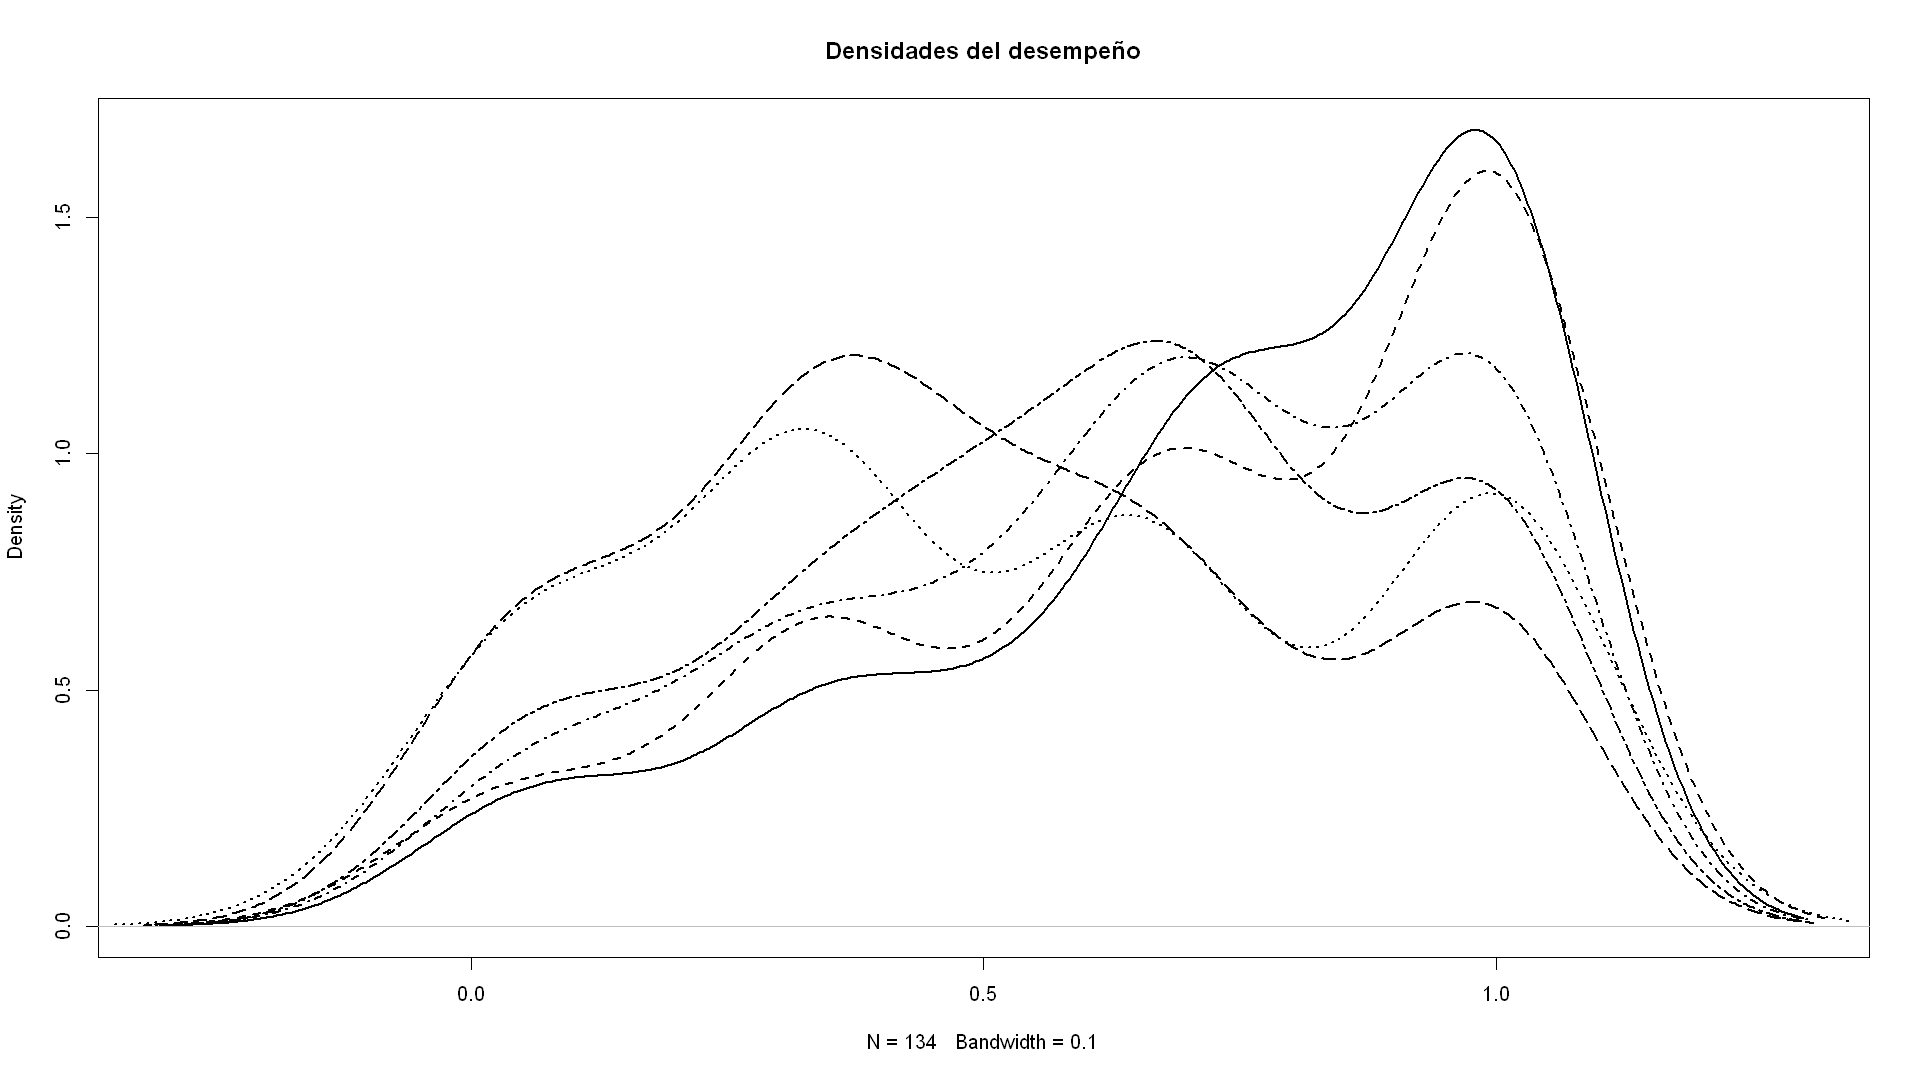

In [3]:
plot(density(data$KNN),col="black", lwd=2, lty=1, main="Densidades del desempeño")
lines(density(data$RBF_SVM),col="black", lwd=2, lty=2)
lines(density(data$Rand_Forest),col="black", lwd=2, lty=3)
lines(density(data$AdaBoost),col="black", lwd=2, lty=4)
lines(density(data$Naive_Bayes),col="black", lwd=2, lty=5)
lines(density(data$QDA),col="black", lwd=2, lty=6)

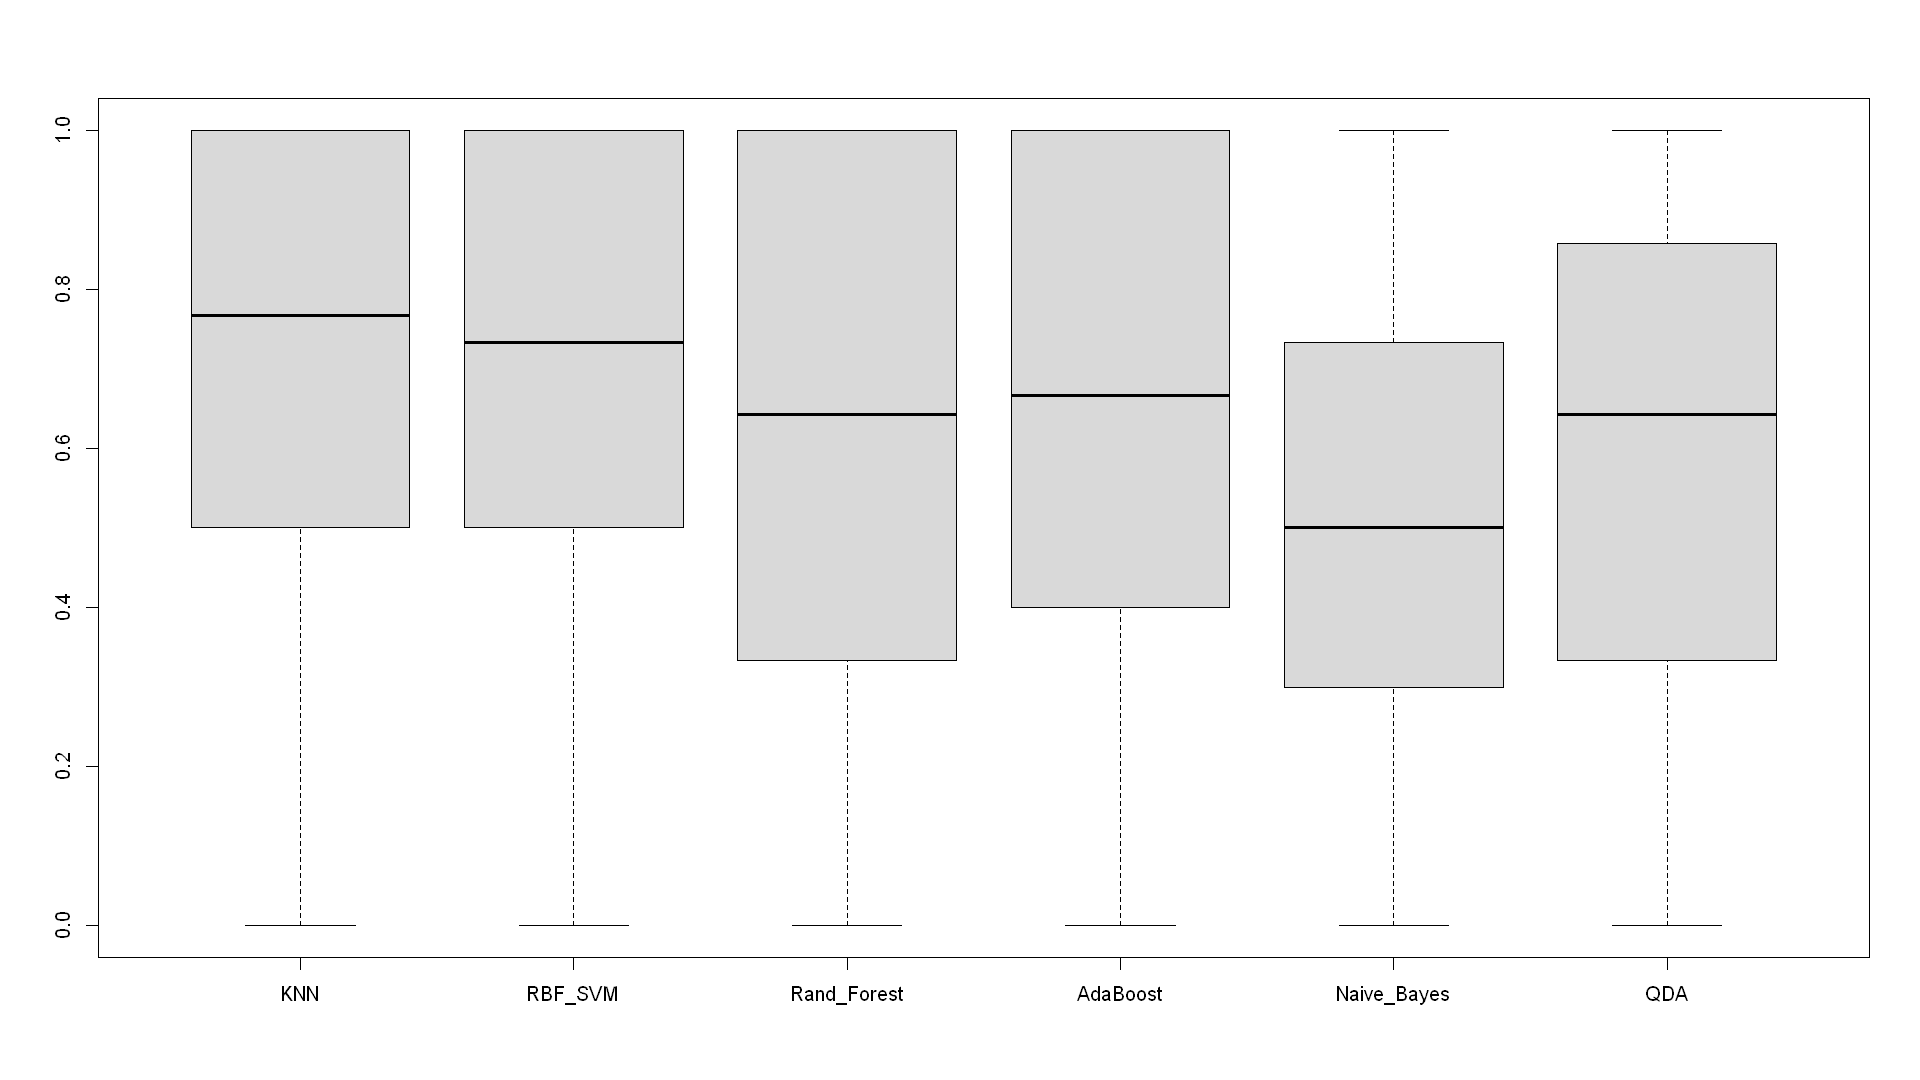

In [4]:
boxplot(data[,c("KNN","RBF_SVM","Rand_Forest","AdaBoost","Naive_Bayes","QDA")], col="gray85")

In [5]:
t.test(IRT_difficulty ~ process_2, data=data_2)
t.test(KNN ~ process_2, data=data_2)
t.test(RBF_SVM ~ process_2, data=data_2)
t.test(Rand_Forest ~ process_2, data=data_2)
t.test(AdaBoost ~ process_2, data=data_2)
t.test(Naive_Bayes ~ process_2, data=data_2)
t.test(QDA ~ process_2, data=data_2)


	Welch Two Sample t-test

data:  IRT_difficulty by process_2
t = 1.2448, df = 15.369, p-value = 0.2319
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.2401154  0.9177393
sample estimates:
mean in group remember mean in group transfer 
             0.7184615              0.3796496 



	Welch Two Sample t-test

data:  KNN by process_2
t = -0.80885, df = 13.946, p-value = 0.4322
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.2906799  0.1315175
sample estimates:
mean in group remember mean in group transfer 
             0.6579231              0.7375043 



	Welch Two Sample t-test

data:  RBF_SVM by process_2
t = -0.65531, df = 13.872, p-value = 0.523
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.3001430  0.1597499
sample estimates:
mean in group remember mean in group transfer 
             0.6406154              0.7108120 



	Welch Two Sample t-test

data:  Rand_Forest by process_2
t = 0.47873, df = 14.116, p-value = 0.6395
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.1865543  0.2938705
sample estimates:
mean in group remember mean in group transfer 
             0.5860000              0.5323419 



	Welch Two Sample t-test

data:  AdaBoost by process_2
t = -0.2033, df = 14.574, p-value = 0.8417
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.2149674  0.1776170
sample estimates:
mean in group remember mean in group transfer 
             0.6296923              0.6483675 



	Welch Two Sample t-test

data:  Naive_Bayes by process_2
t = -0.9157, df = 15.886, p-value = 0.3735
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.2447914  0.0971675
sample estimates:
mean in group remember mean in group transfer 
             0.4263077              0.5001197 



	Welch Two Sample t-test

data:  QDA by process_2
t = -0.72853, df = 15.196, p-value = 0.4774
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.2363490  0.1158362
sample estimates:
mean in group remember mean in group transfer 
             0.5502308              0.6104872 


In [6]:
cor.test(data$IRT_difficulty, data$KNN)
cor.test(data$IRT_difficulty, data$RBF_SVM)
cor.test(data$IRT_difficulty, data$Rand_Forest)
cor.test(data$IRT_difficulty, data$AdaBoost)
cor.test(data$IRT_difficulty, data$Naive_Bayes)
cor.test(data$IRT_difficulty, data$QDA)


	Pearson's product-moment correlation

data:  data$IRT_difficulty and data$KNN
t = 0.12901, df = 132, p-value = 0.8975
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.1586625  0.1804728
sample estimates:
       cor 
0.01122805 



	Pearson's product-moment correlation

data:  data$IRT_difficulty and data$RBF_SVM
t = -1.7826, df = 132, p-value = 0.07695
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.31472419  0.01670375
sample estimates:
      cor 
-0.153319 



	Pearson's product-moment correlation

data:  data$IRT_difficulty and data$Rand_Forest
t = 2.0289, df = 132, p-value = 0.04448
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.004444219 0.333650056
sample estimates:
      cor 
0.1739016 



	Pearson's product-moment correlation

data:  data$IRT_difficulty and data$AdaBoost
t = 0.19984, df = 132, p-value = 0.8419
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.1526476  0.1864295
sample estimates:
       cor 
0.01739098 



	Pearson's product-moment correlation

data:  data$IRT_difficulty and data$Naive_Bayes
t = -0.10366, df = 132, p-value = 0.9176
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.1783377  0.1608123
sample estimates:
         cor 
-0.009022159 



	Pearson's product-moment correlation

data:  data$IRT_difficulty and data$QDA
t = 0.20436, df = 132, p-value = 0.8384
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.1522630  0.1868096
sample estimates:
       cor 
0.01778459 


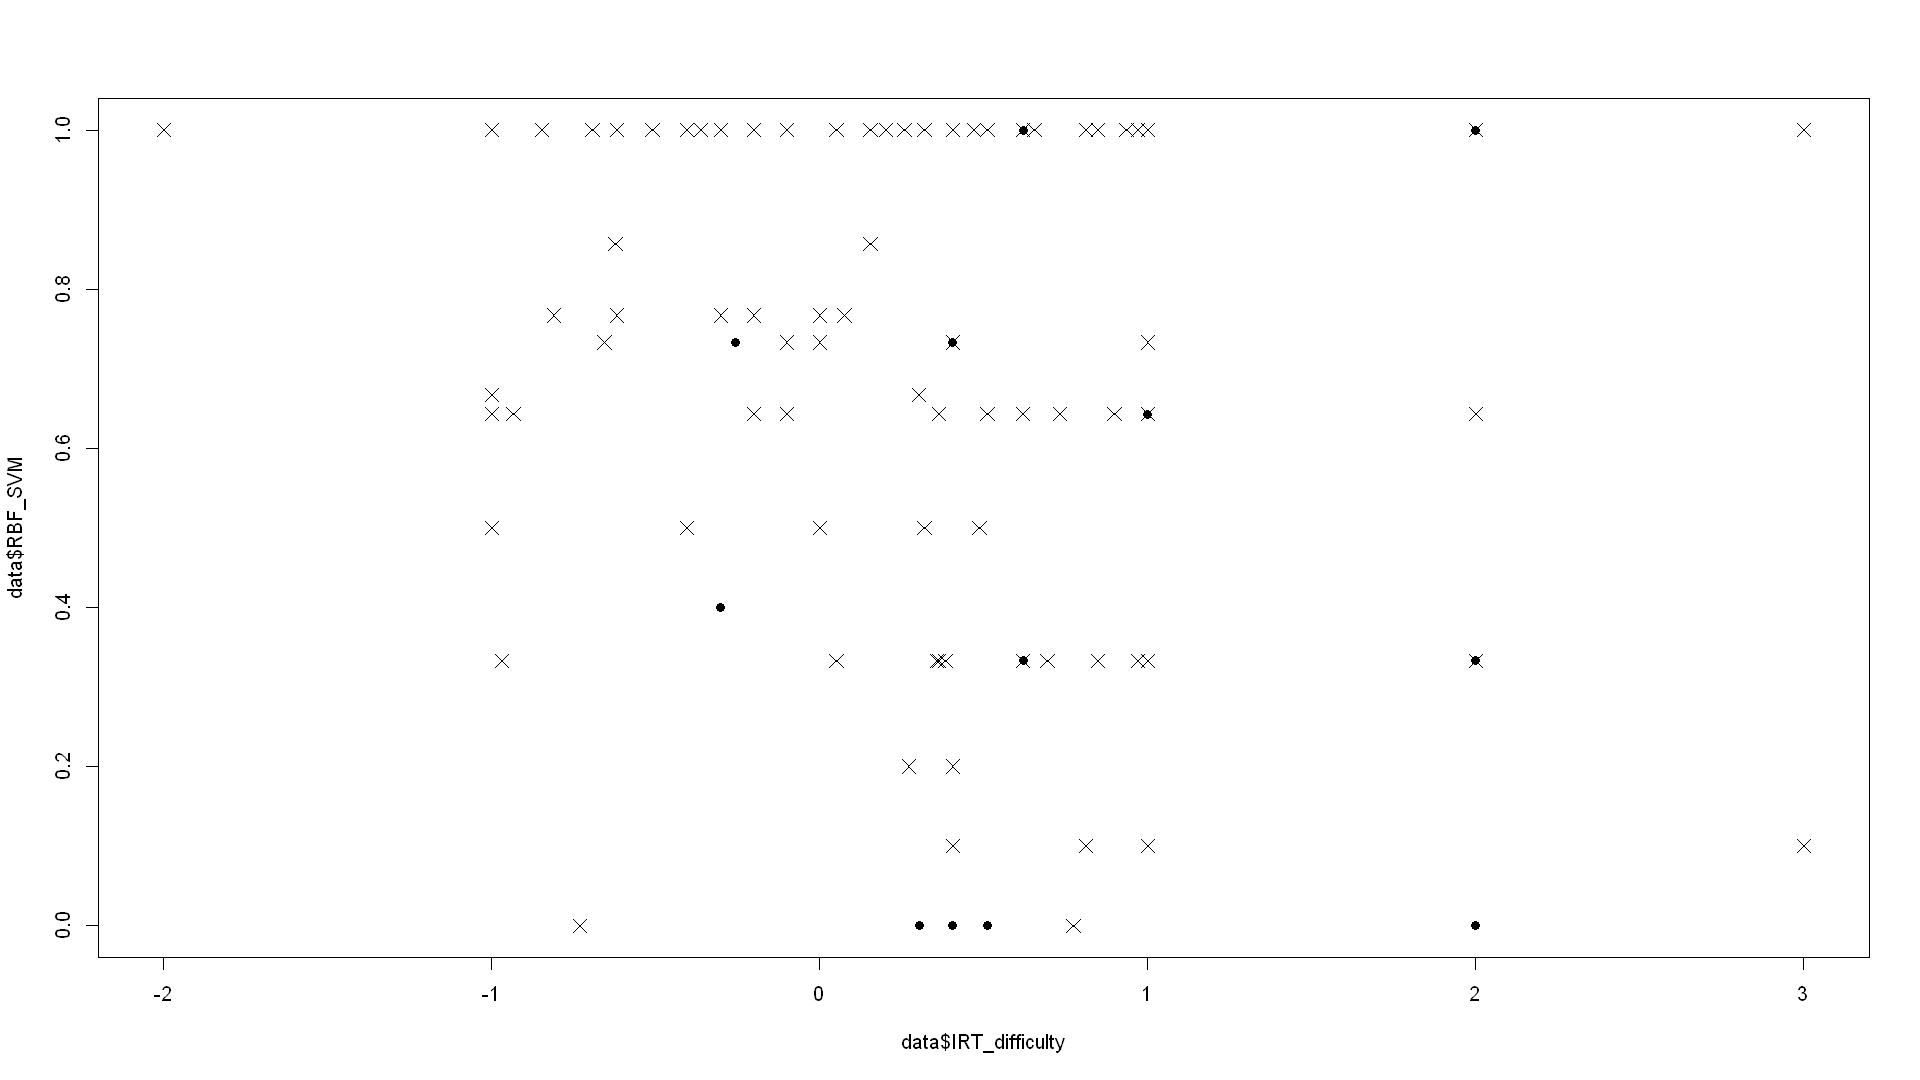

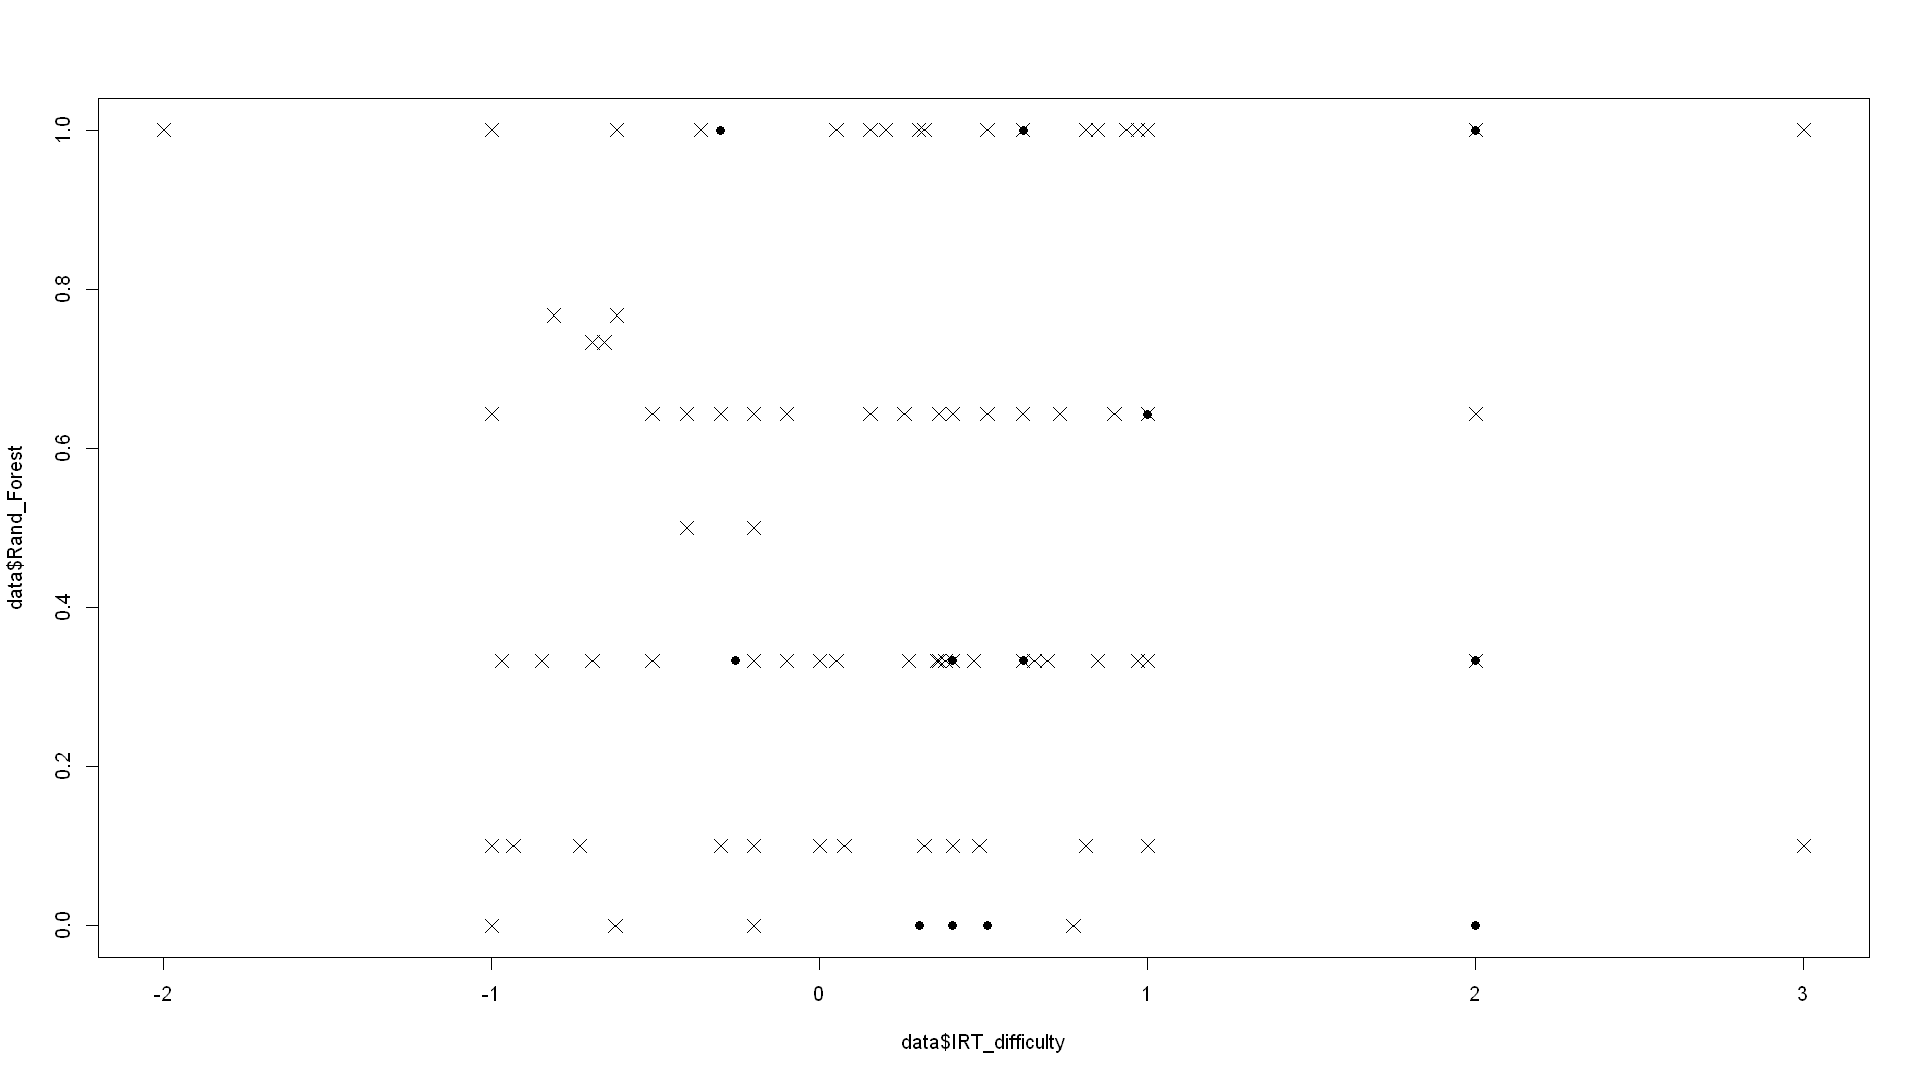

In [7]:
# plot(data$IRT_difficulty, data$KNN, pch=(data_2$process_2=="remember")*16+4, cex=1.5)
plot(data$IRT_difficulty, data$RBF_SVM, pch=(data_2$process_2=="remember")*16+4, cex=1.5)
plot(data$IRT_difficulty, data$Rand_Forest, pch=(data_2$process_2=="remember")*16+4, cex=1.5)
# plot(data$IRT_difficulty, data$AdaBoost, pch=(data_2$process_2=="remember")*16+4, cex=1.5)
# plot(data$IRT_difficulty, data$Naive_Bayes, pch=(data_2$process_2=="remember")*16+4, cex=1.5)
# plot(data$IRT_difficulty, data$QDA, pch=(data_2$process_2=="remember")*16+4, cex=1.5)


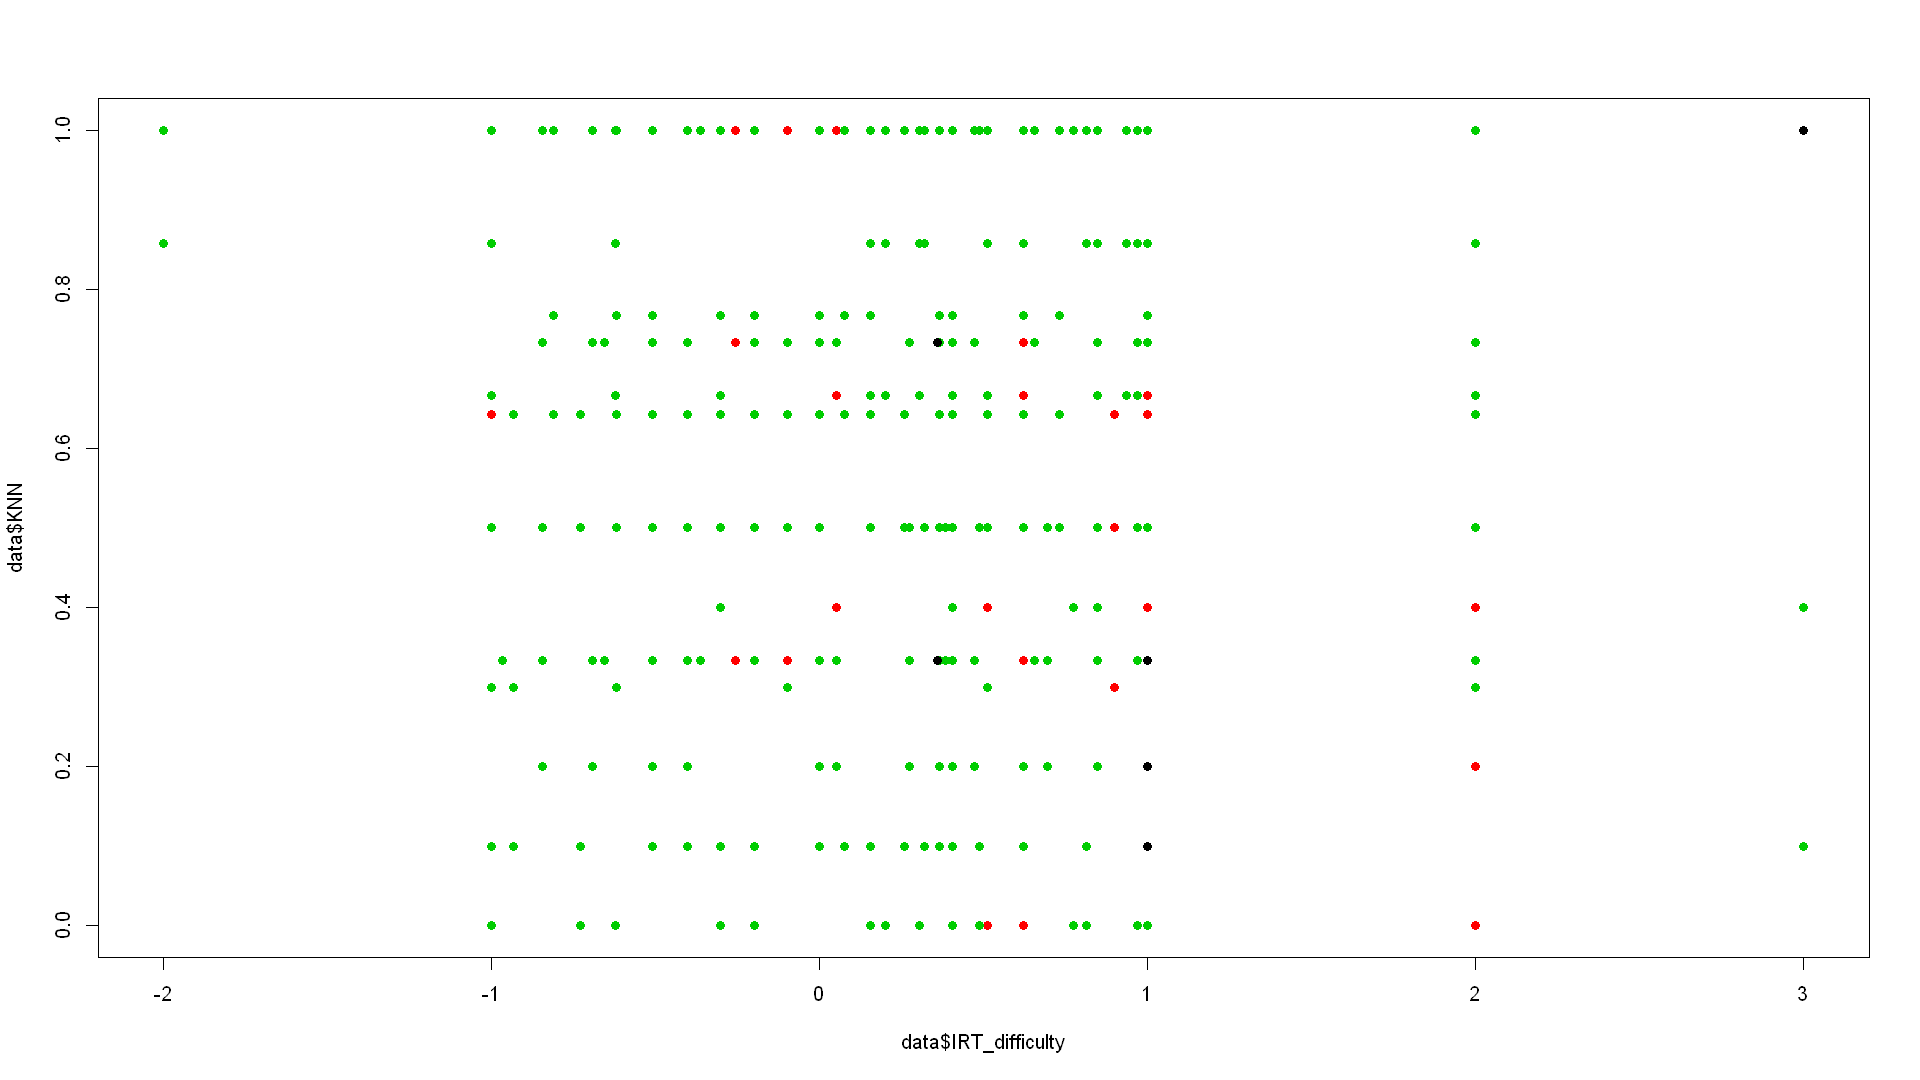

In [8]:
plot(data$IRT_difficulty, data$KNN, pch=16, col=data$process_2)
points(data$IRT_difficulty, data$RBF_SVM, pch=16, col=data$process_2)
points(data$IRT_difficulty, data$Rand_Forest, pch=16, col=data$process_2)
points(data$IRT_difficulty, data$AdaBoost, pch=16, col=data$process_2)
points(data$IRT_difficulty, data$Naive_Bayes, pch=16, col=data$process_2)
points(data$IRT_difficulty, data$QDA, pch=16, col=data$process_2)

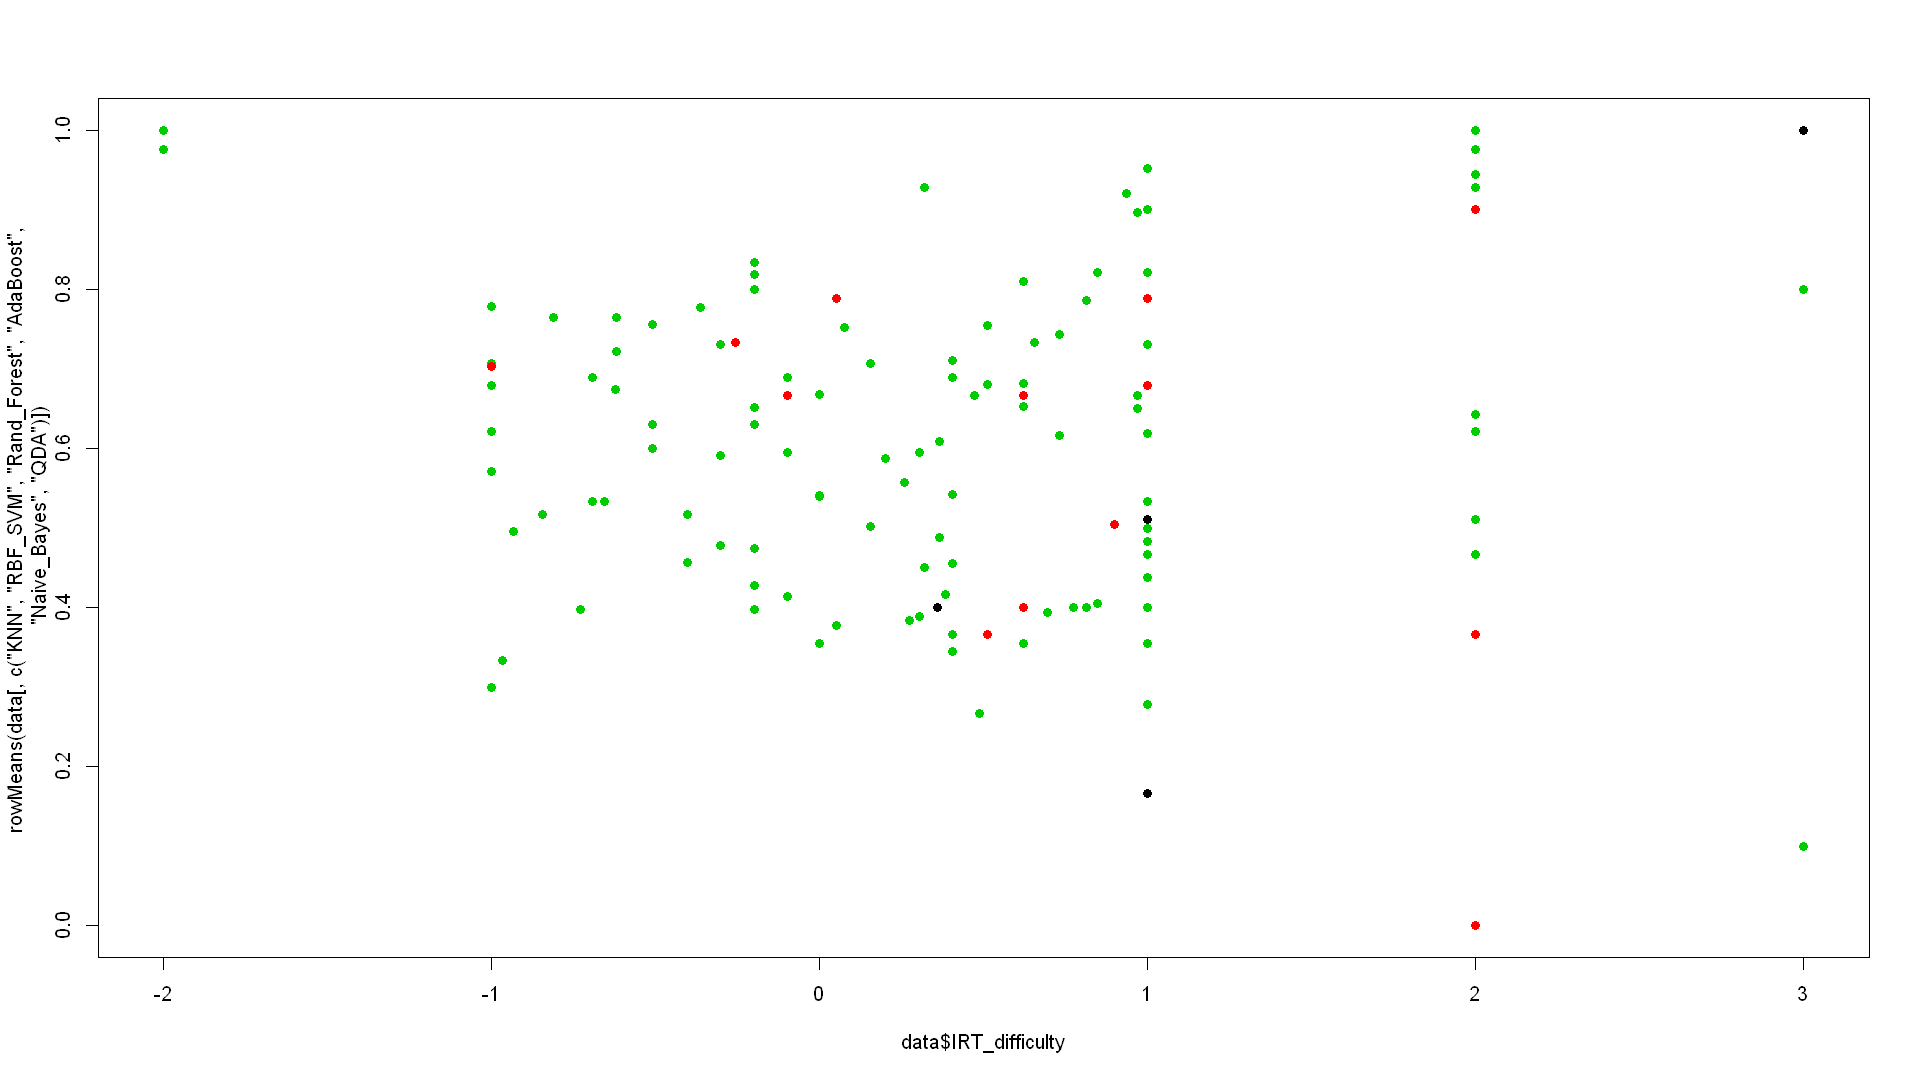

In [9]:
plot(data$IRT_difficulty, 
	rowMeans(data[,c("KNN","RBF_SVM","Rand_Forest","AdaBoost","Naive_Bayes","QDA")]),
	pch=16, col=data$process_2)

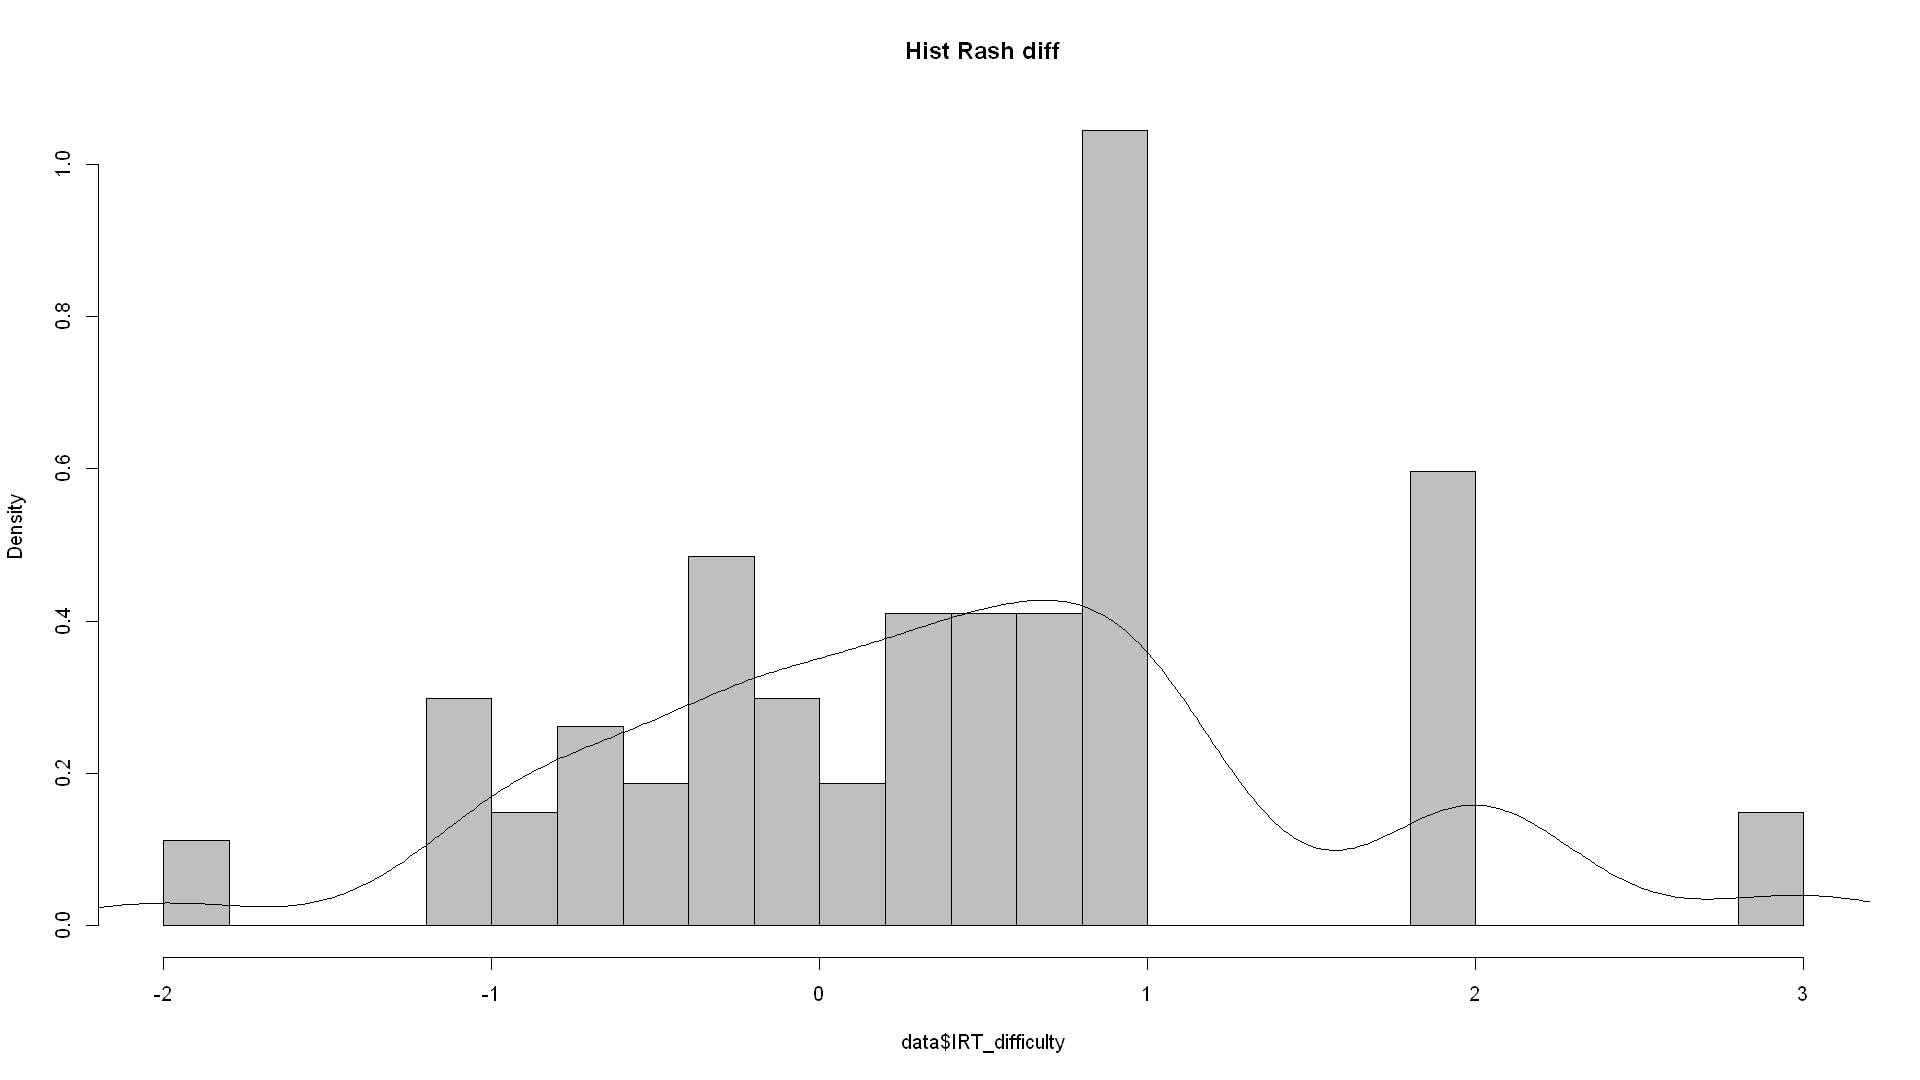

In [10]:
hist(data$IRT_difficulty, 
	col="gray75", 
	freq=FALSE,
	breaks=20,
	main="Hist Rash diff")
lines(density(data$IRT_difficulty))

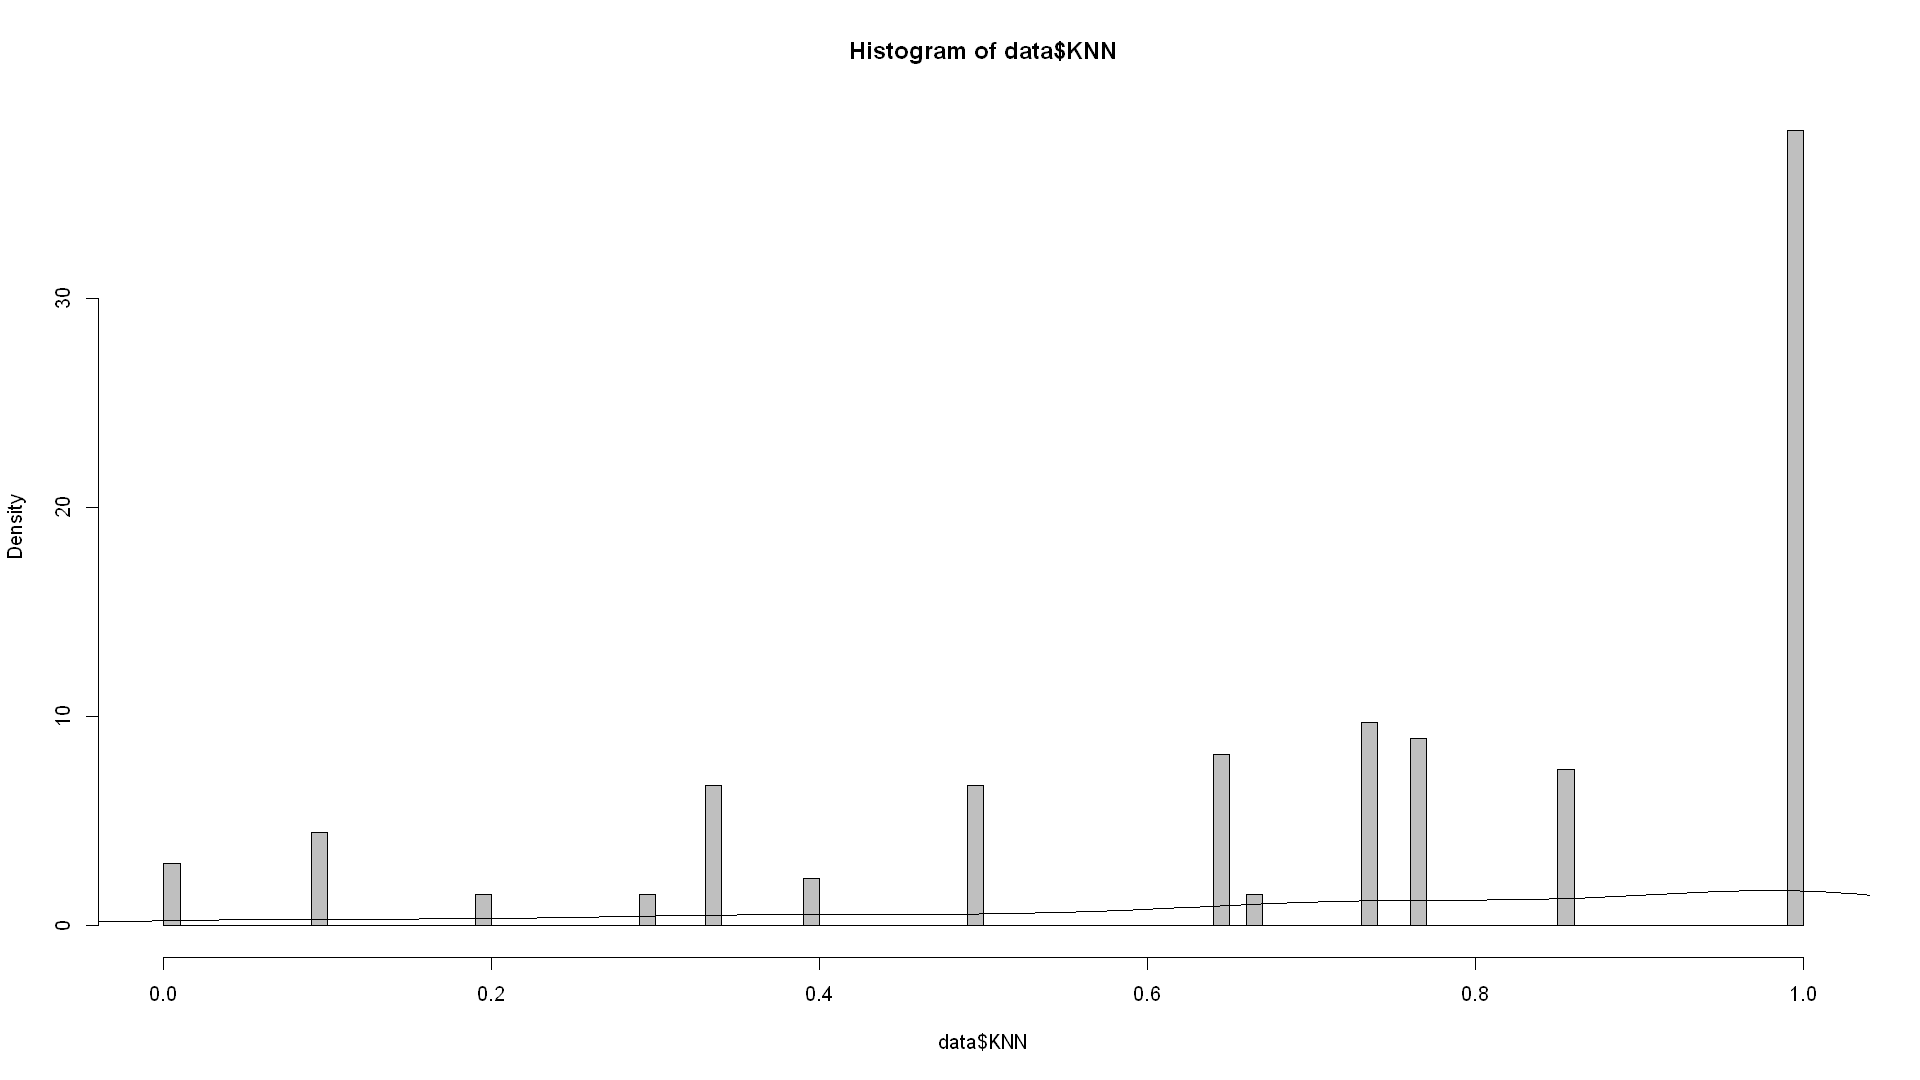

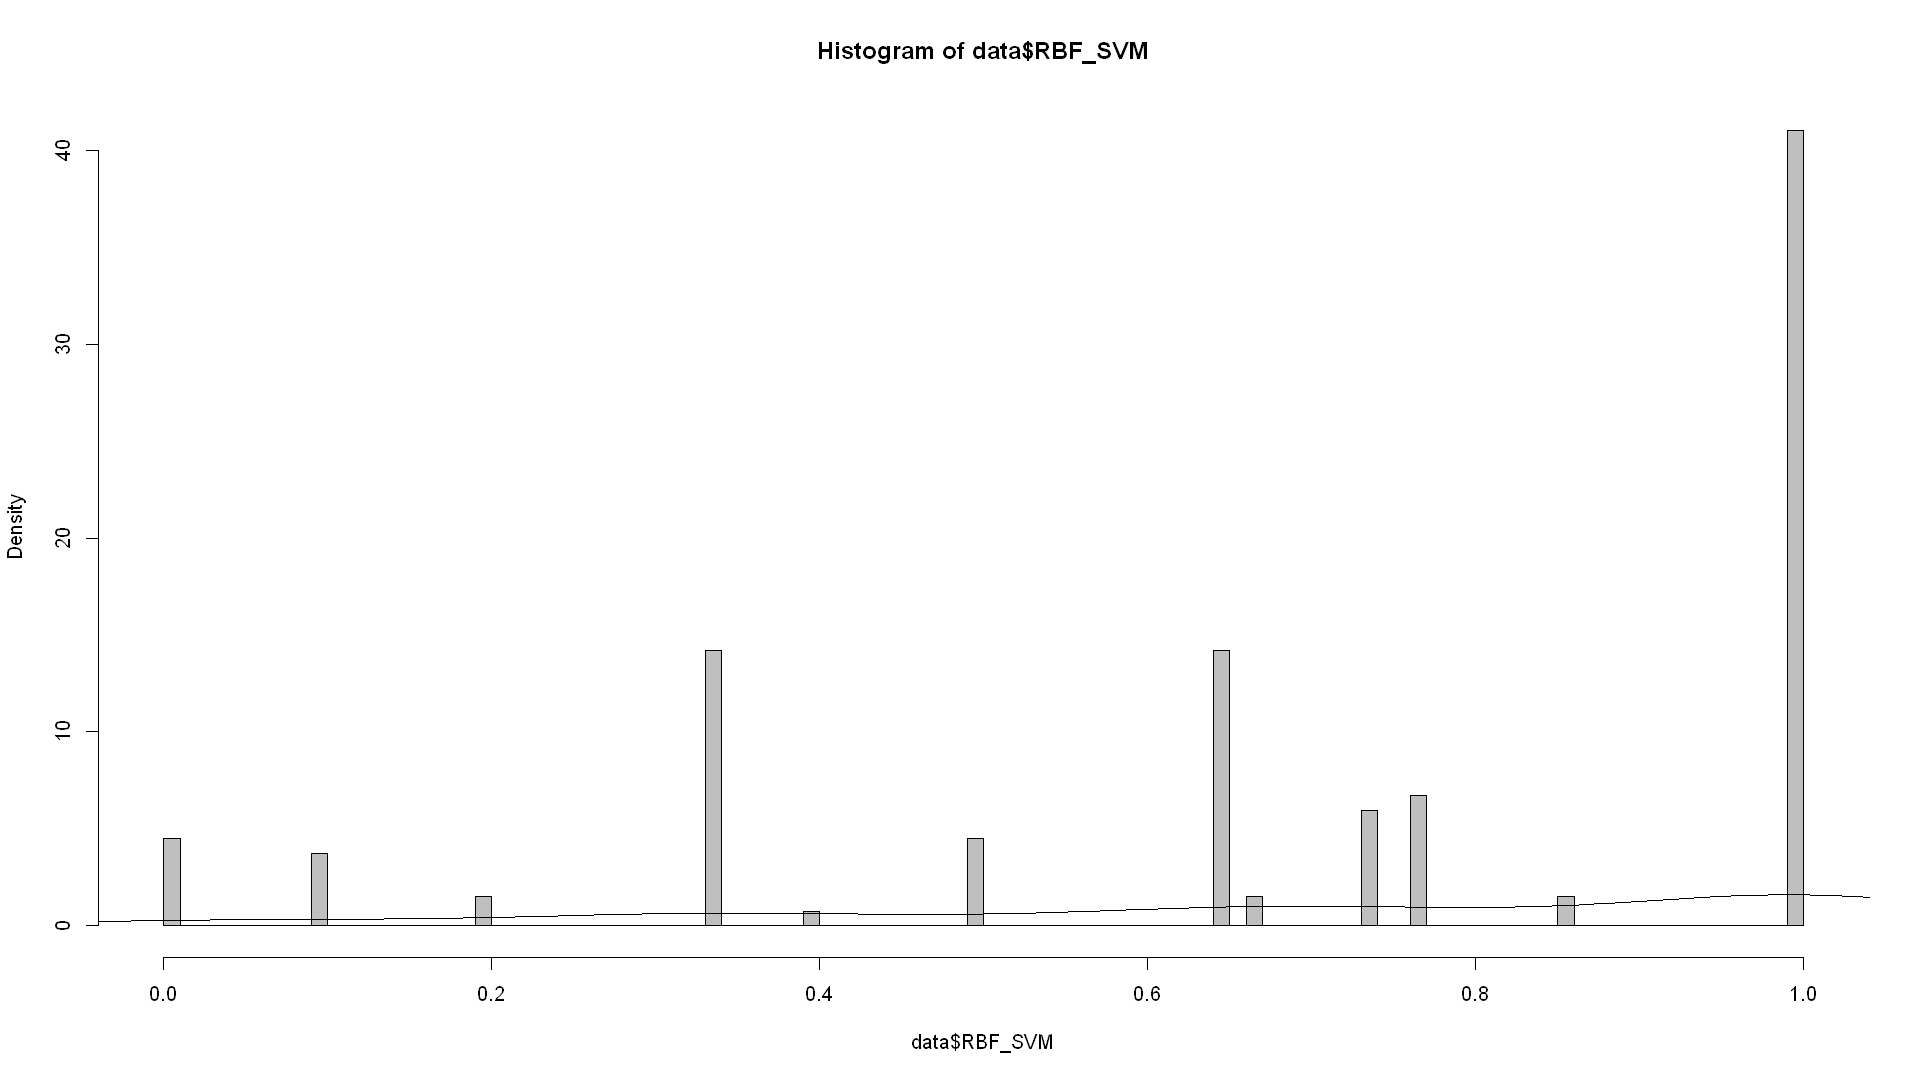

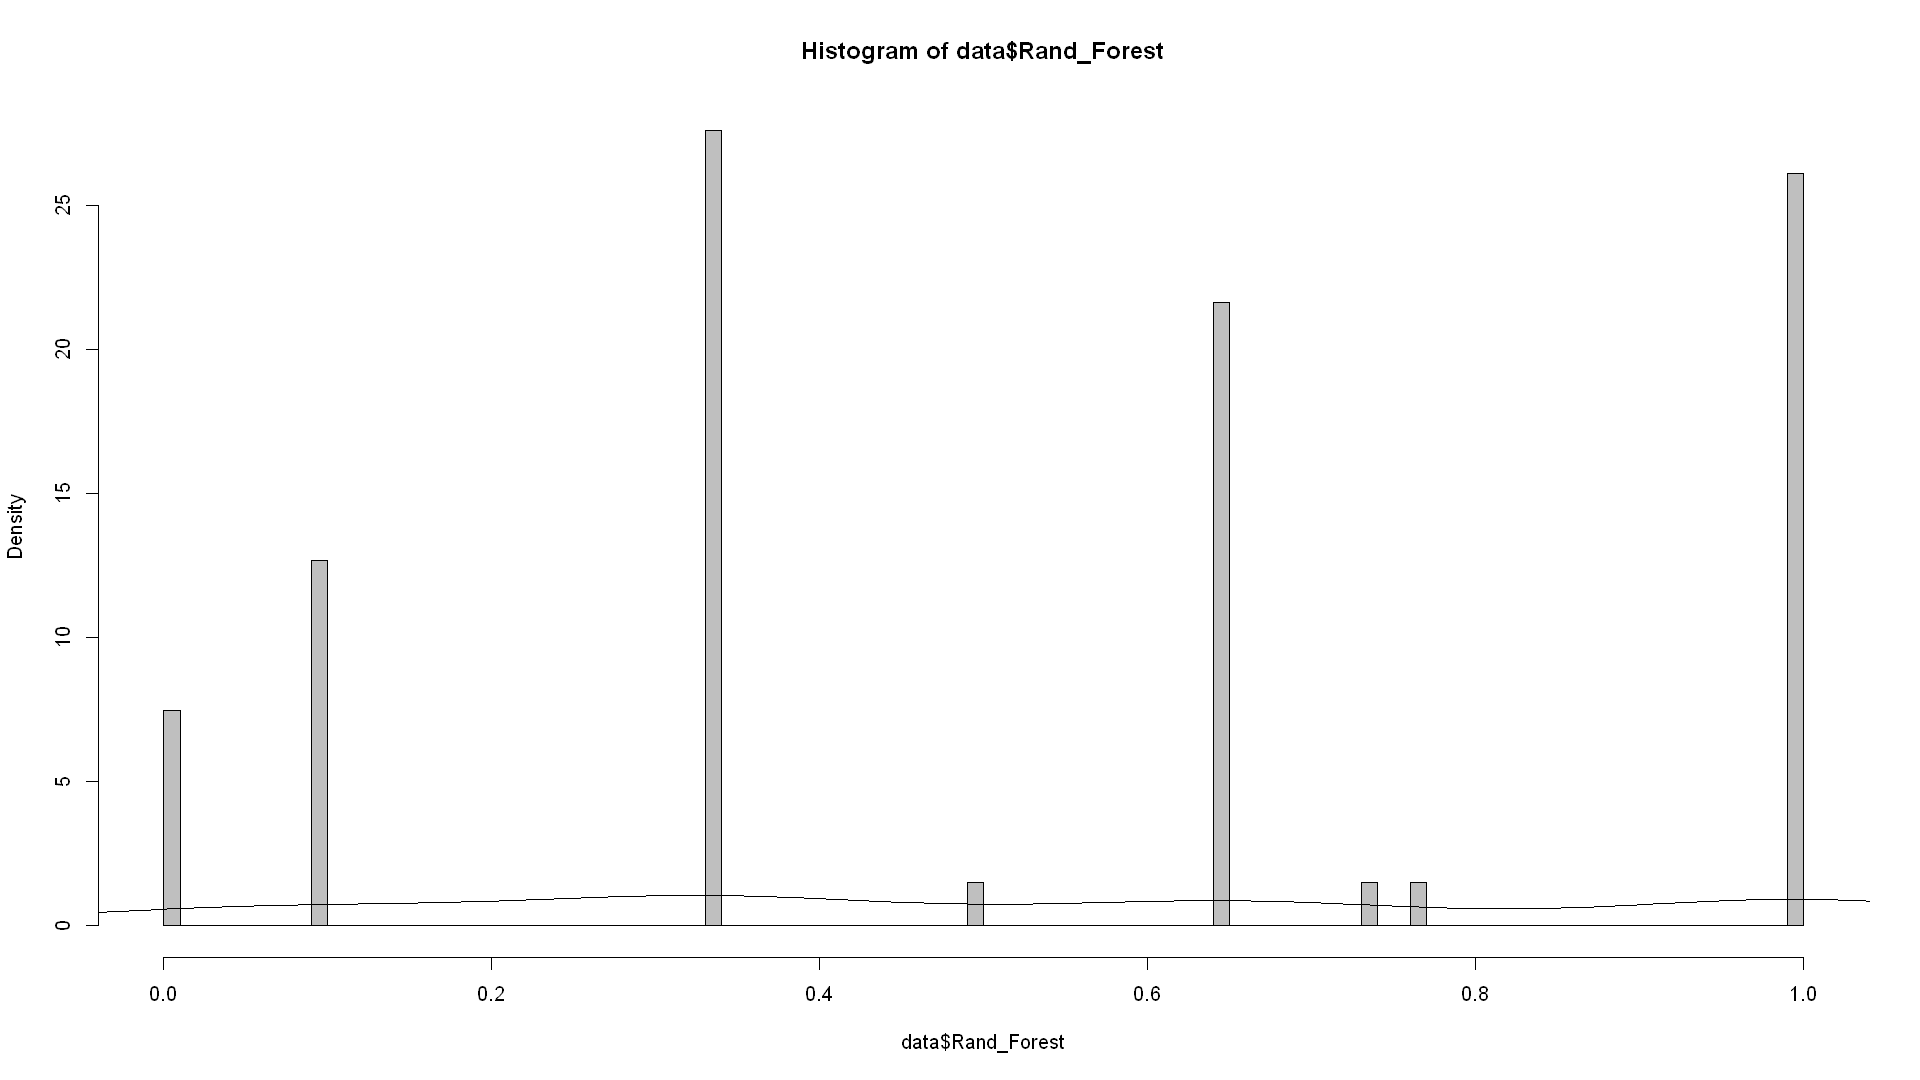

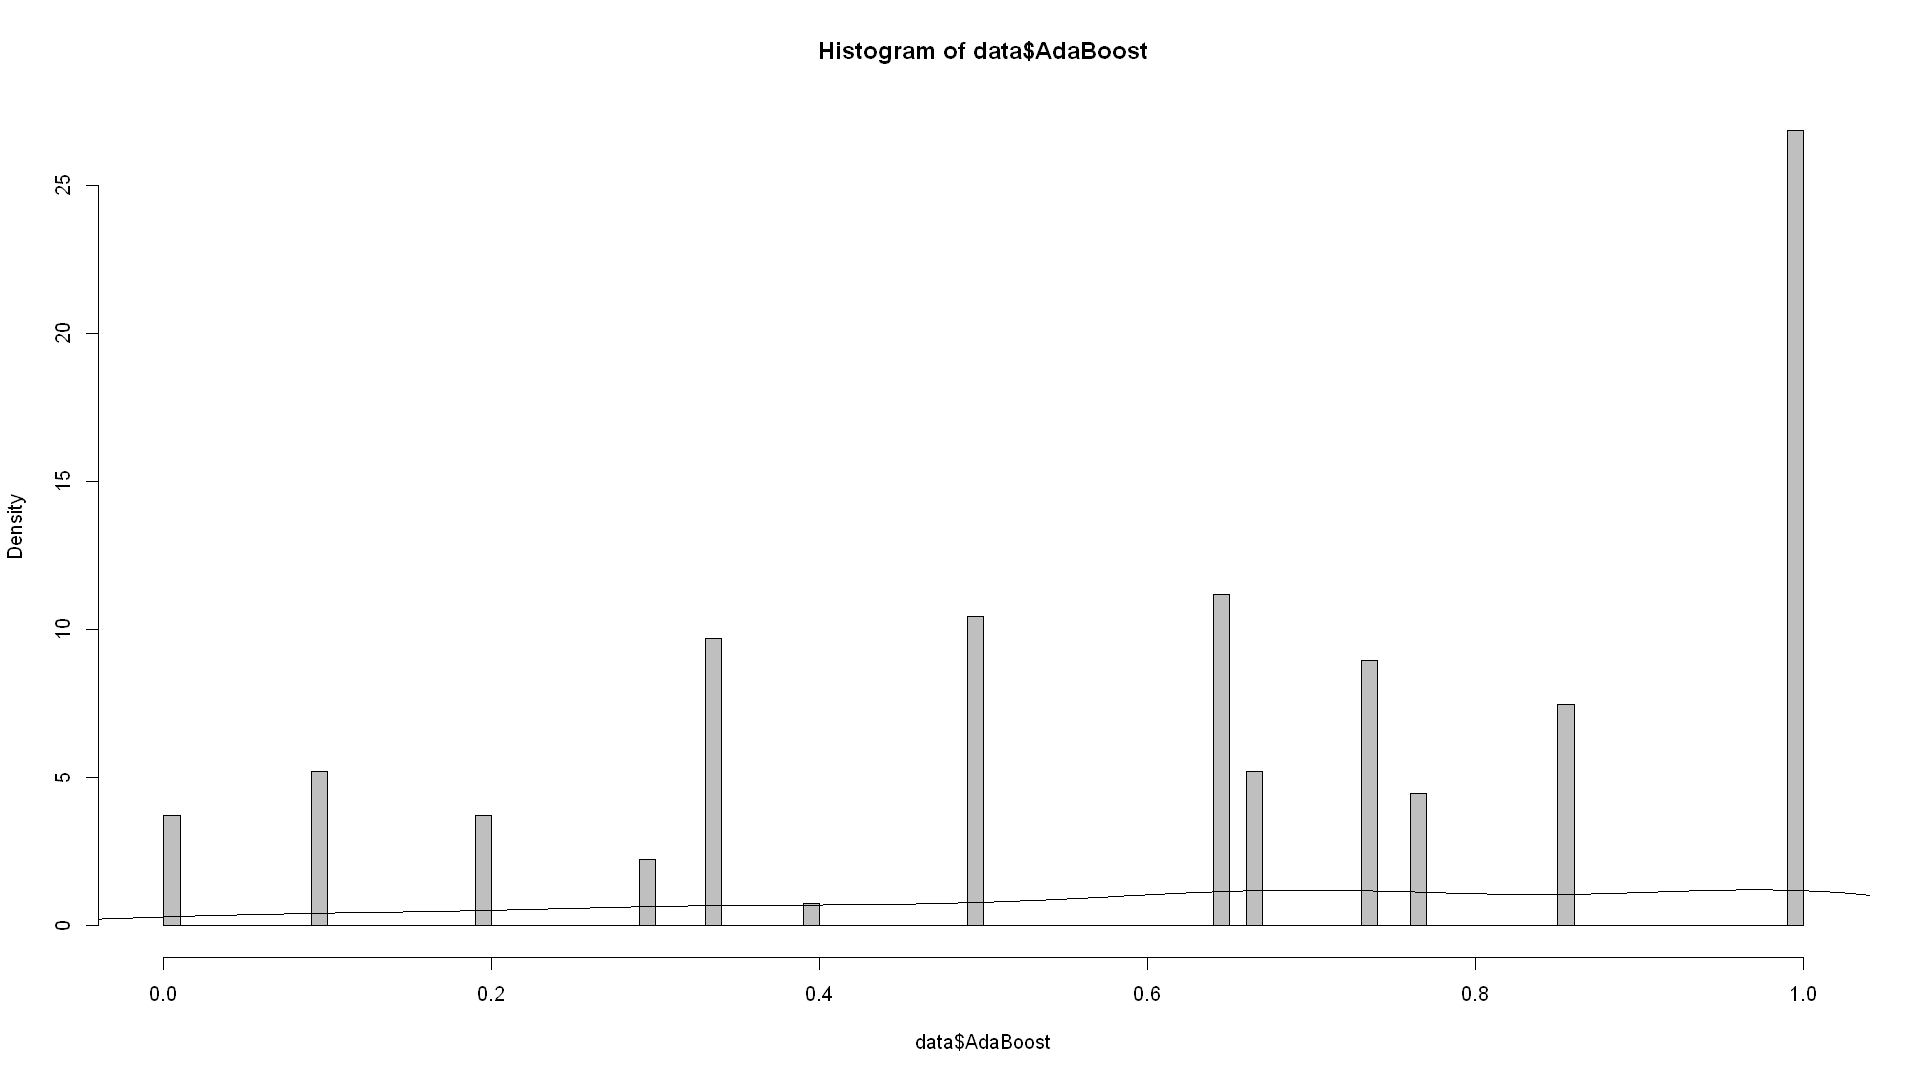

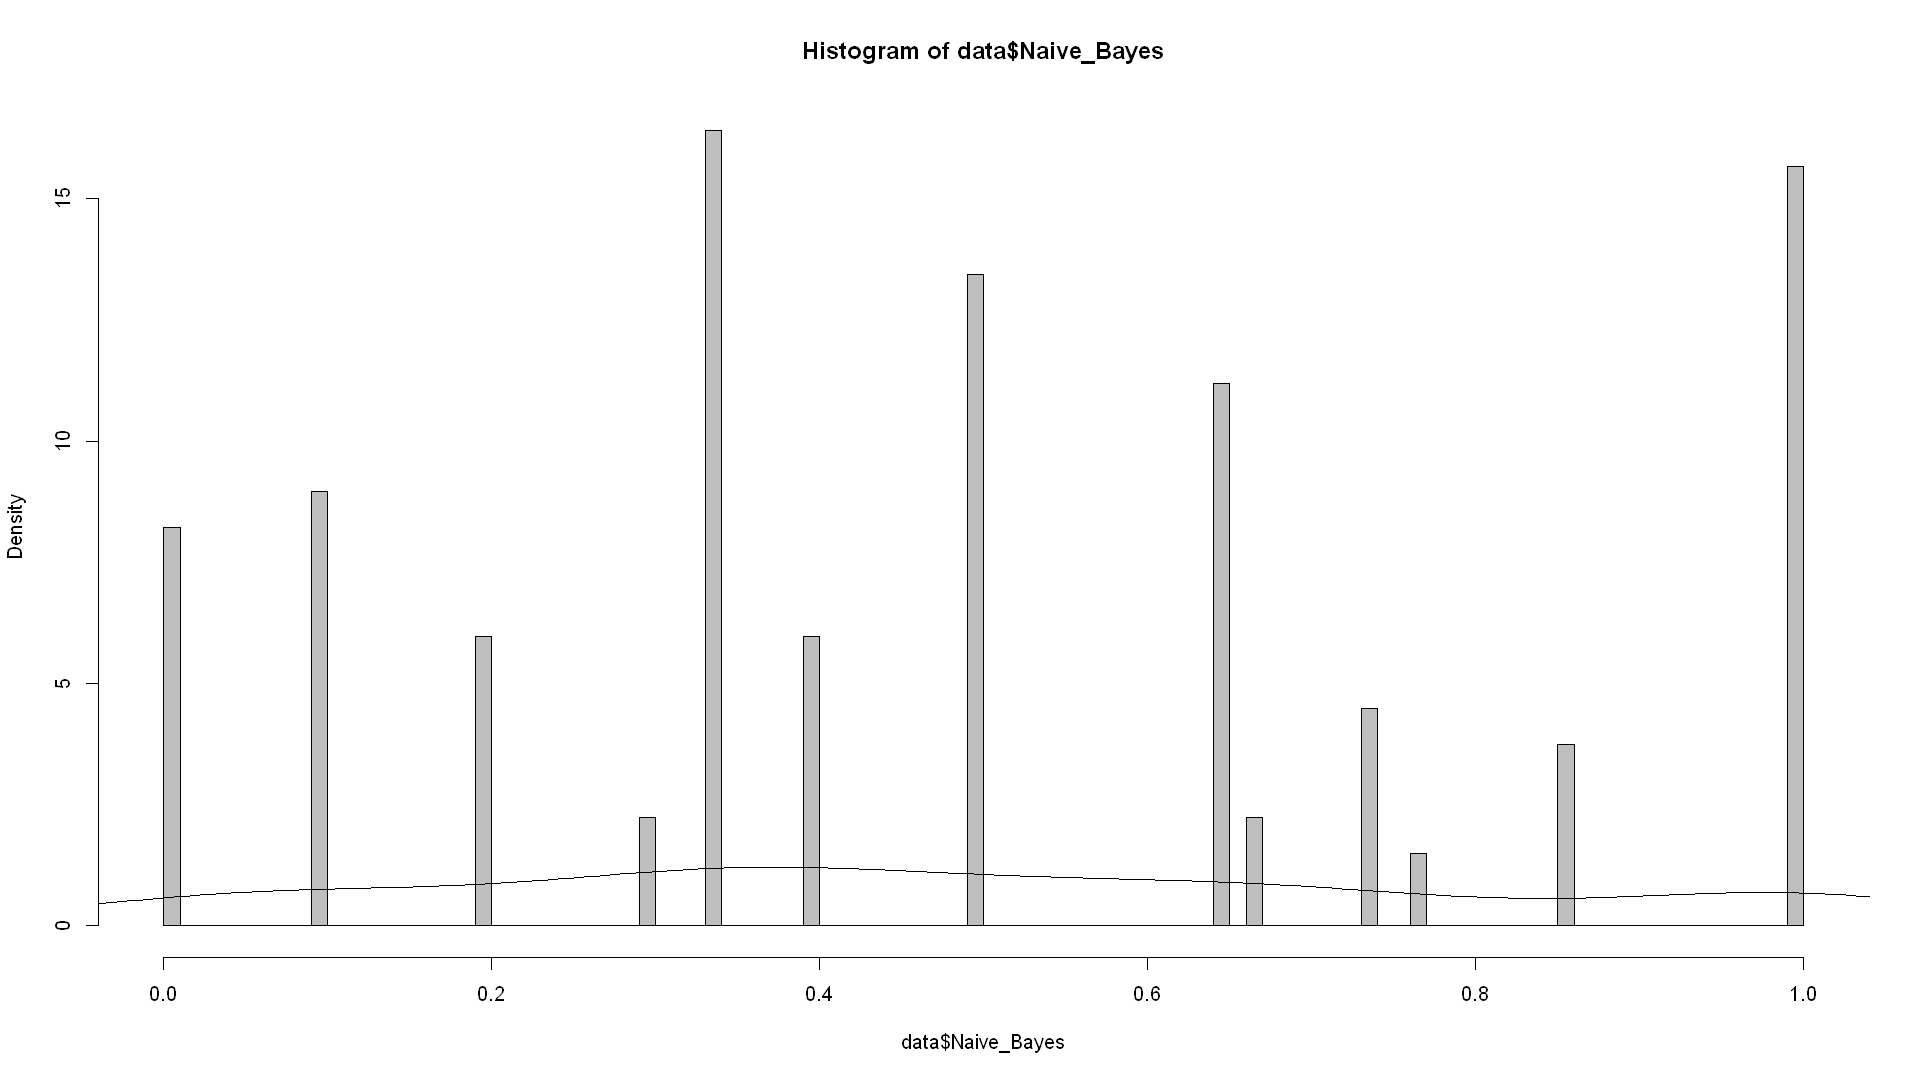

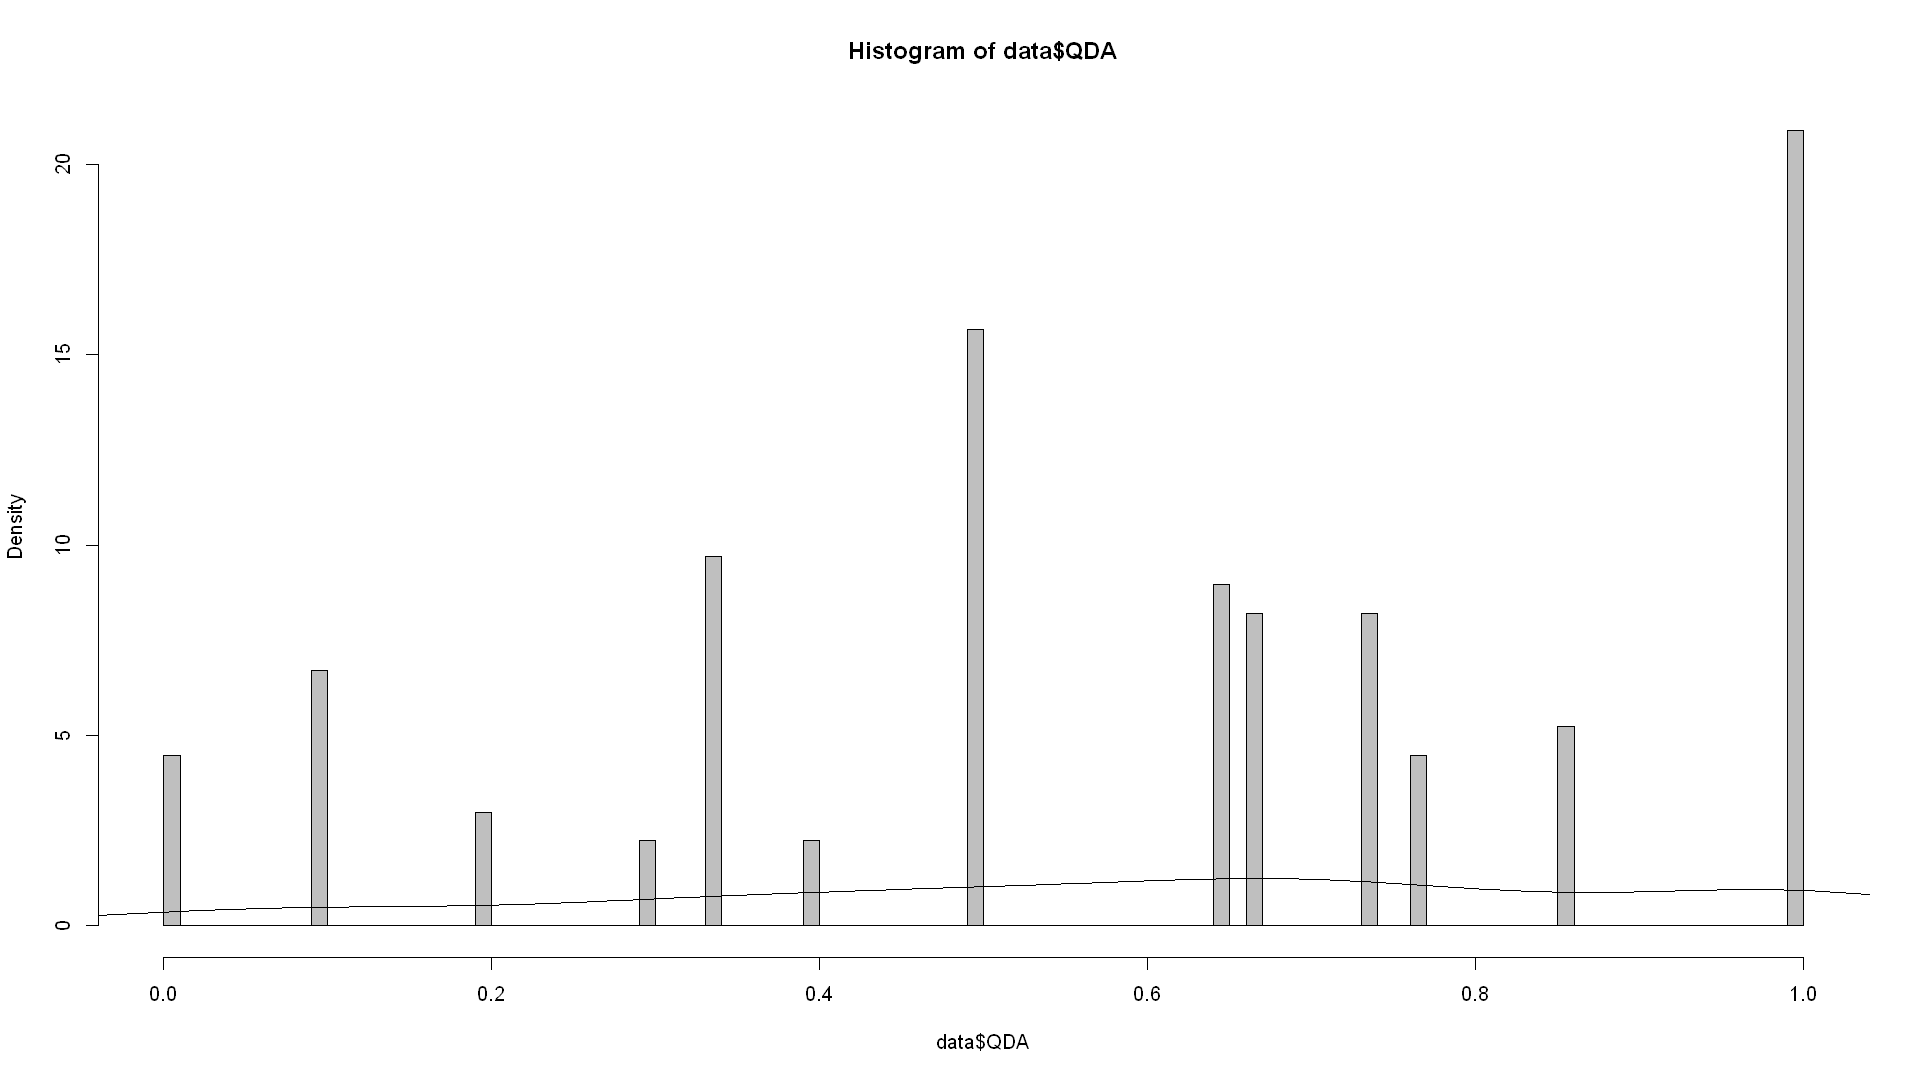

In [11]:
hist(data$KNN, 
	col="gray75", 
	freq=FALSE,
	breaks=100)
lines(density(data$KNN))

hist(data$RBF_SVM, 
	col="gray75", 
	freq=FALSE,
	breaks=100)
lines(density(data$RBF_SVM))

hist(data$Rand_Forest, 
	col="gray75", 
	freq=FALSE,
	breaks=100)
lines(density(data$Rand_Forest))

hist(data$AdaBoost, 
	col="gray75", 
	freq=FALSE,
	breaks=100)
lines(density(data$AdaBoost))

hist(data$Naive_Bayes, 
	col="gray75", 
	freq=FALSE,
	breaks=100)
lines(density(data$Naive_Bayes))

hist(data$QDA, 
	col="gray75", 
	freq=FALSE,
	breaks=100)
lines(density(data$QDA))



# ANOVA 6 grupos
[guía](http://www.sthda.com/english/wiki/one-way-anova-test-in-r)

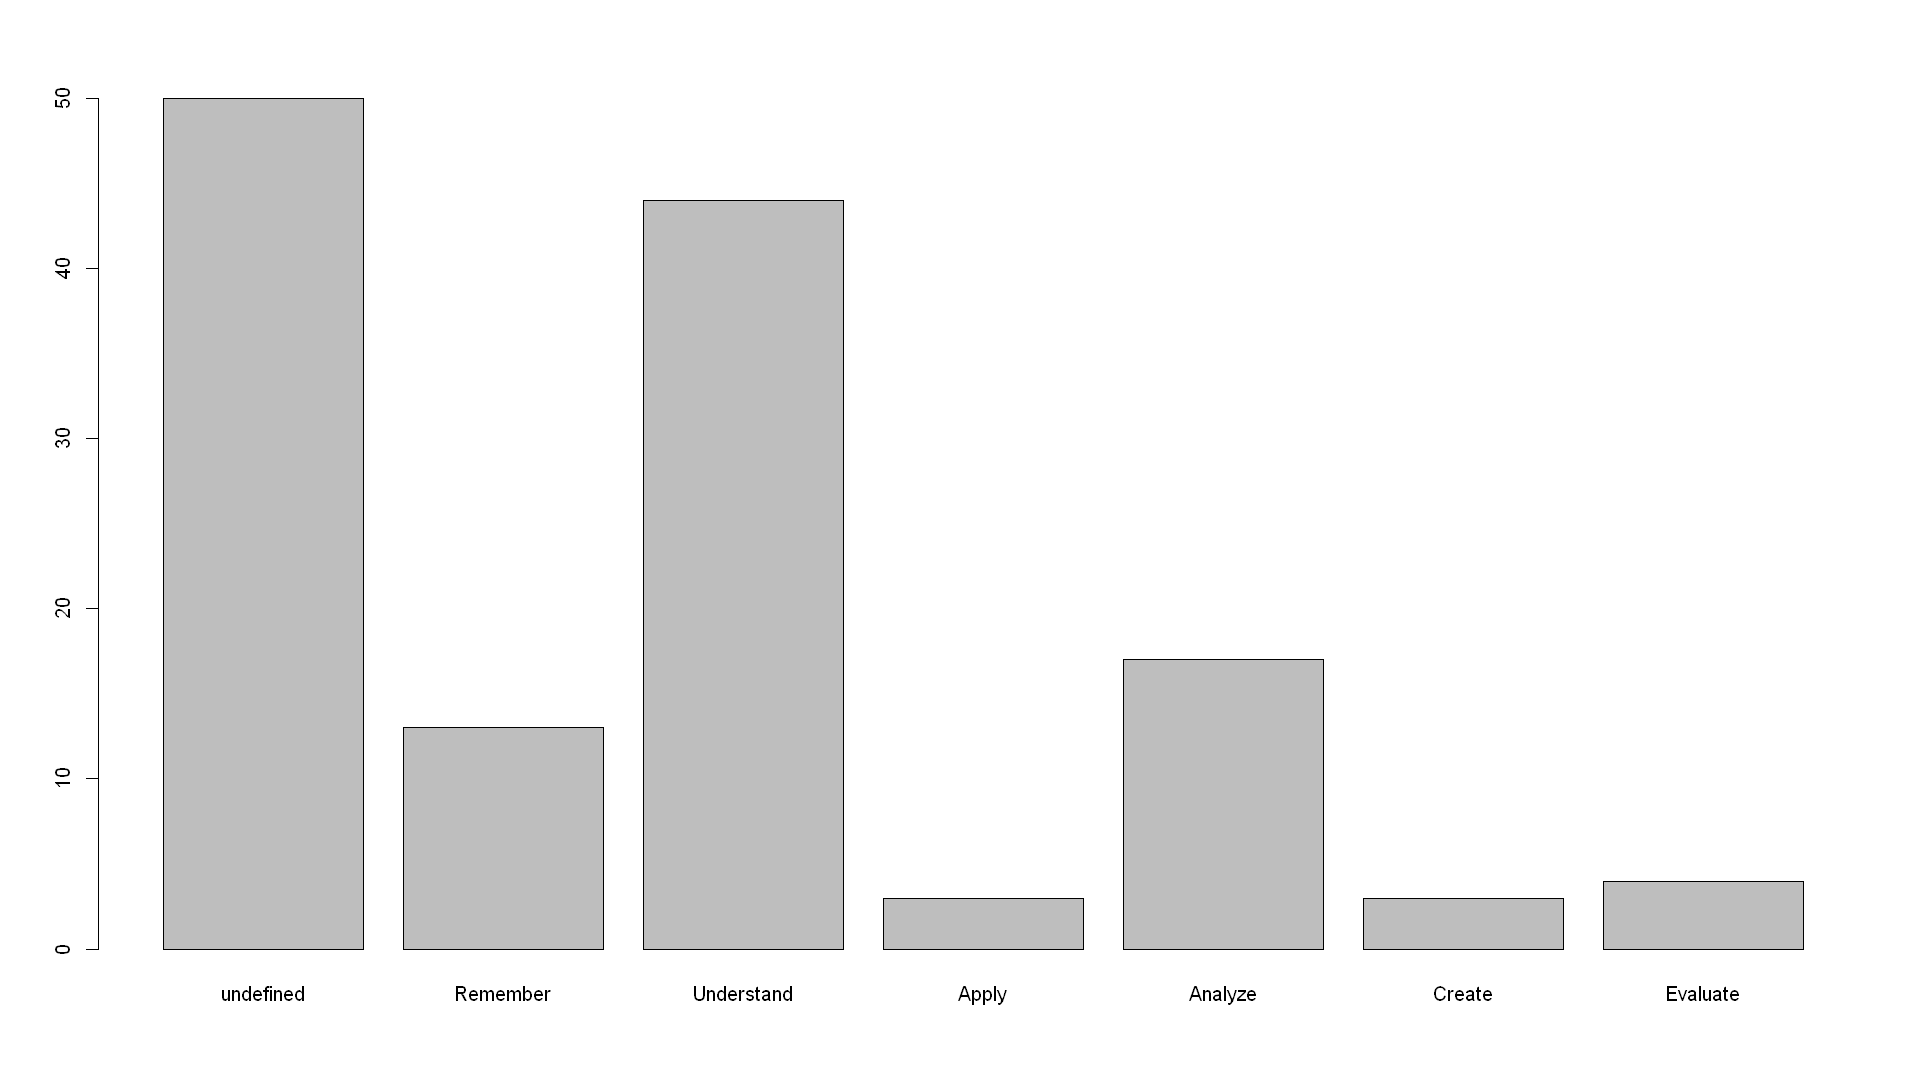

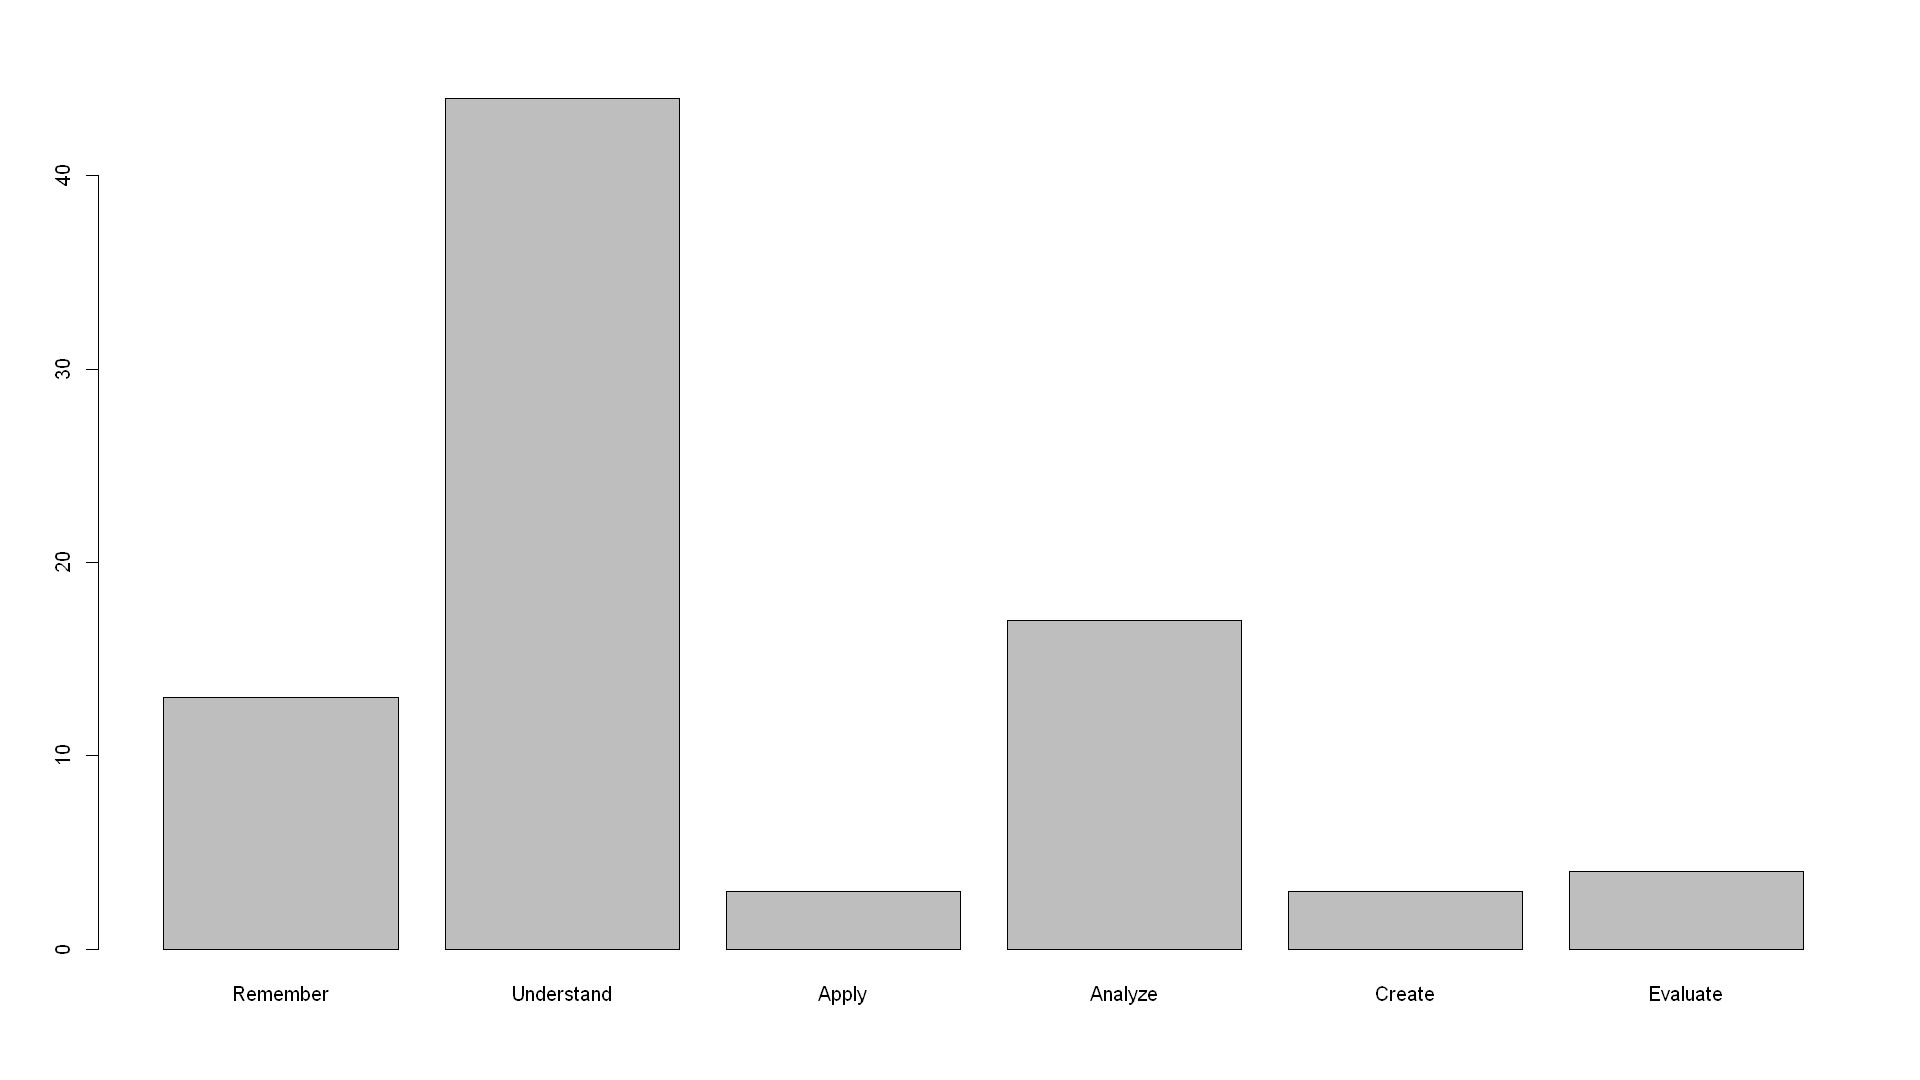

In [12]:
barplot(summary(data$process_6))
barplot(summary(data_6$process_6))

,Df,F value,Pr(>F)
group,5,0.4484555,0.8131806
,78,NA,NA


            Df Sum Sq Mean Sq F value Pr(>F)
process_6    5  0.193 0.03851   0.401  0.847
Residuals   78  7.490 0.09603               

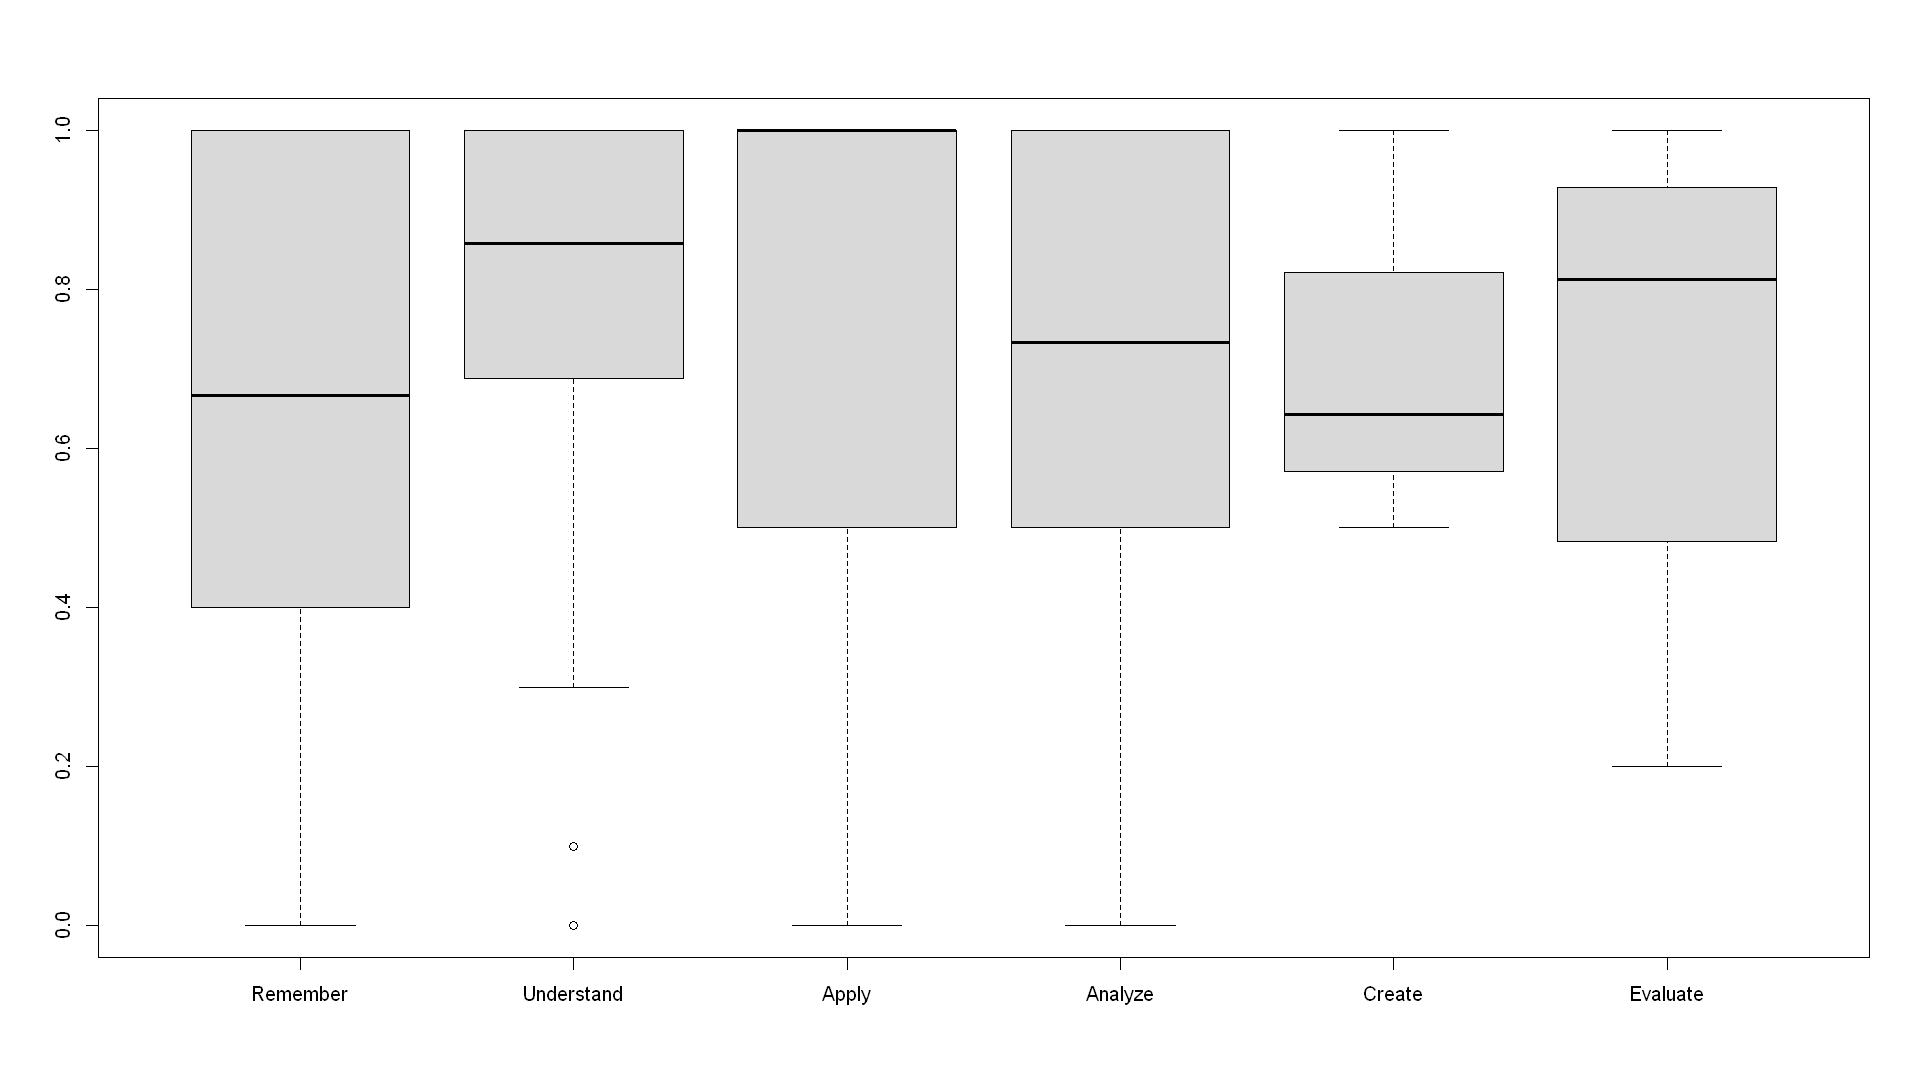

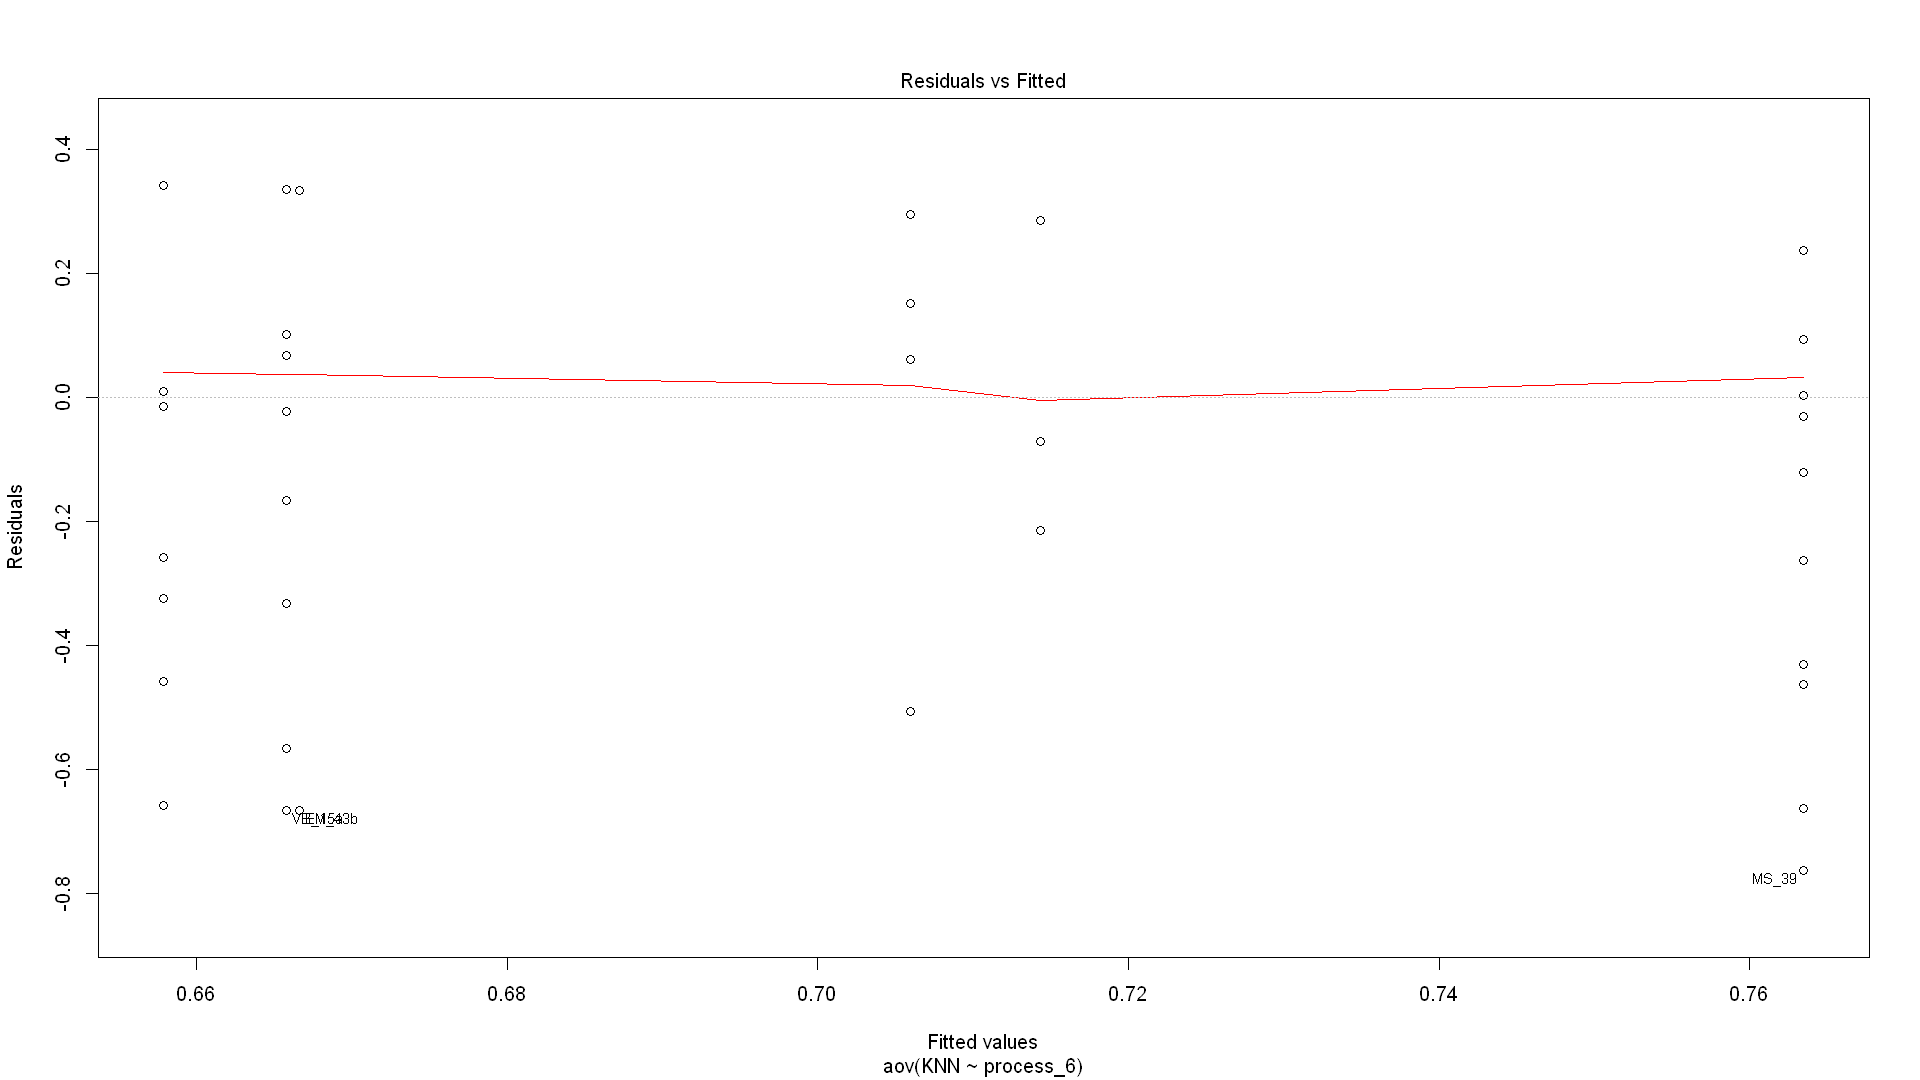

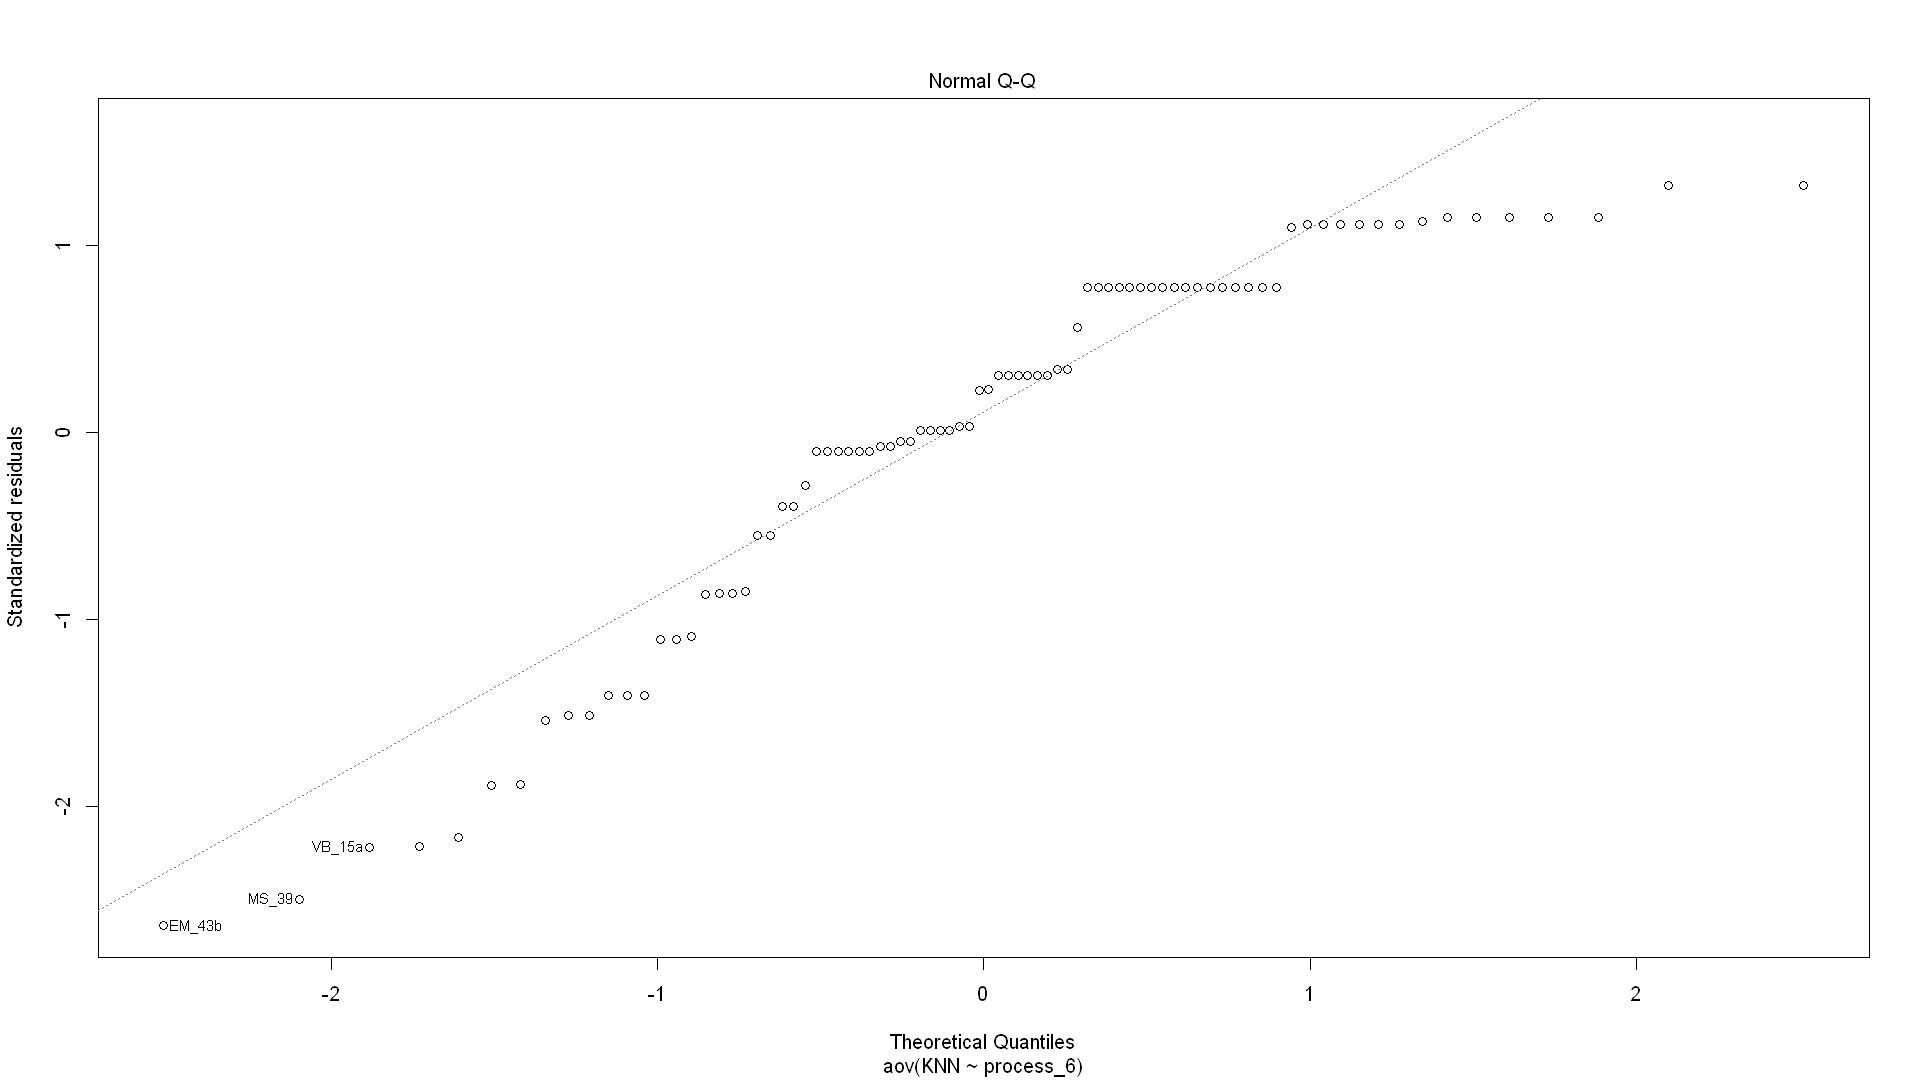

In [13]:
boxplot(KNN ~ process_6, data = data_6, col="gray85")
leveneTest(KNN ~ process_6, data = data_6)
aov_6_KNN <- aov(KNN ~ process_6, data = data_6)
summary(aov_6_KNN)
plot(aov_6_KNN, 1)
plot(aov_6_KNN, 2) 

,Df,F value,Pr(>F)
group,5,0.4692528,0.7980544
,78,NA,NA


            Df Sum Sq Mean Sq F value Pr(>F)
process_6    5  0.568 0.11365   1.181  0.326
Residuals   78  7.507 0.09625               

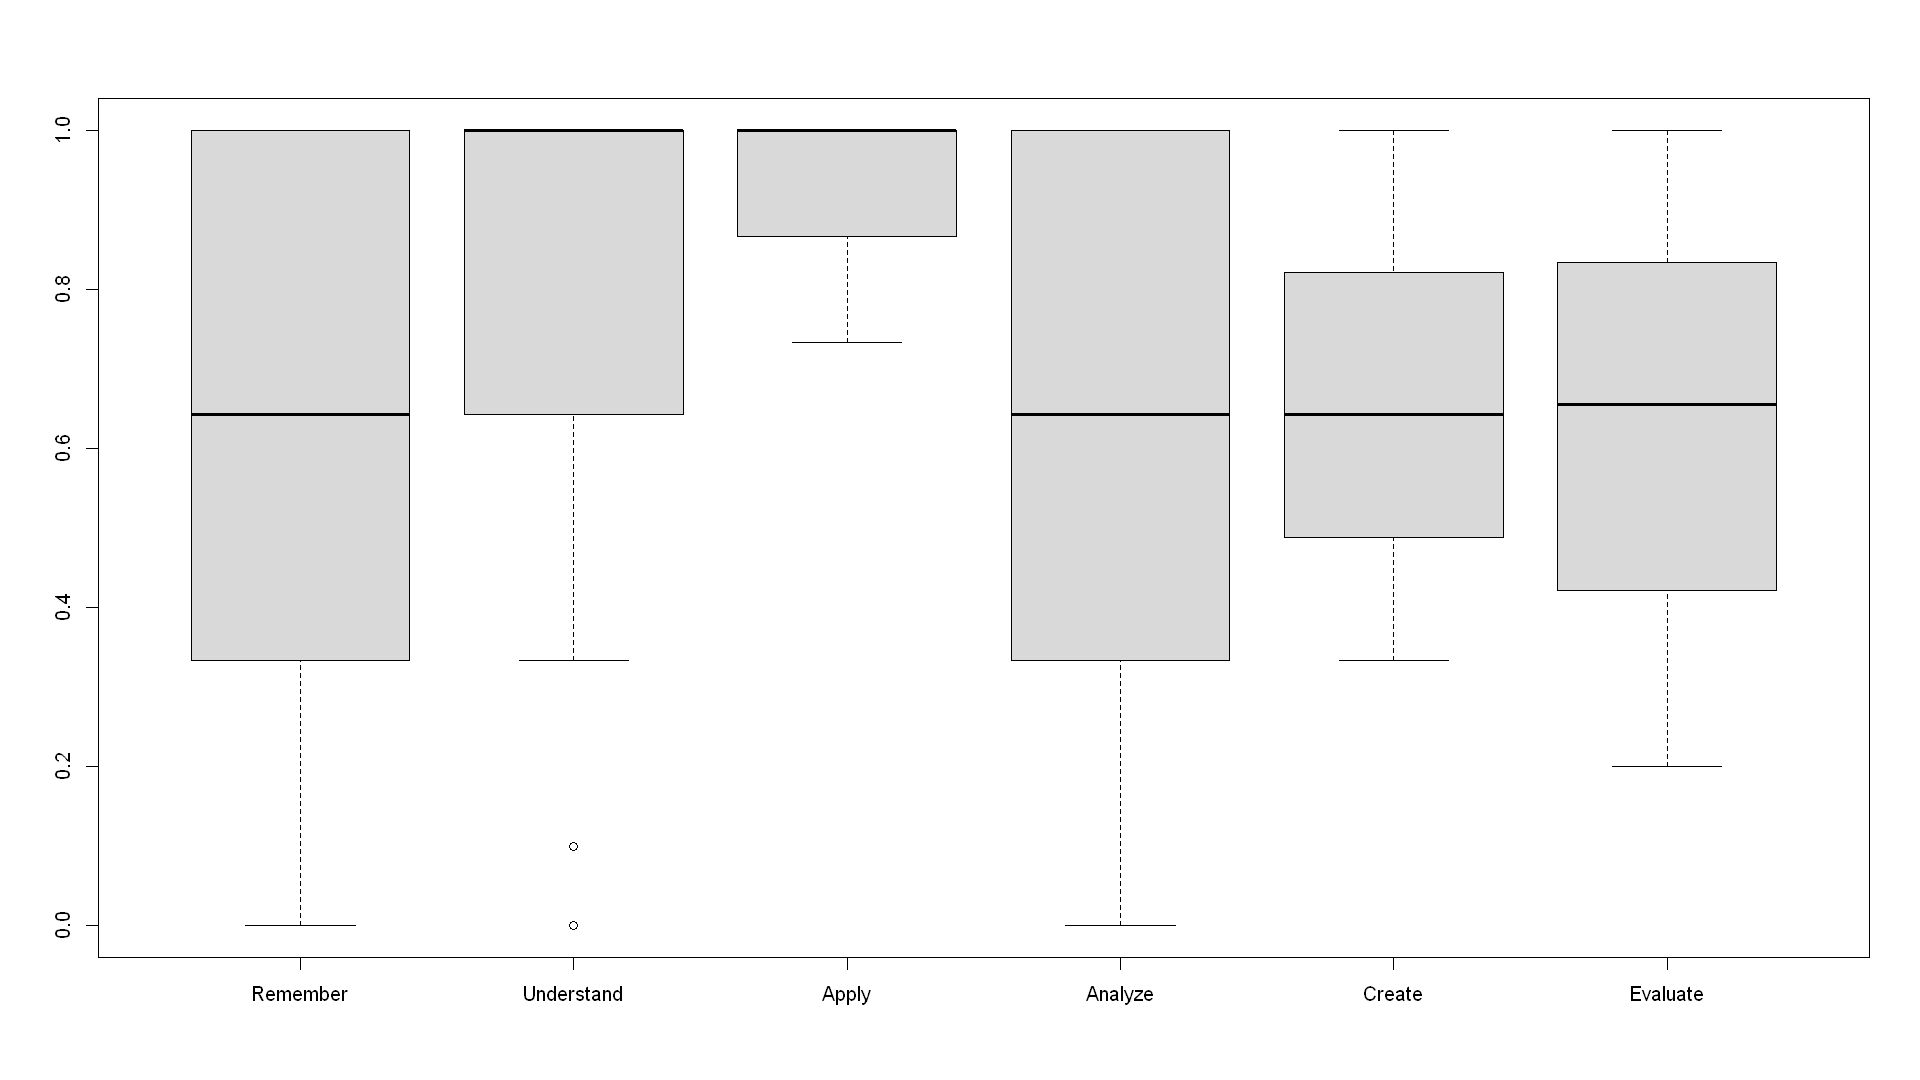

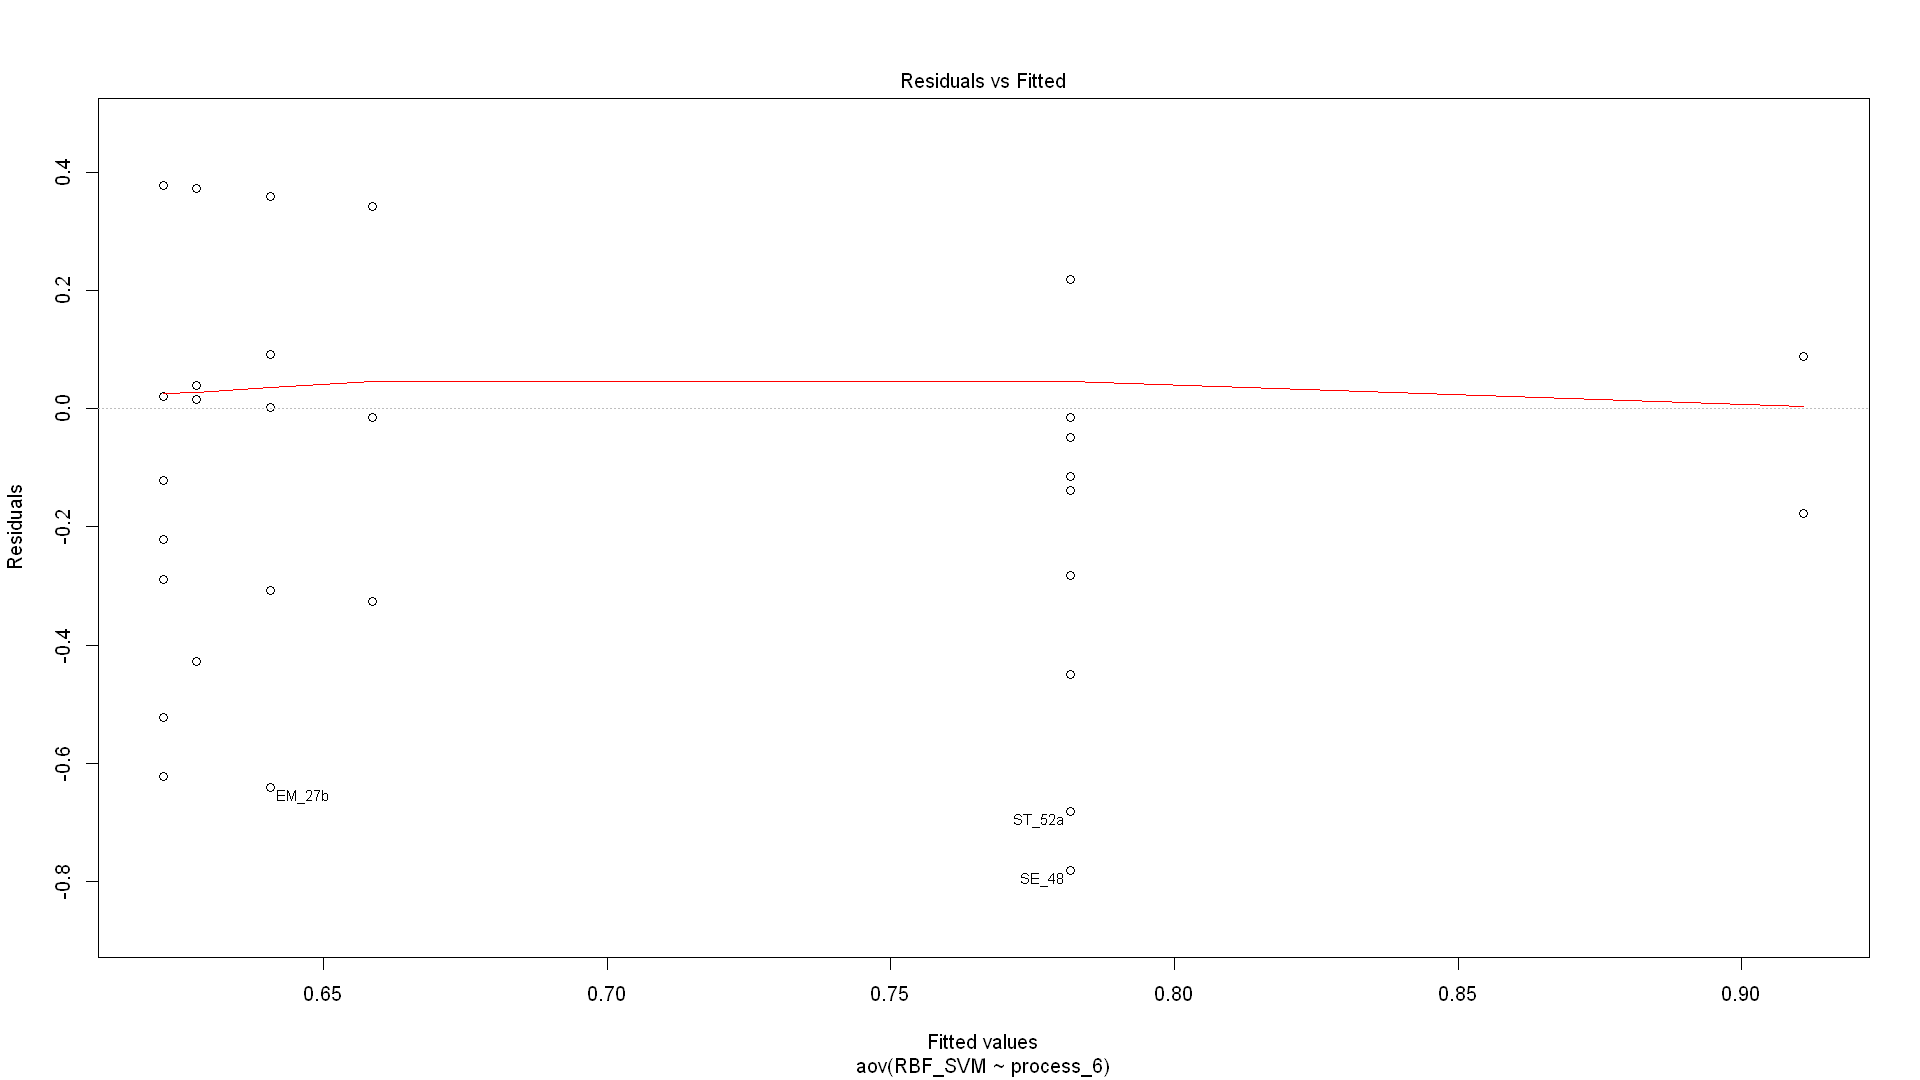

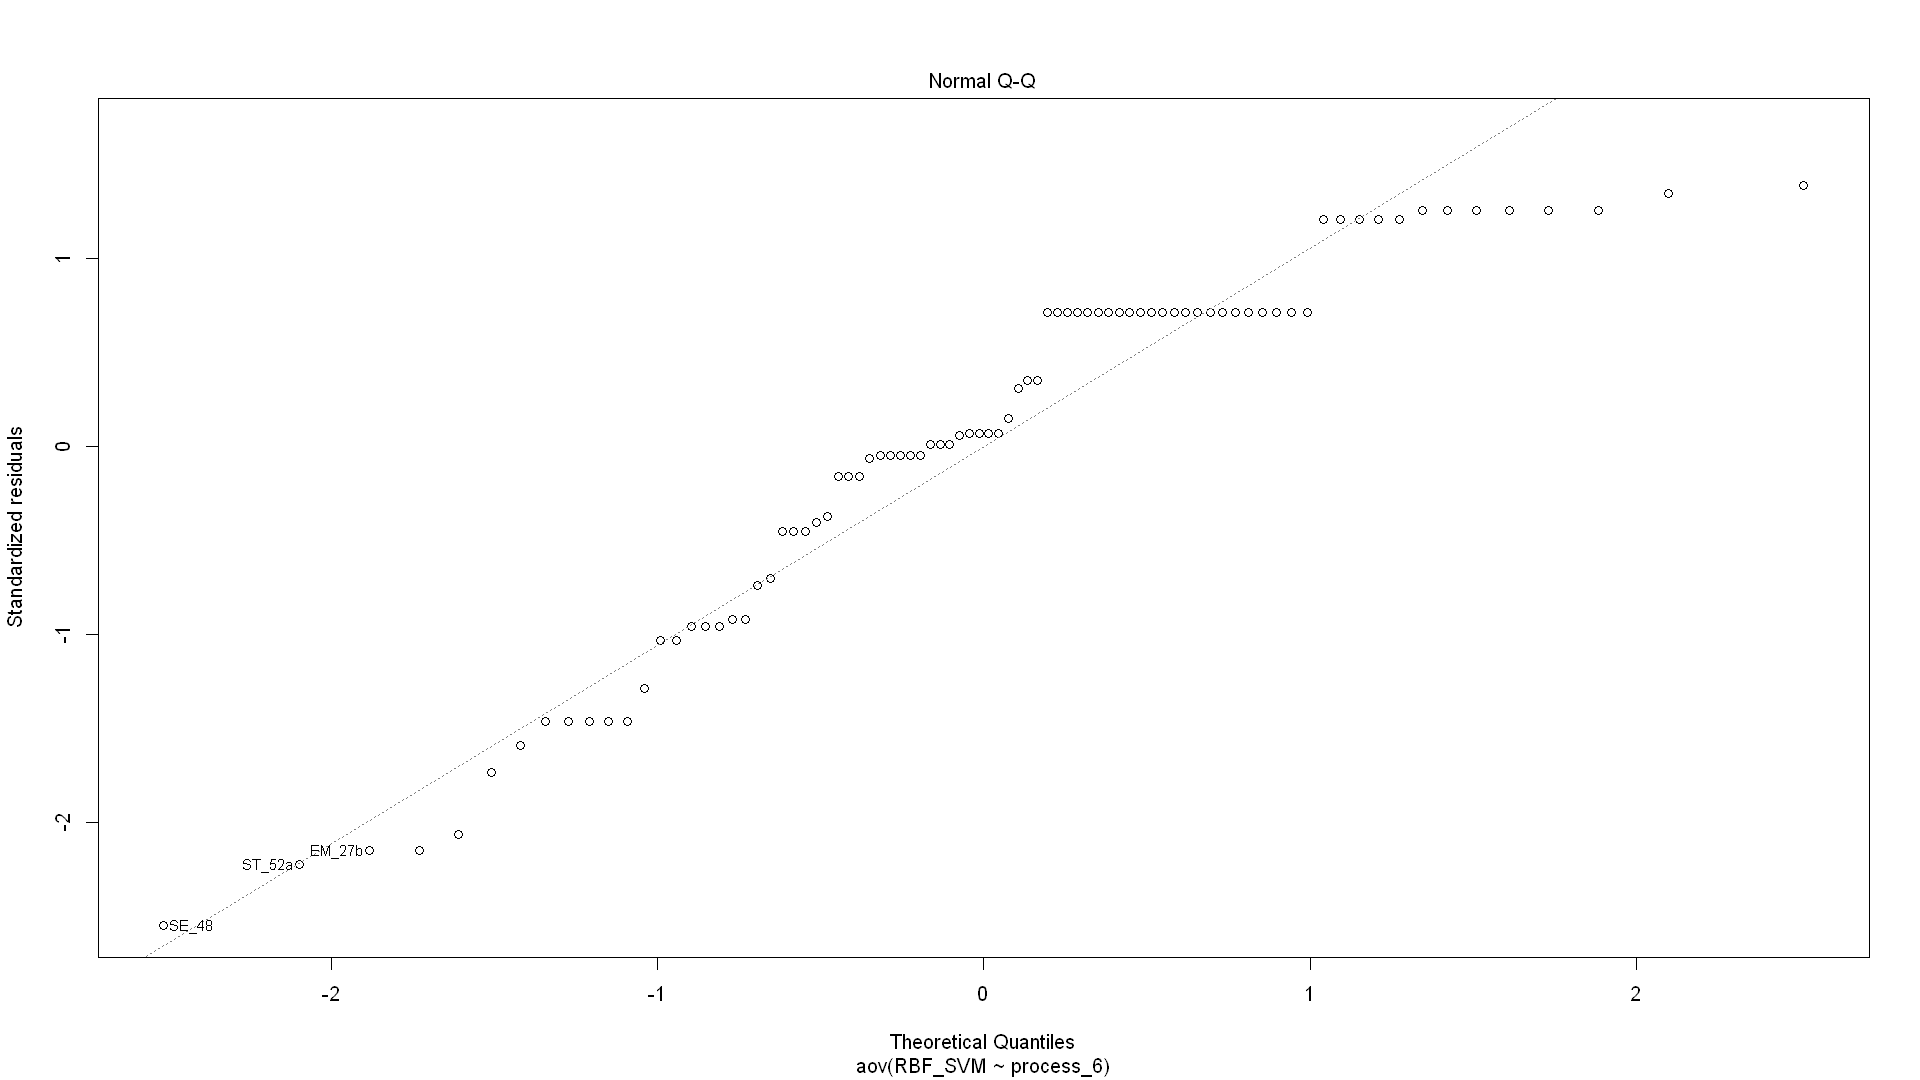

In [14]:
boxplot(RBF_SVM~ process_6, data = data_6, col="gray85")
leveneTest(RBF_SVM~ process_6, data = data_6)
aov_6_RBF_SVM<- aov(RBF_SVM~ process_6, data = data_6)
summary(aov_6_RBF_SVM)
plot(aov_6_RBF_SVM, 1)
plot(aov_6_RBF_SVM, 2) 


,Df,F value,Pr(>F)
group,5,0.2559213,0.9356073
,78,NA,NA


            Df Sum Sq Mean Sq F value Pr(>F)
process_6    5  0.189 0.03787   0.298  0.913
Residuals   78  9.912 0.12708               

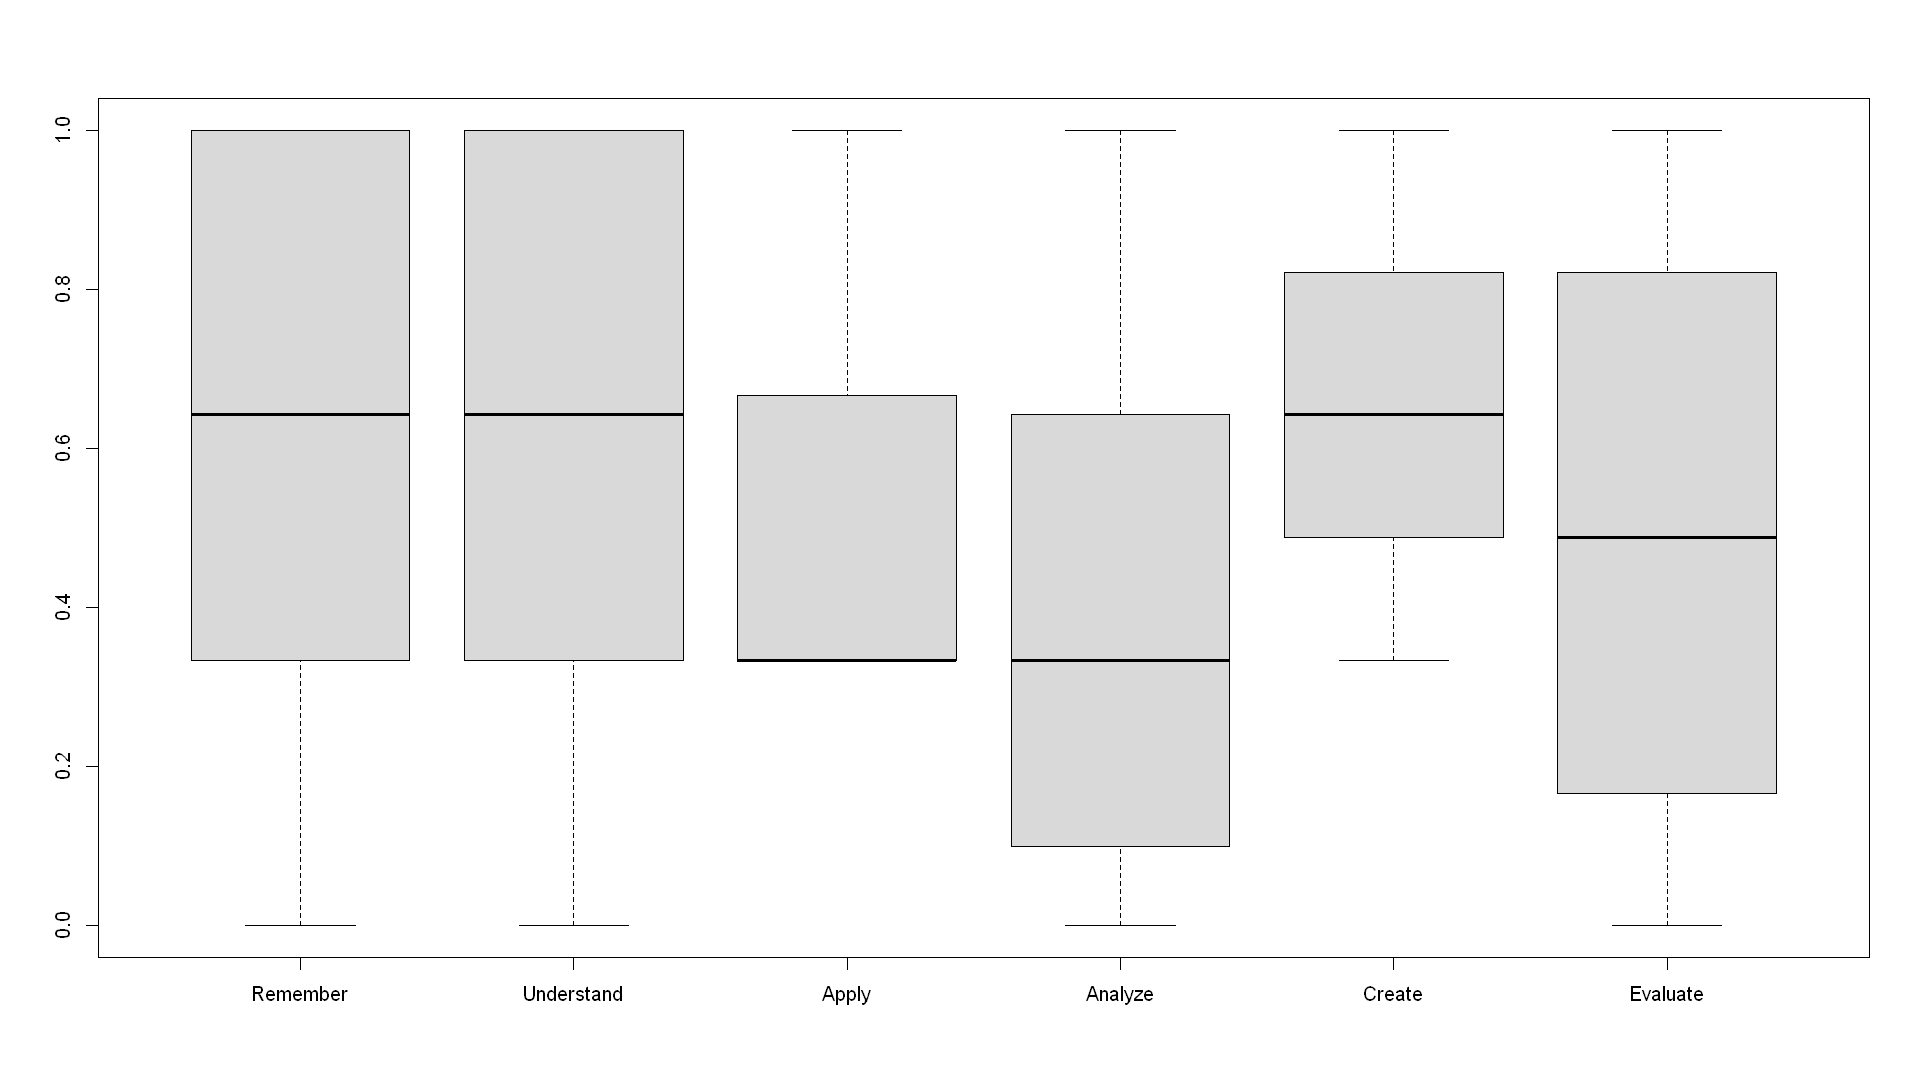

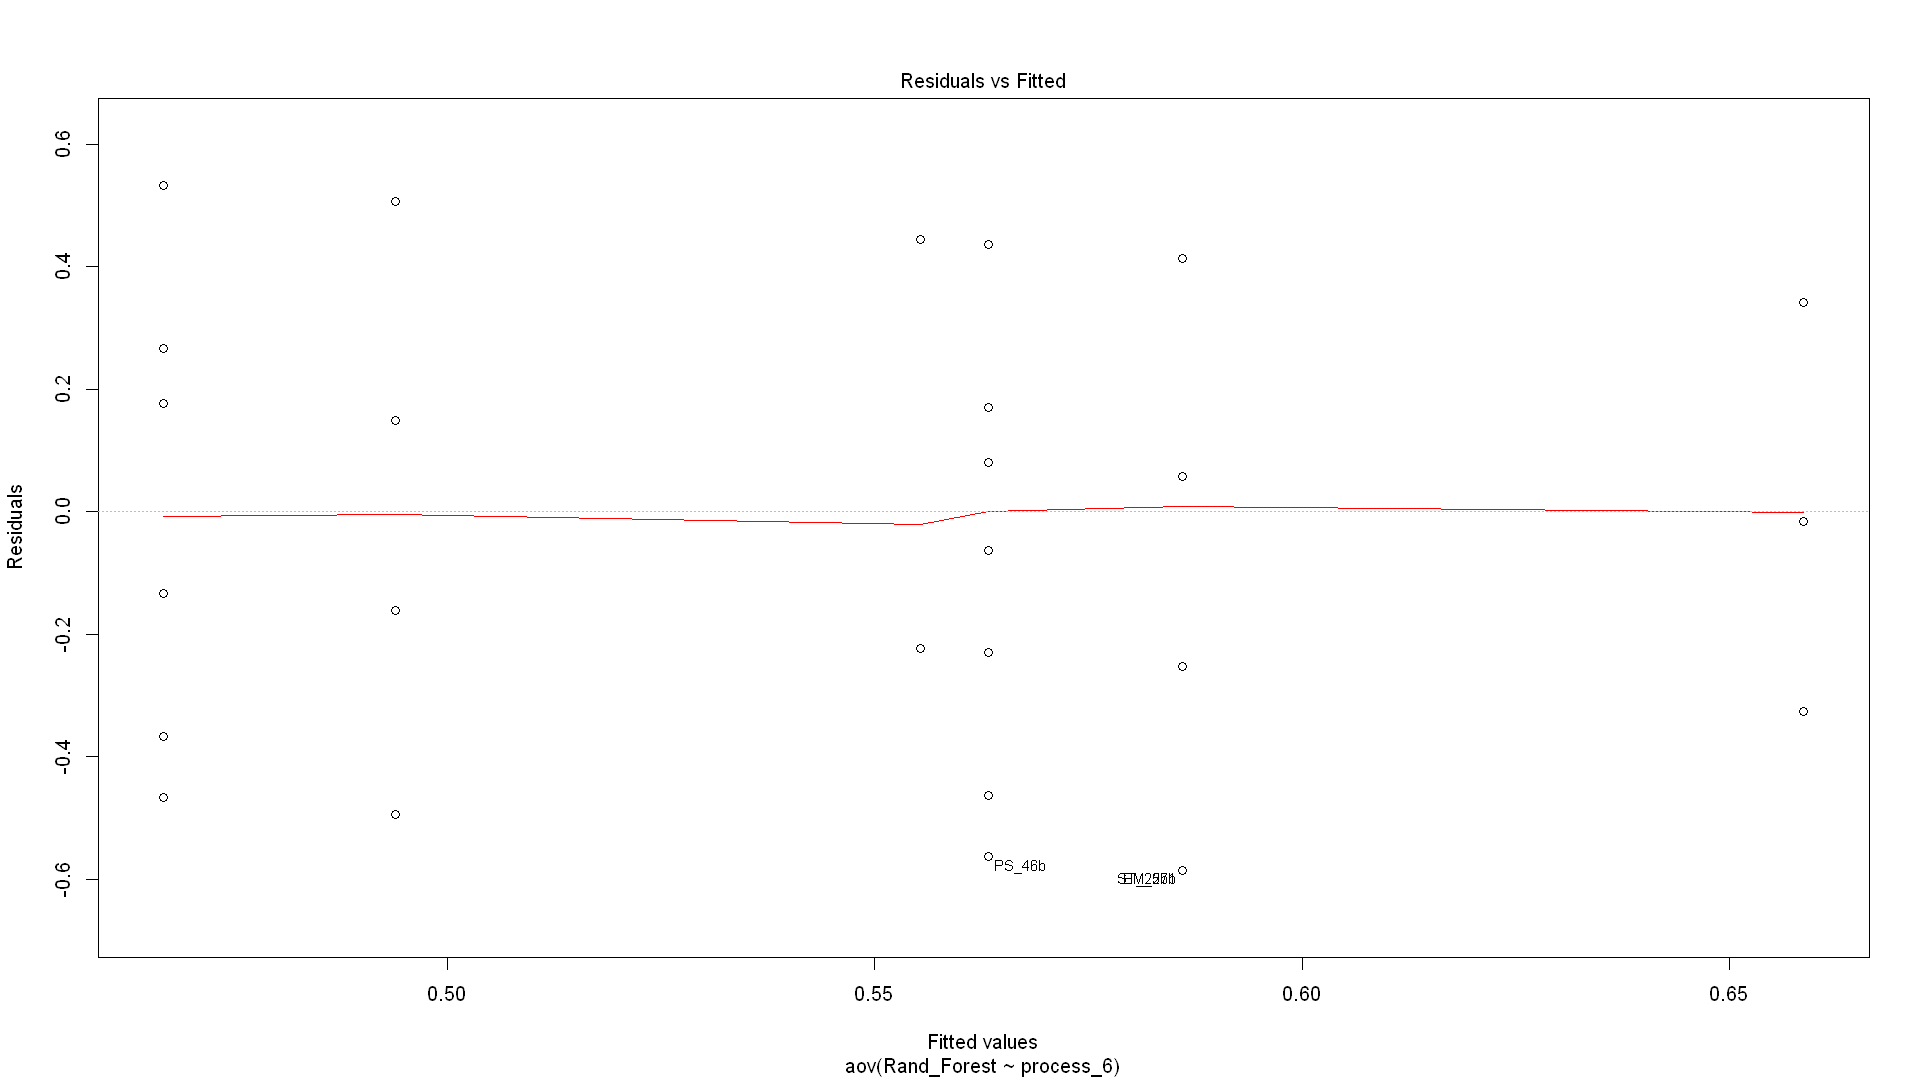

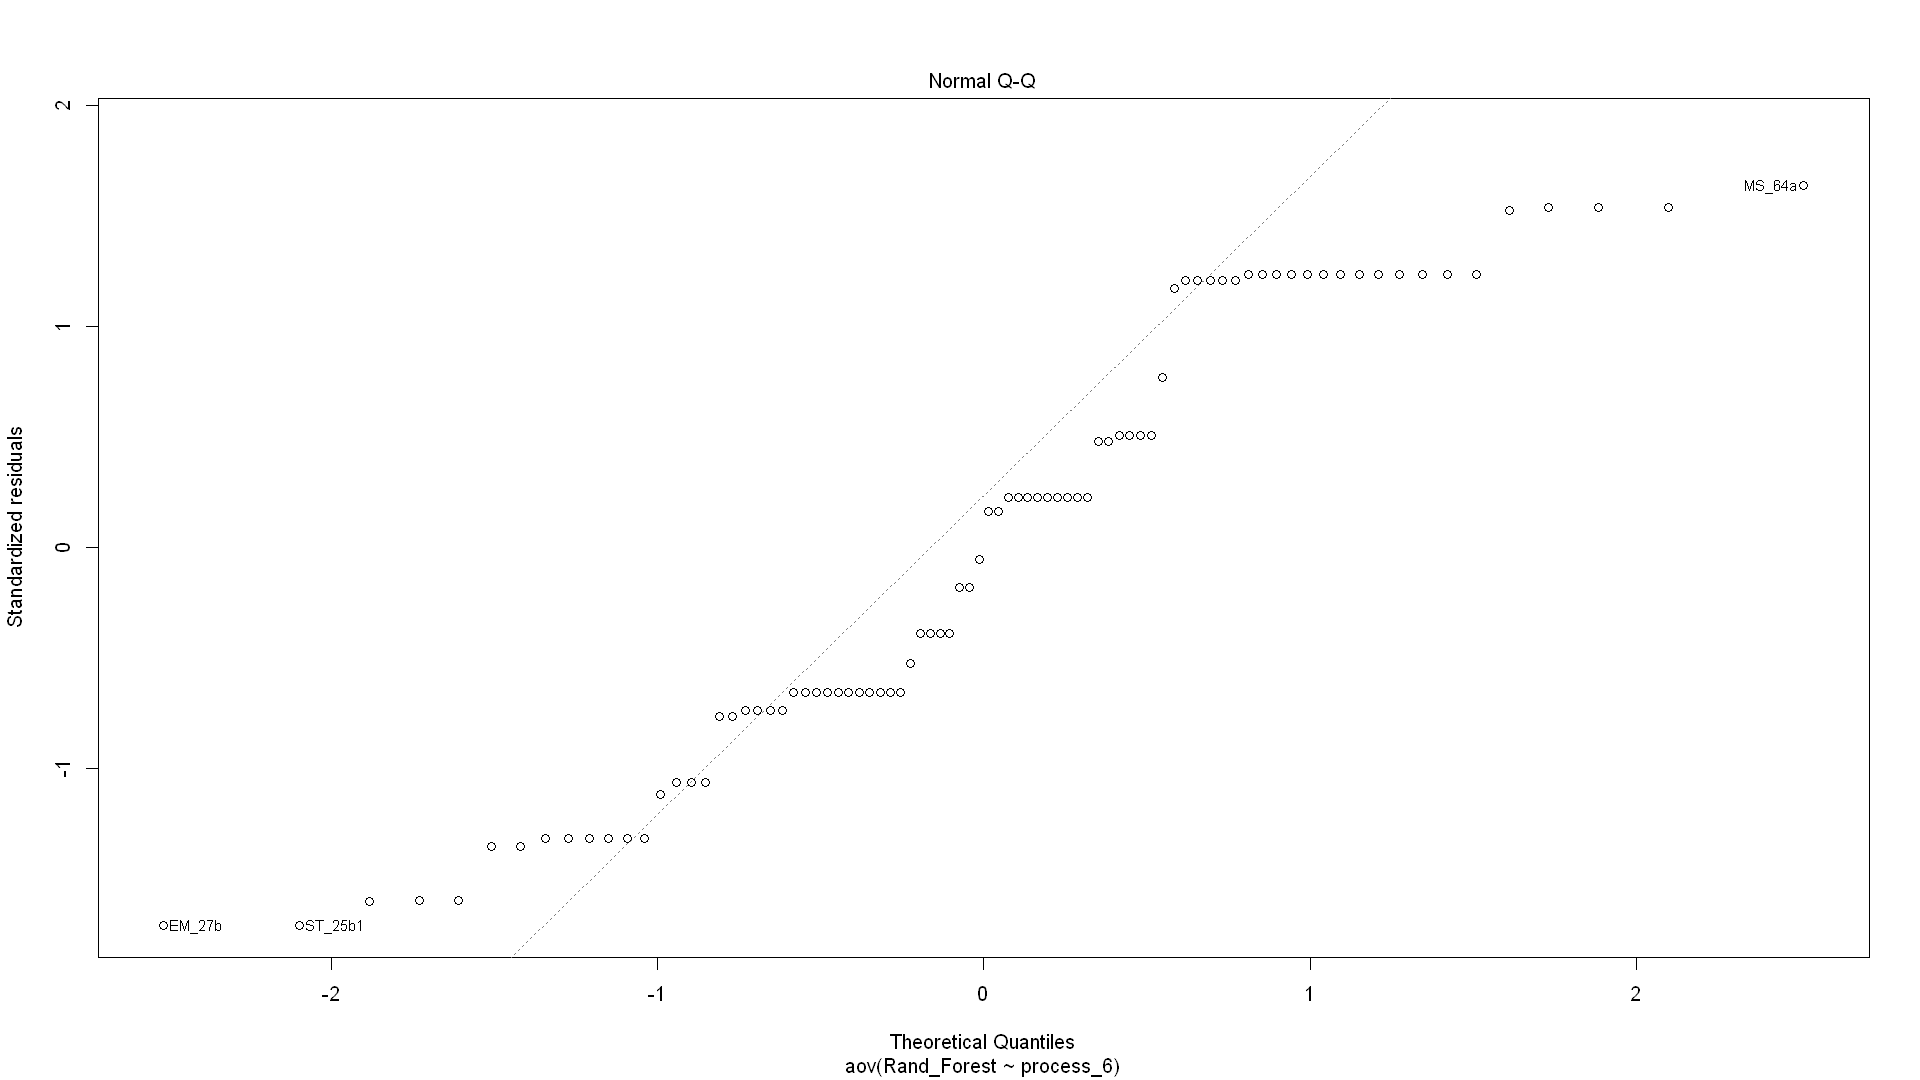

In [15]:
boxplot(Rand_Forest~ process_6, data = data_6, col="gray85")
leveneTest(Rand_Forest~ process_6, data = data_6)
aov_6_Rand_Forest<- aov(Rand_Forest~ process_6, data = data_6)
summary(aov_6_Rand_Forest)
plot(aov_6_Rand_Forest, 1)
plot(aov_6_Rand_Forest, 2) 

,Df,F value,Pr(>F)
group,5,1.93062,0.09866083
,78,NA,NA


            Df Sum Sq Mean Sq F value Pr(>F)
process_6    5  0.083 0.01661   0.176  0.971
Residuals   78  7.357 0.09432               

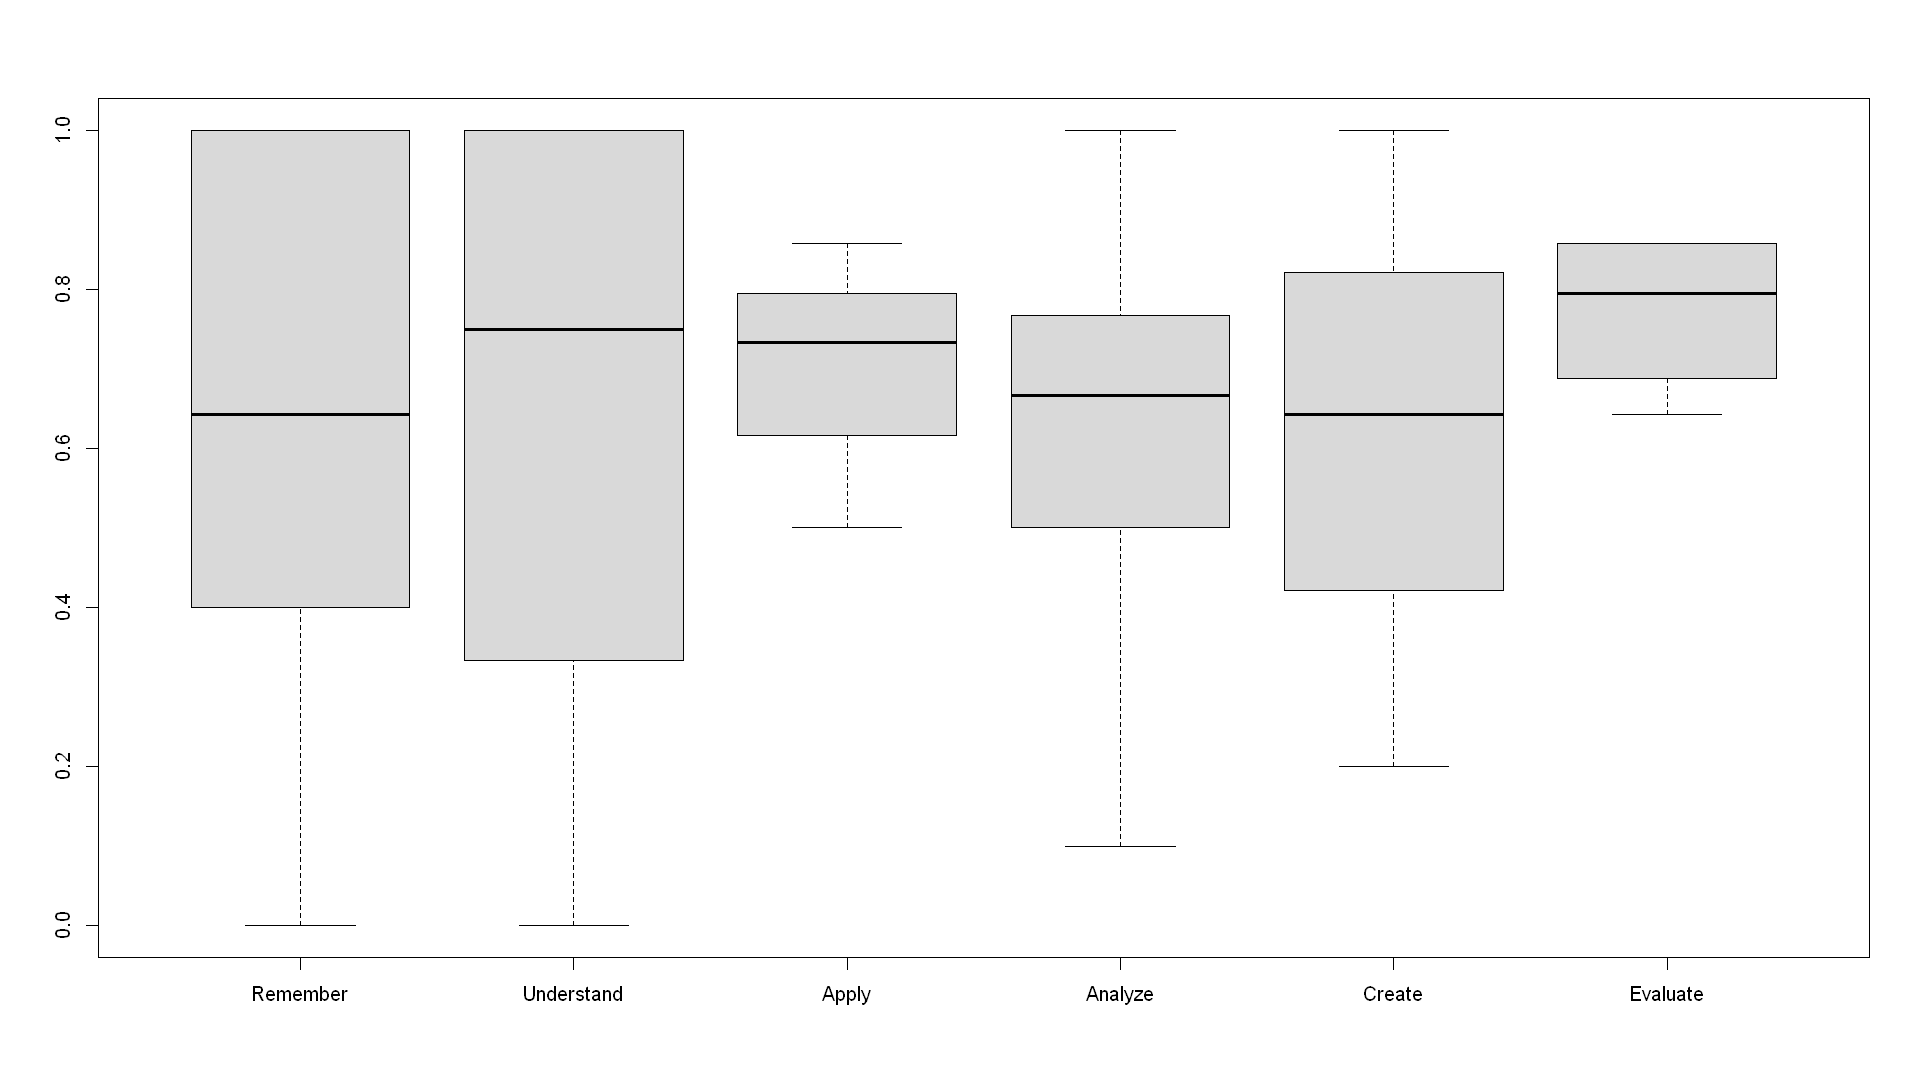

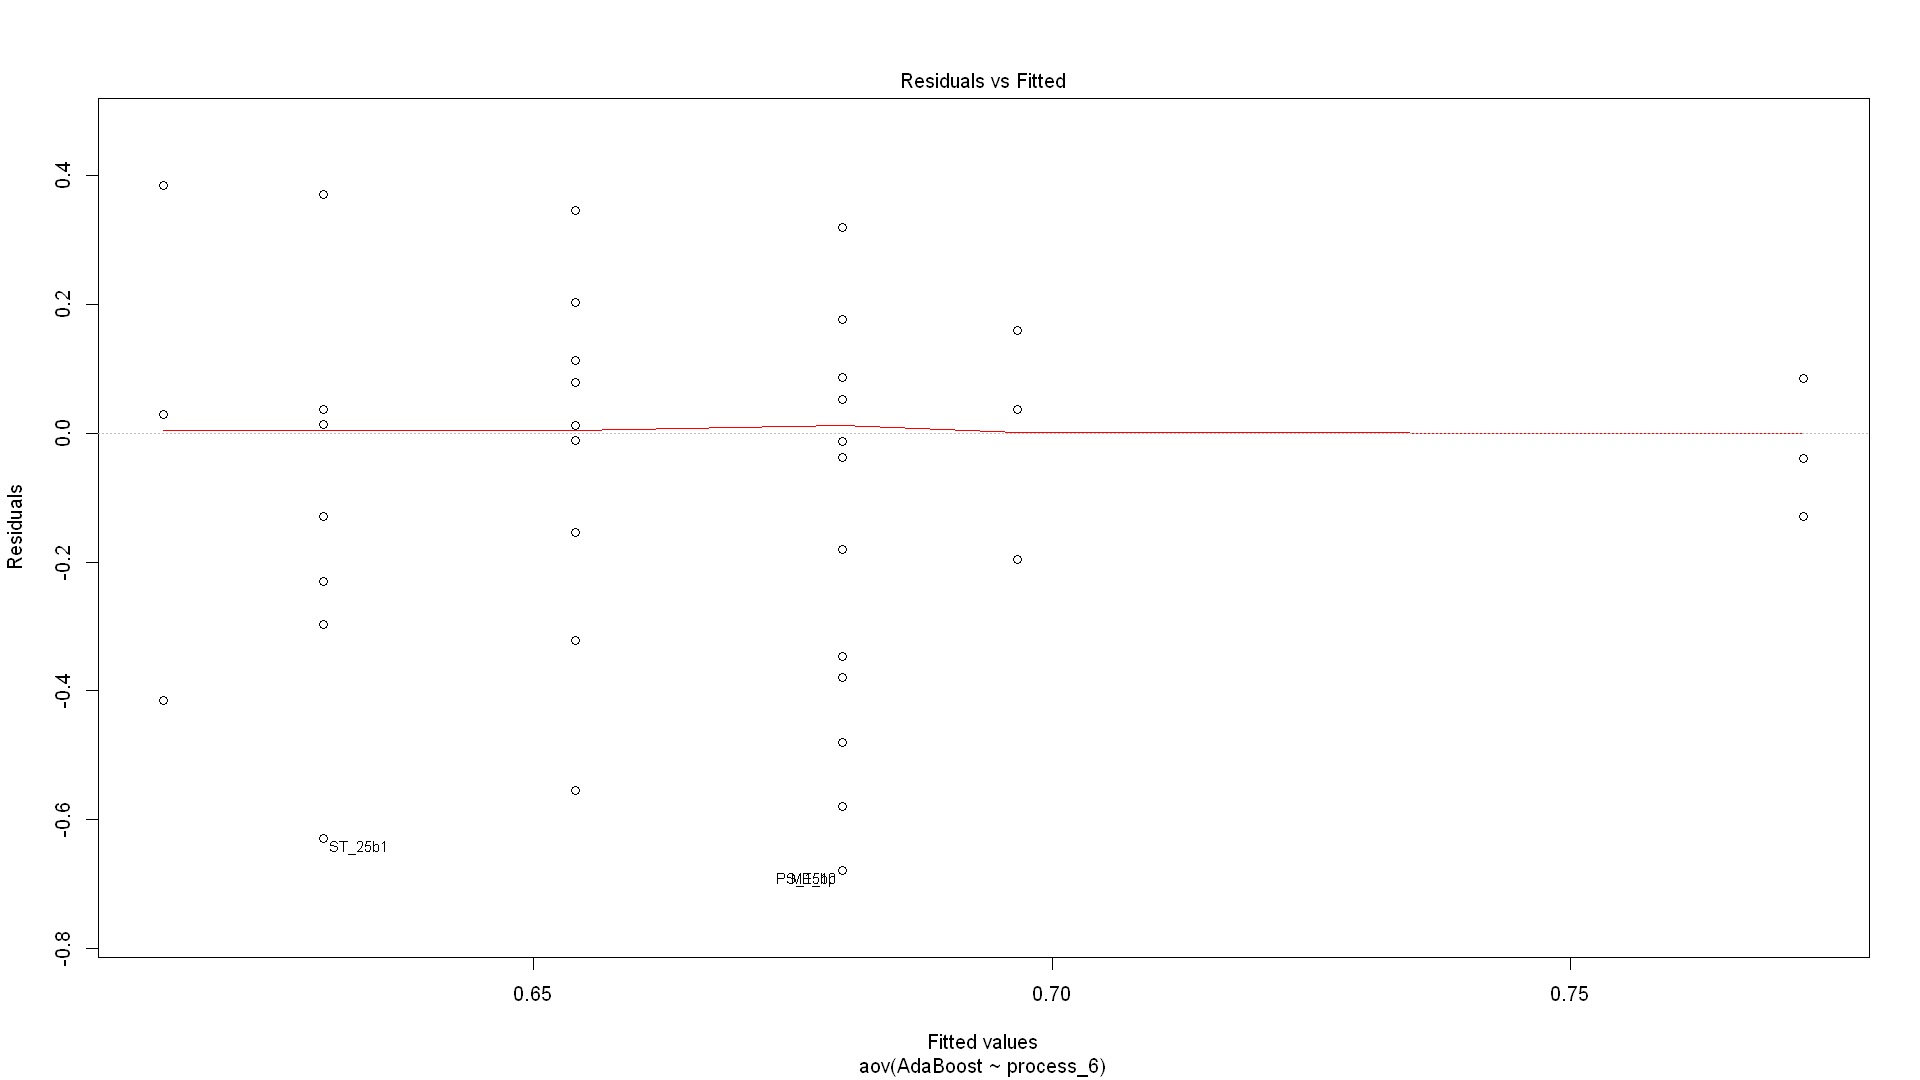

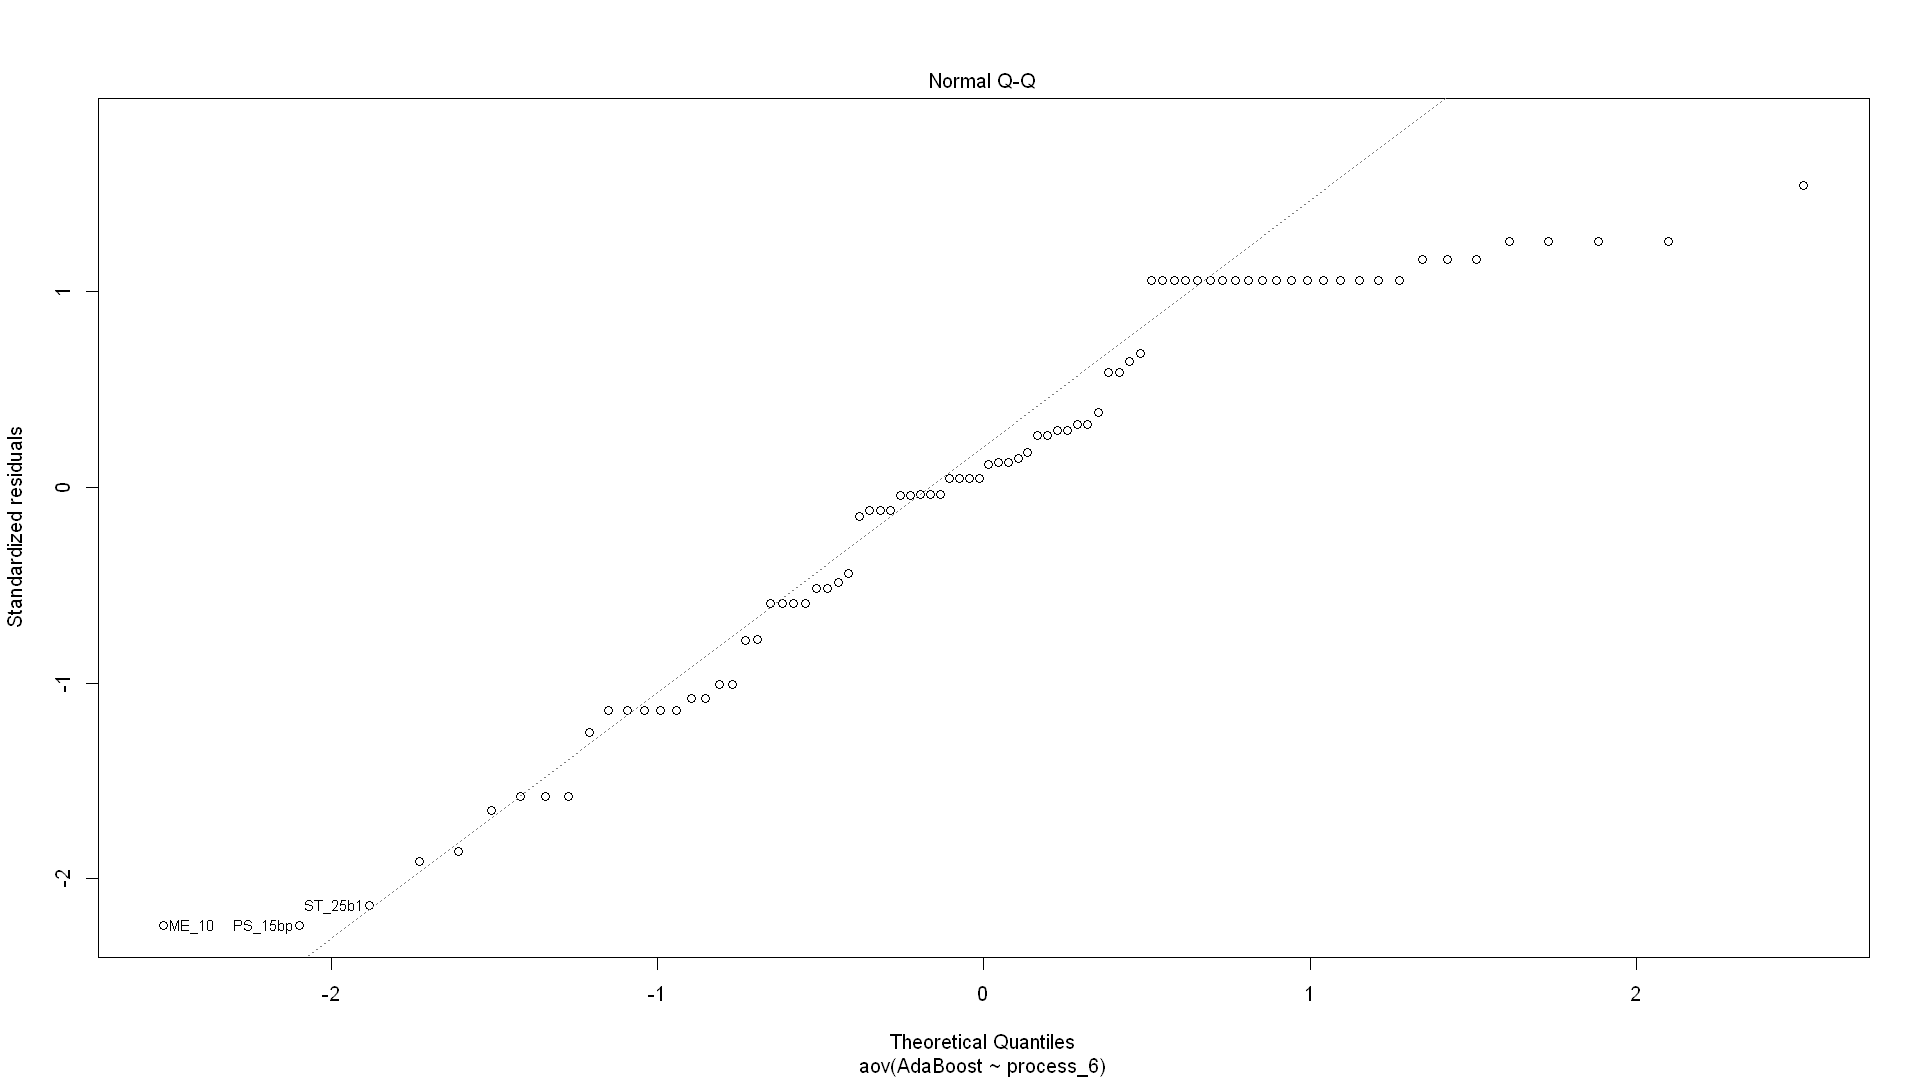

In [16]:
boxplot(AdaBoost~ process_6, data = data_6, col="gray85")
leveneTest(AdaBoost~ process_6, data = data_6)
aov_6_AdaBoost<- aov(AdaBoost~ process_6, data = data_6)
summary(aov_6_AdaBoost)
plot(aov_6_AdaBoost, 1)
plot(aov_6_AdaBoost, 2) 

,Df,F value,Pr(>F)
group,5,1.49913,0.1997732
,78,NA,NA


            Df Sum Sq Mean Sq F value Pr(>F)
process_6    5  0.531 0.10626   1.091  0.372
Residuals   78  7.595 0.09737               

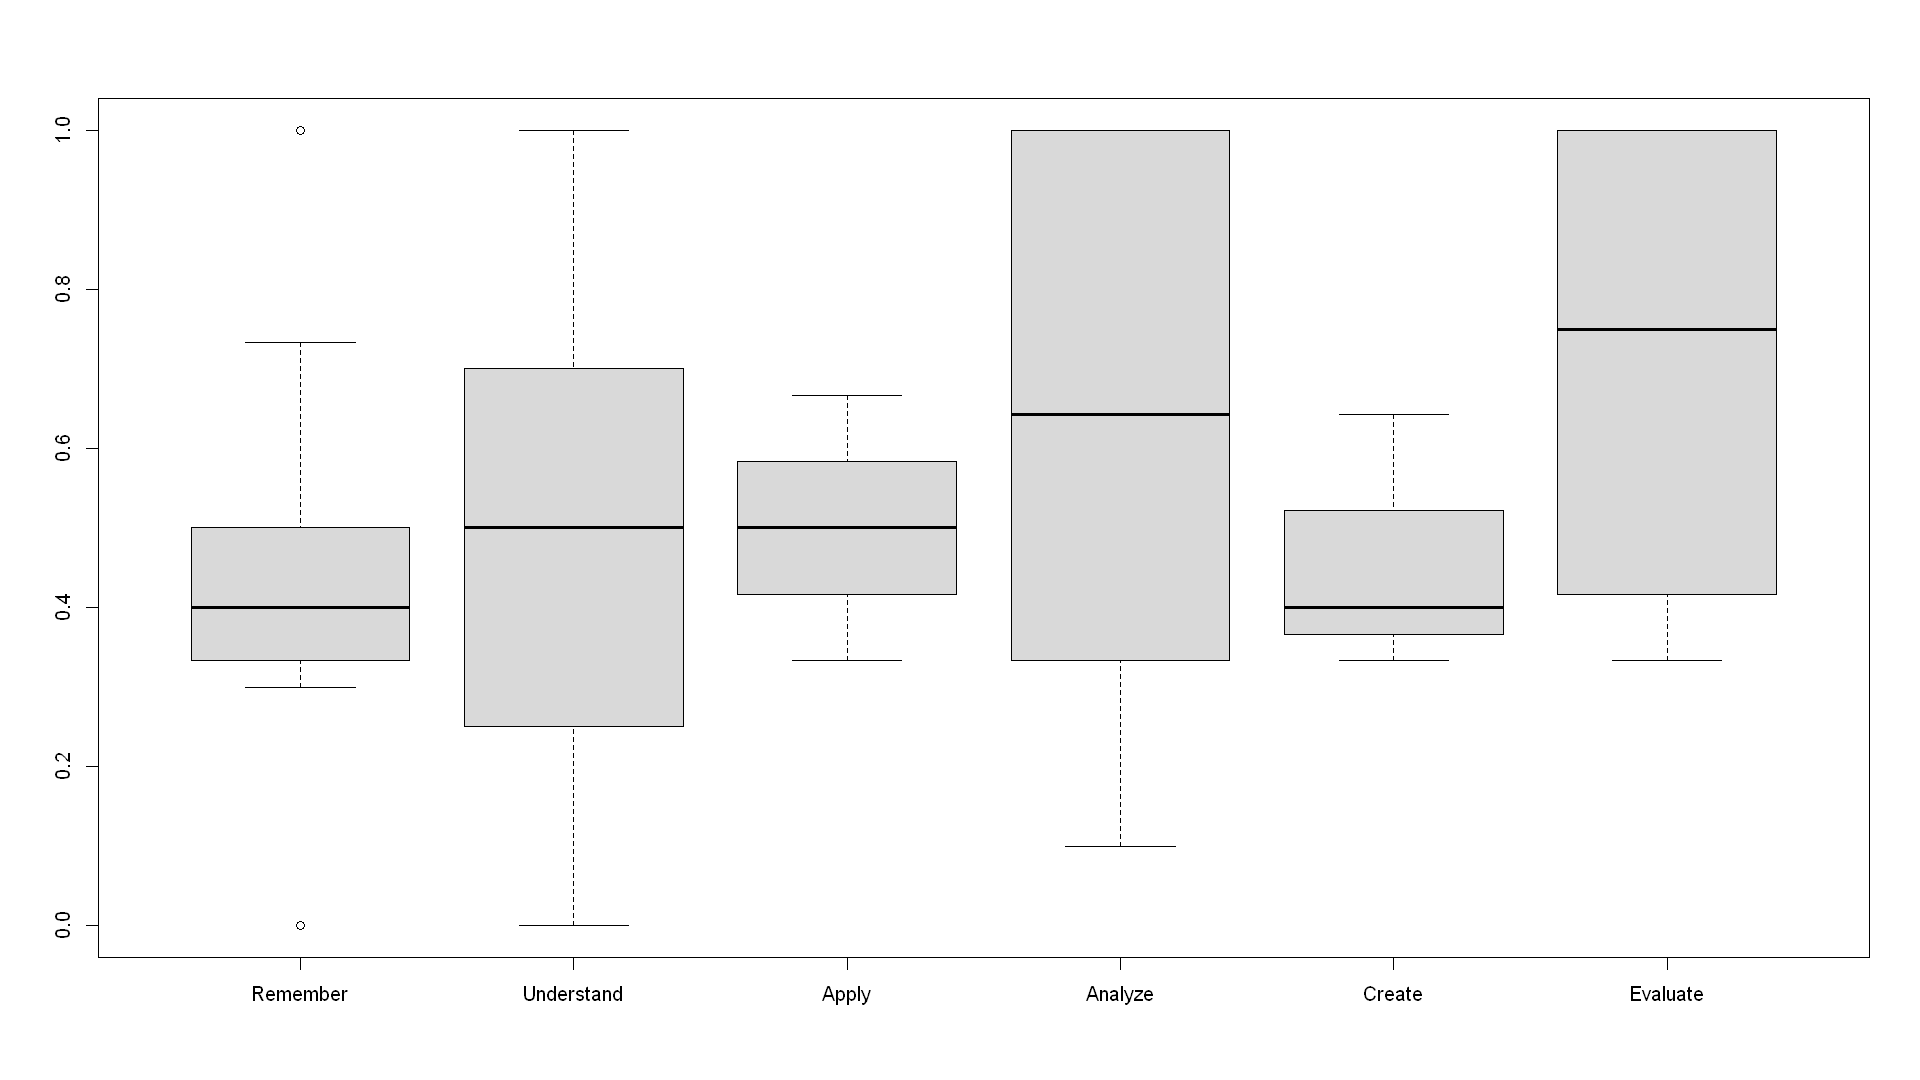

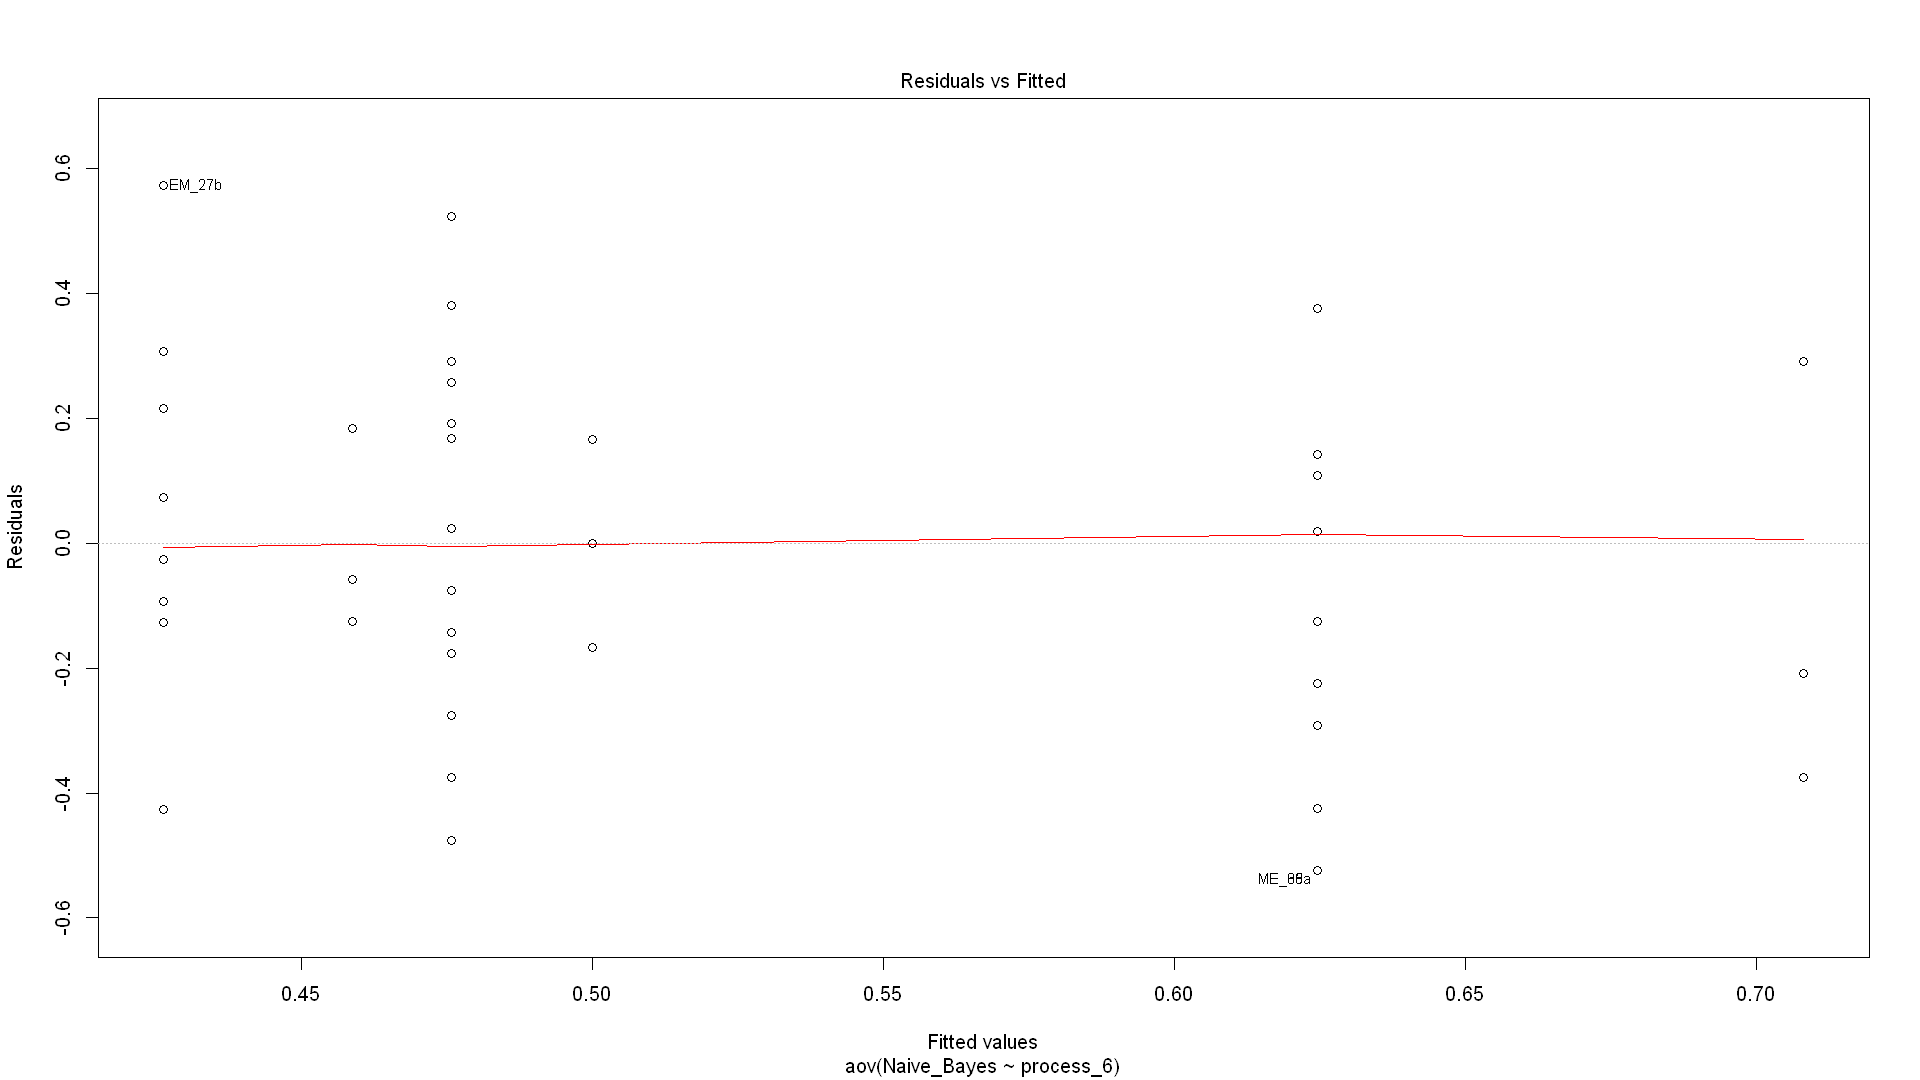

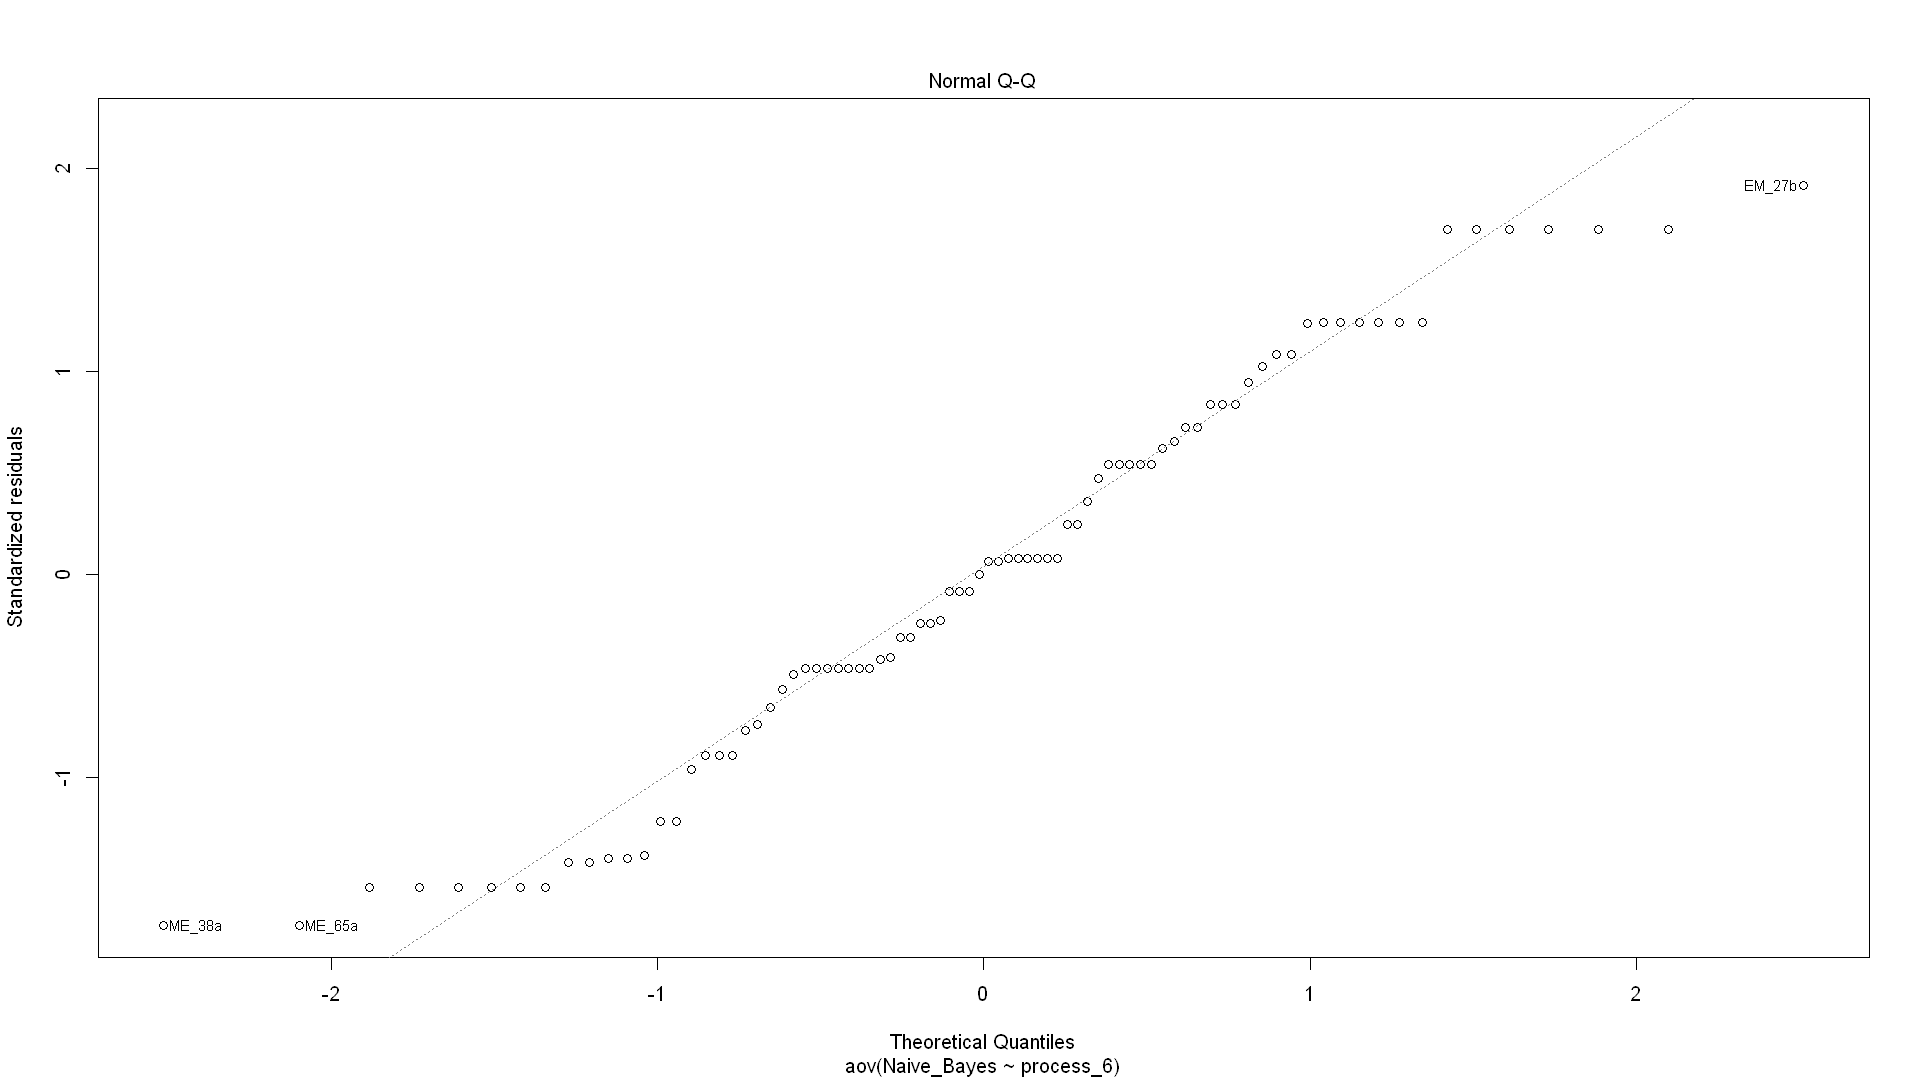

In [17]:
boxplot(Naive_Bayes ~ process_6, data = data_6, col="gray85")
leveneTest(Naive_Bayes ~ process_6, data = data_6)
aov_6_Naive_Bayes <- aov(Naive_Bayes ~ process_6, data = data_6)
summary(aov_6_Naive_Bayes)
plot(aov_6_Naive_Bayes, 1)
plot(aov_6_Naive_Bayes, 2) 


,Df,F value,Pr(>F)
group,5,0.630237,0.6771852
,78,NA,NA


            Df Sum Sq Mean Sq F value Pr(>F)
process_6    5  0.157 0.03134   0.334  0.891
Residuals   78  7.325 0.09391               

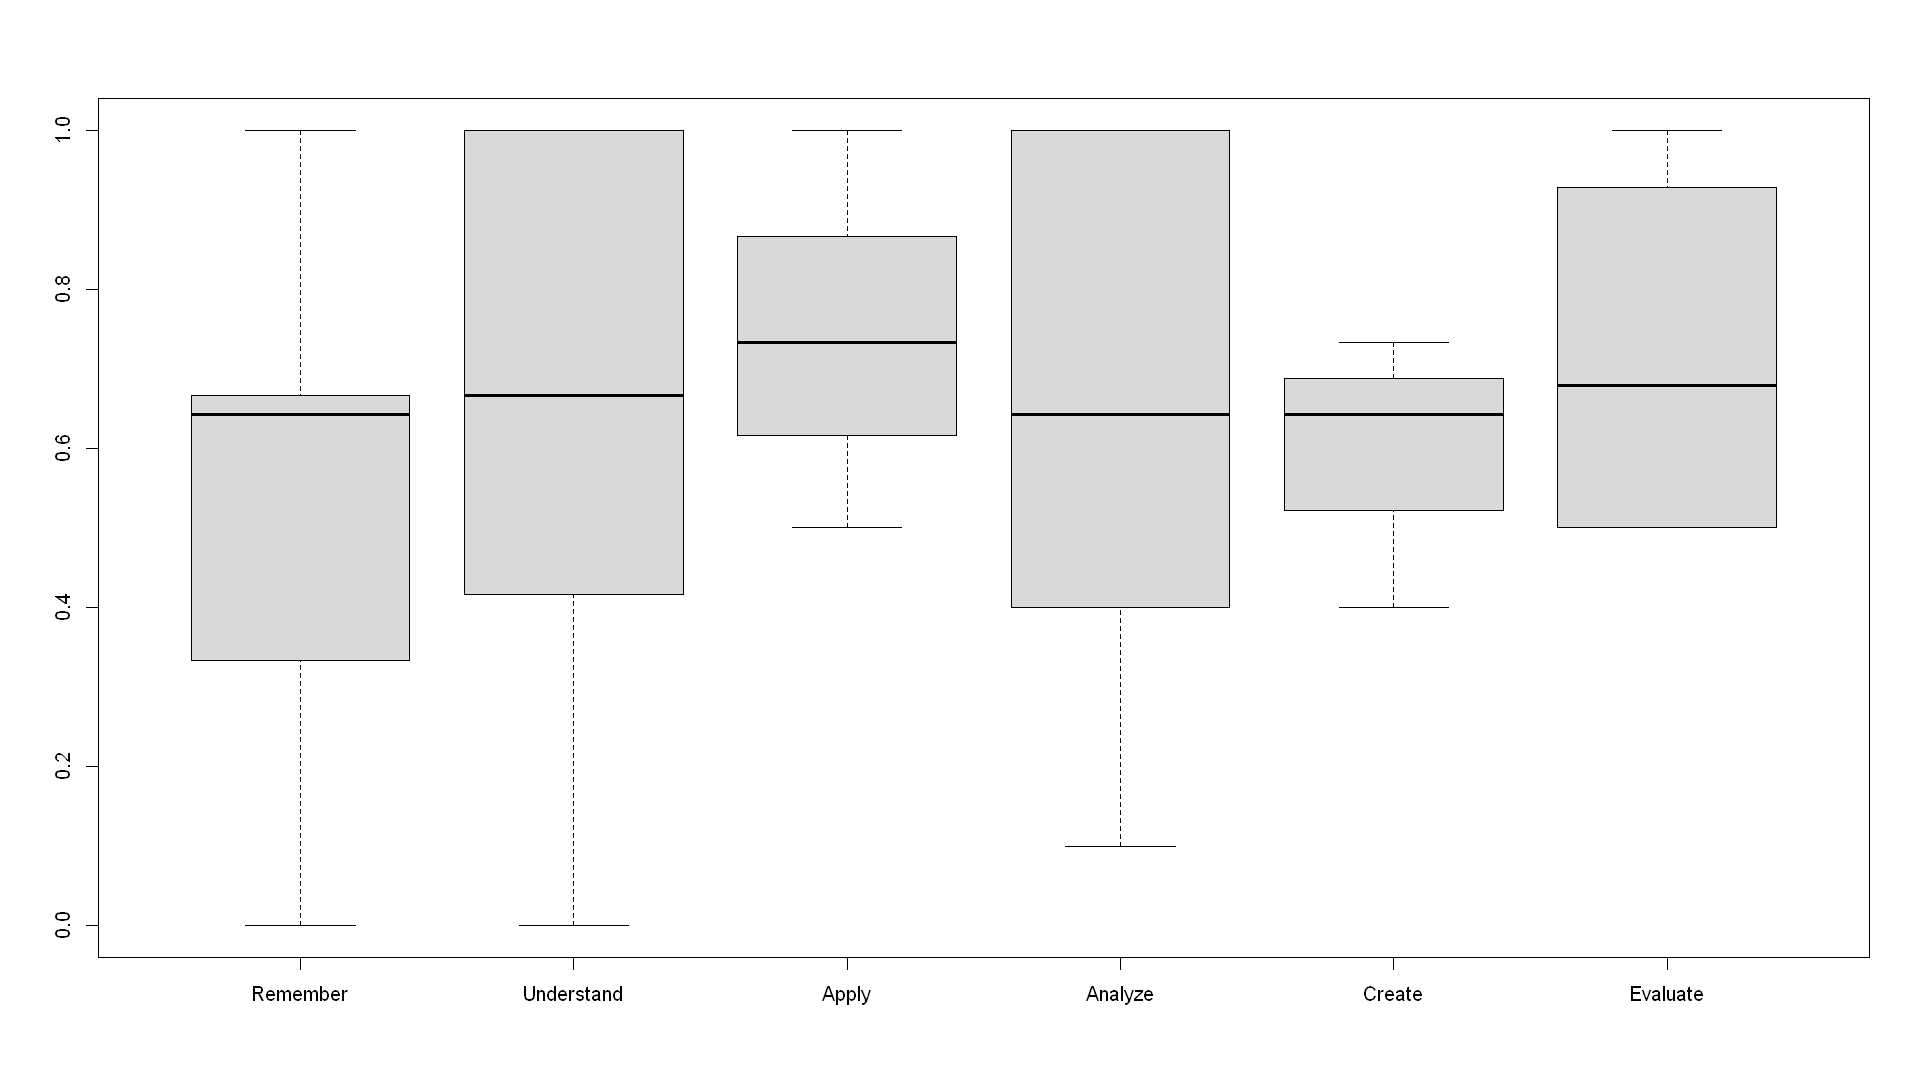

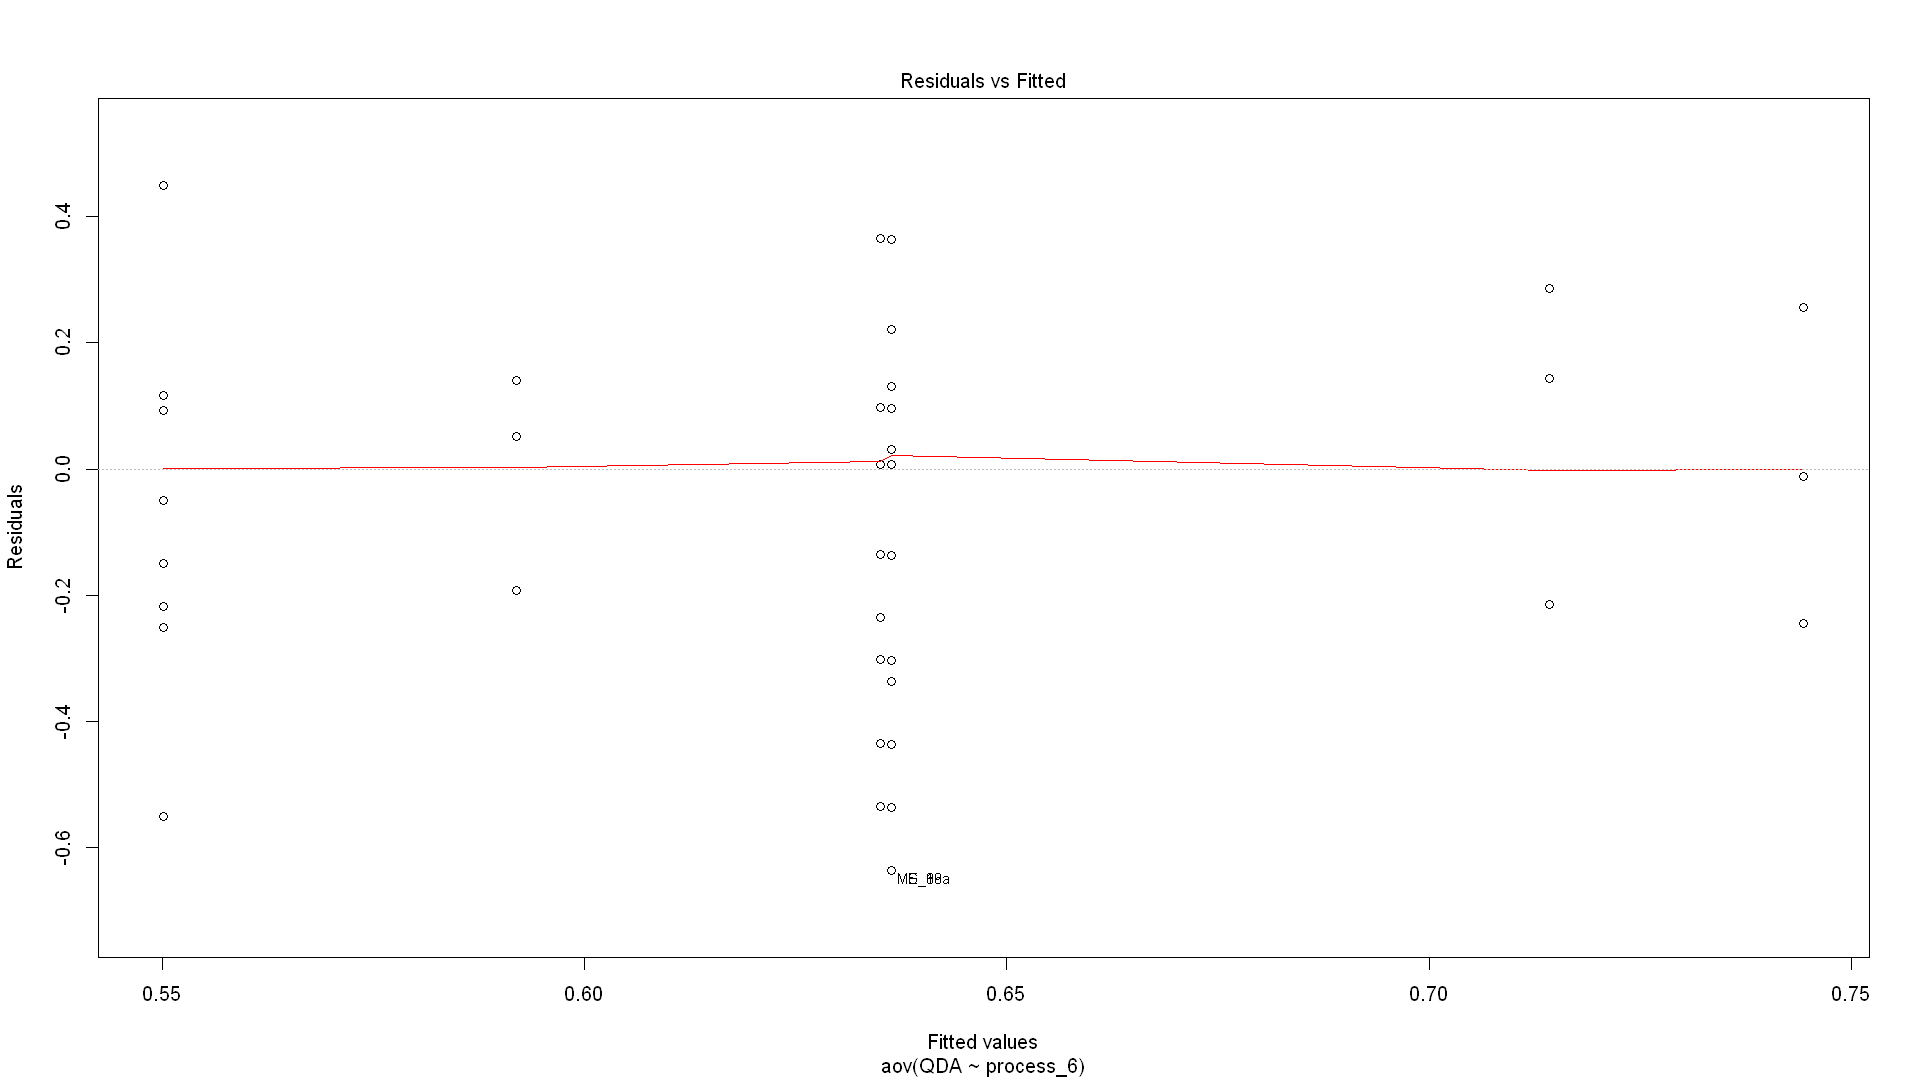

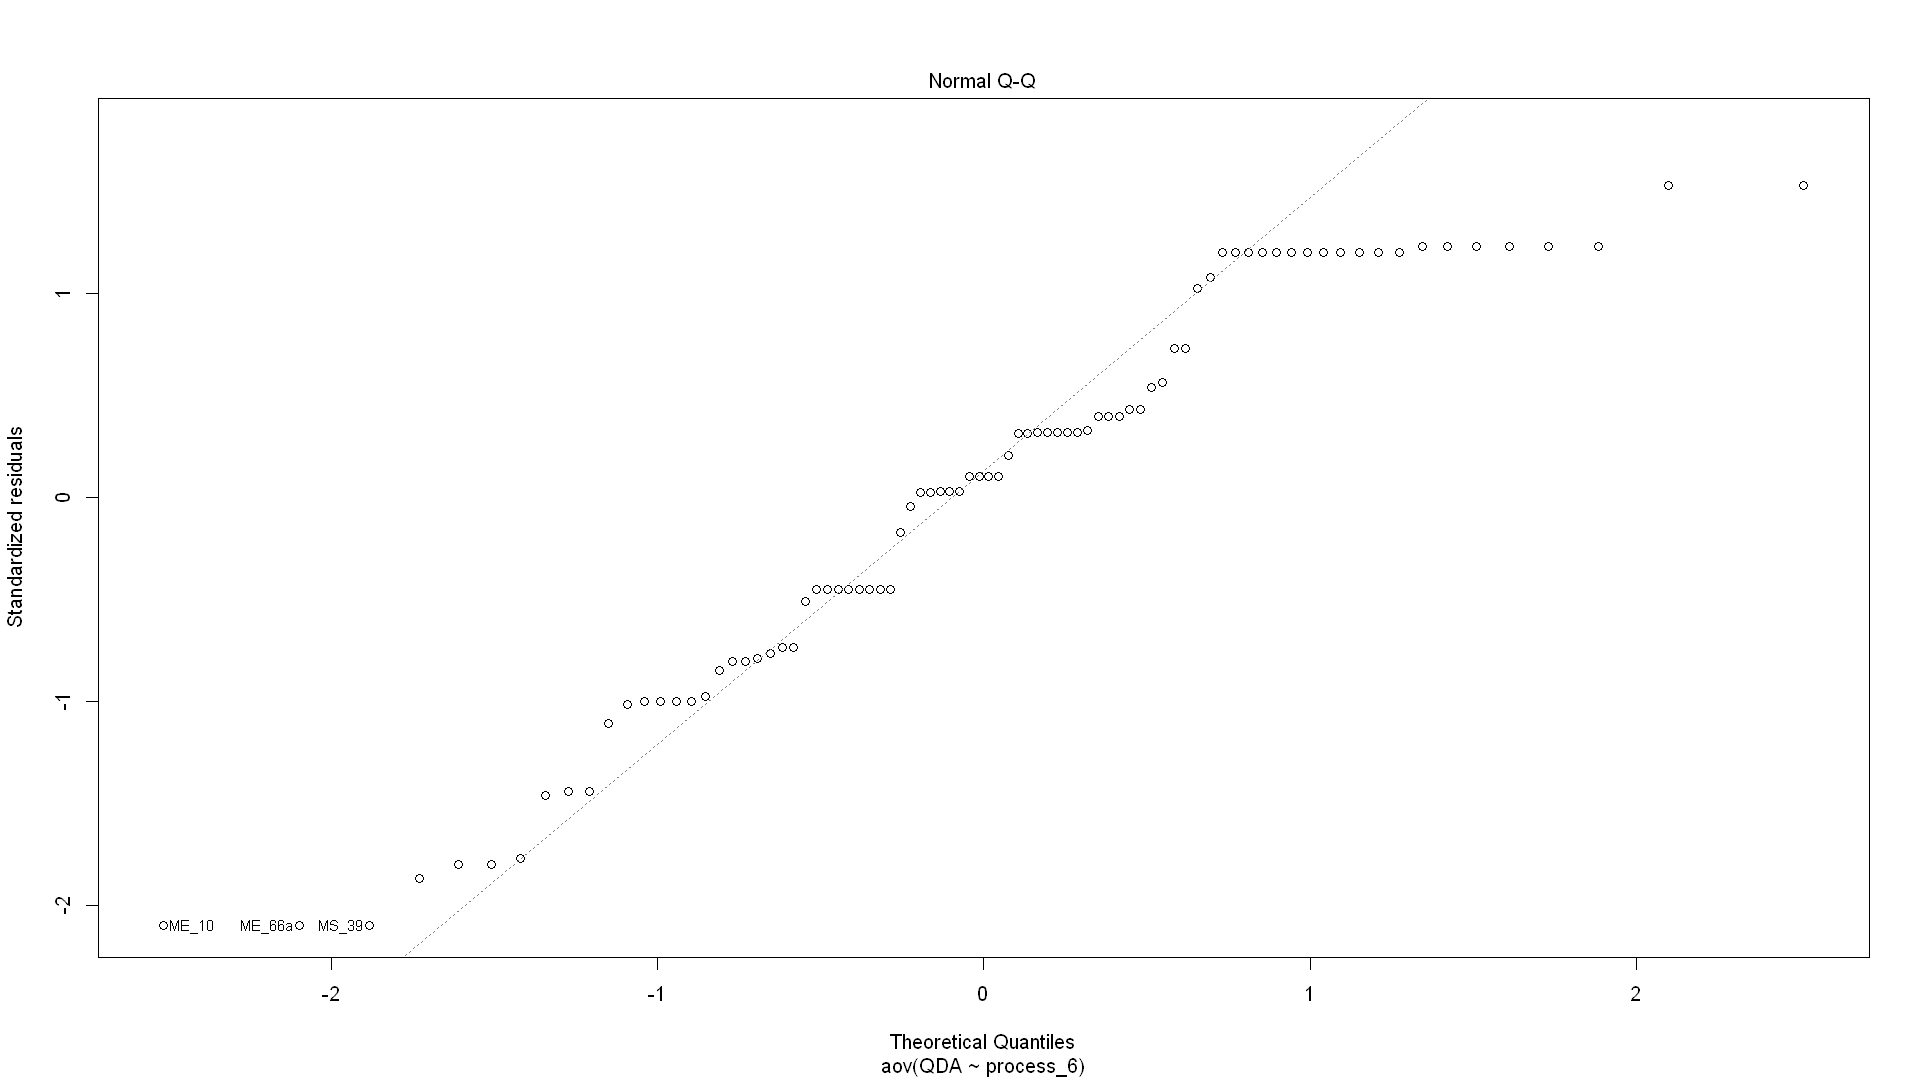

In [18]:
boxplot(QDA ~ process_6, data = data_6, col="gray85")
leveneTest(QDA ~ process_6, data = data_6)
aov_6_QDA <- aov(QDA ~ process_6, data = data_6)
summary(aov_6_QDA)
plot(aov_6_QDA, 1)
plot(aov_6_QDA, 2) 
